In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'

# Define paths for each subfolder with recursive search pattern
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)
current_files = glob.glob(dataset_path + '/Current A/**/*.csv', recursive=True)
humidity_files = glob.glob(dataset_path + '/Humidity/**/*.csv', recursive=True)
kwh_files = glob.glob(dataset_path + '/KWh/**/*.csv', recursive=True)
motion_files = glob.glob(dataset_path + '/Motion/**/*.csv', recursive=True)
temperature_files = glob.glob(dataset_path + '/Temperature/**/*.csv', recursive=True)
voltage_files = glob.glob(dataset_path + '/Voltage V/**/*.csv', recursive=True)
watt_files = glob.glob(dataset_path + '/Watt W/**/*.csv', recursive=True)

# Print the number of CSV files found in each folder
print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")
print(f"Found {len(current_files)} Current CSV files.")
print(f"Found {len(humidity_files)} Humidity CSV files.")
print(f"Found {len(kwh_files)} KWh CSV files.")
print(f"Found {len(motion_files)} Motion CSV files.")
print(f"Found {len(temperature_files)} Temperature CSV files.")
print(f"Found {len(voltage_files)} Voltage CSV files.")
print(f"Found {len(watt_files)} Watt CSV files.")

Found 7 Apparent Power CSV files.
Found 7 Current CSV files.
Found 3 Humidity CSV files.
Found 14 KWh CSV files.
Found 4 Motion CSV files.
Found 3 Temperature CSV files.
Found 7 Voltage CSV files.
Found 8 Watt CSV files.


In [ ]:
sample_df = pd.read_csv(apparent_power_files[0])
print(sample_df.head())

                            time  VA.mean_value
0  2024-01-01T14:12:00.000+04:00            NaN
1  2024-01-02T01:36:00.000+04:00            NaN
2  2024-01-02T13:00:00.000+04:00            NaN
3  2024-01-03T00:24:00.000+04:00            NaN
4  2024-01-03T11:48:00.000+04:00      28.792079


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.8 MB/s eta 0:00:00


Found 7 Apparent Power CSV files.


<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3339.694, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3331.694, Time=1.27 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3333.694, Time=2.73 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3333.694, Time=1.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3329.694, Time=0.43 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3335.694, Time=1.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 10.486 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


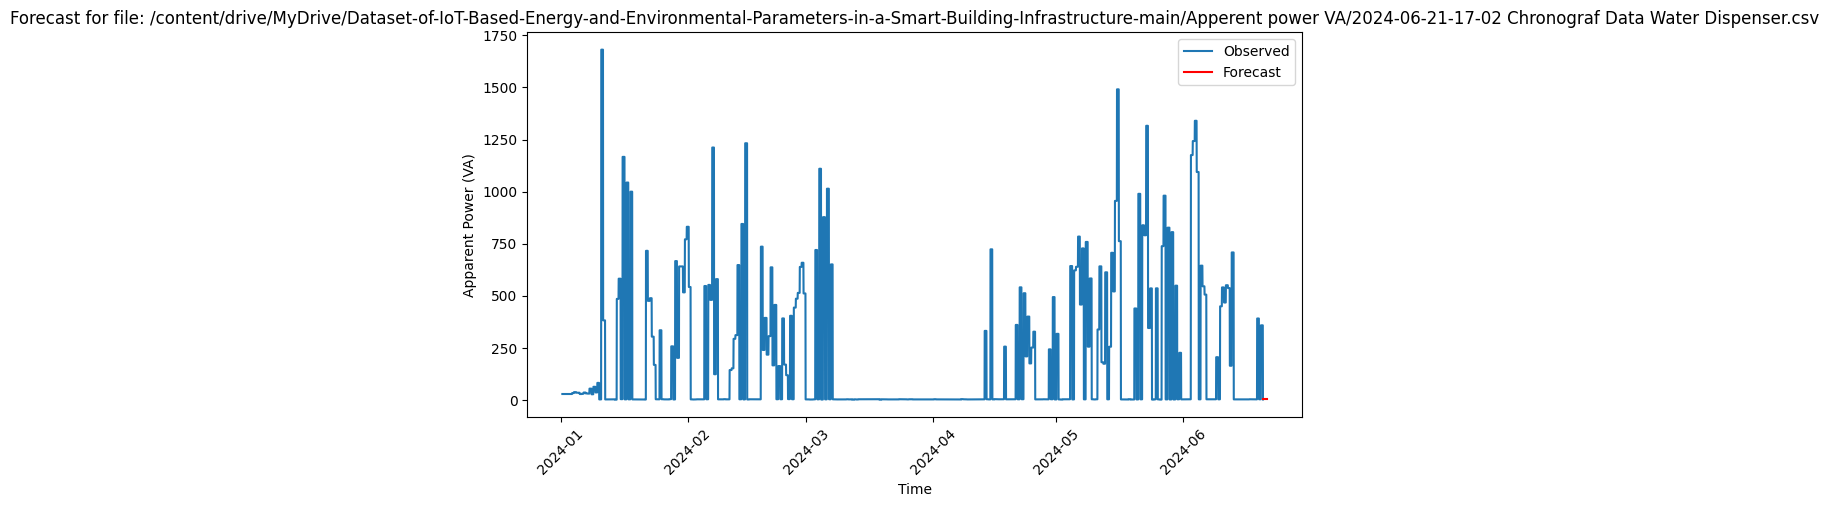

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2469.970, Time=2.20 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2461.970, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2463.970, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2463.970, Time=0.50 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2459.971, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2465.970, Time=0.66 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.480 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


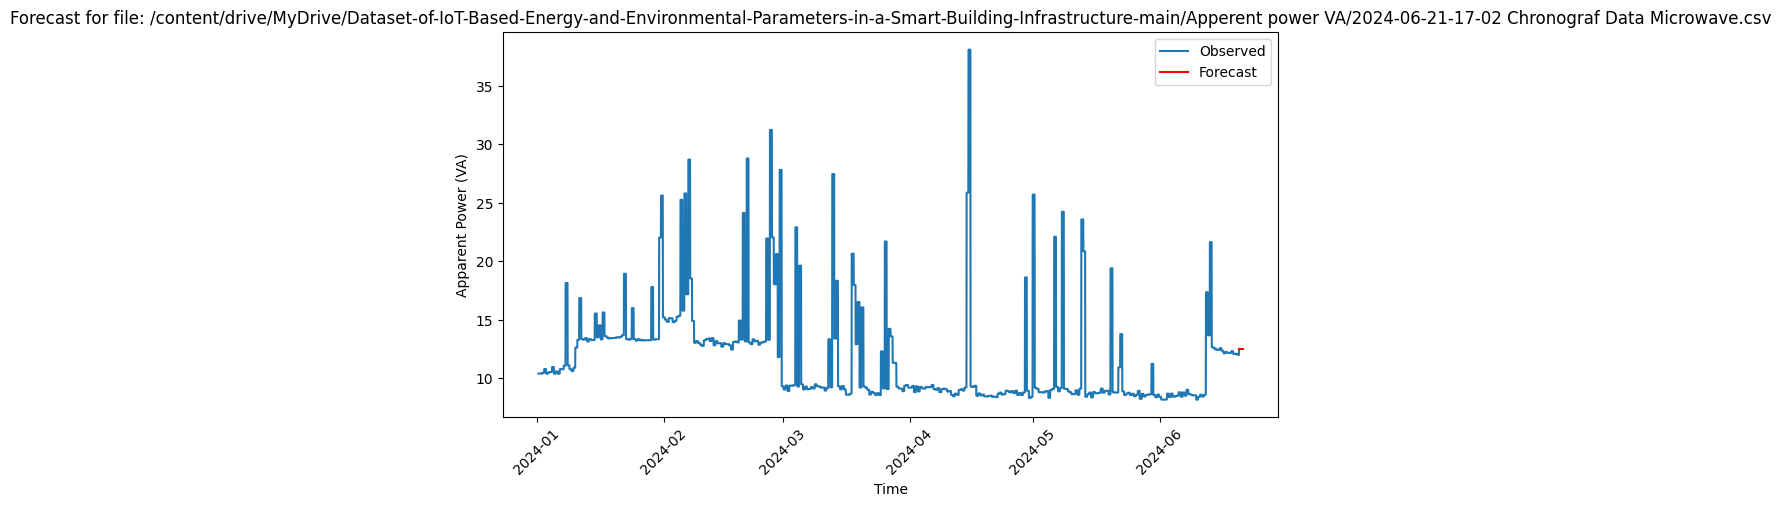

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2743.453, Time=1.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2735.453, Time=0.48 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2737.453, Time=1.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2737.453, Time=6.70 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2733.502, Time=0.25 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2739.453, Time=1.52 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 11.303 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


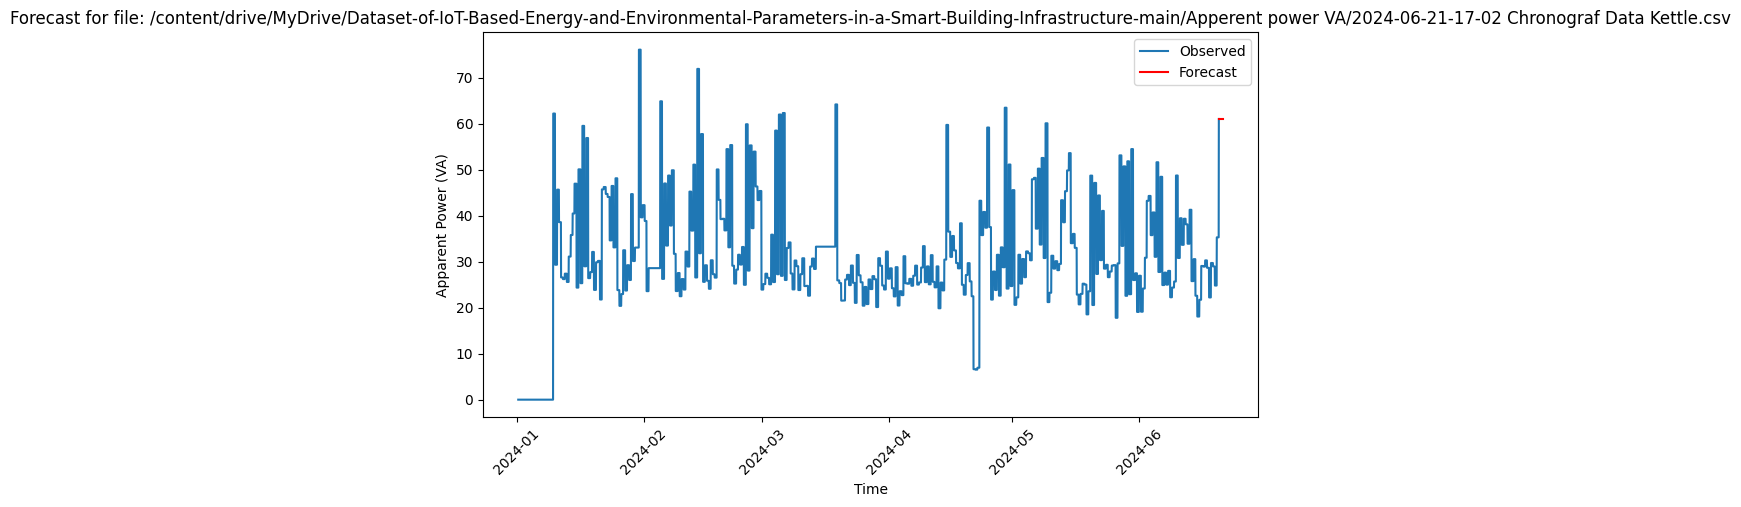

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4540.123, Time=1.07 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4532.123, Time=0.38 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4534.123, Time=0.65 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4534.123, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4530.123, Time=0.26 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4536.123, Time=0.80 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.744 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


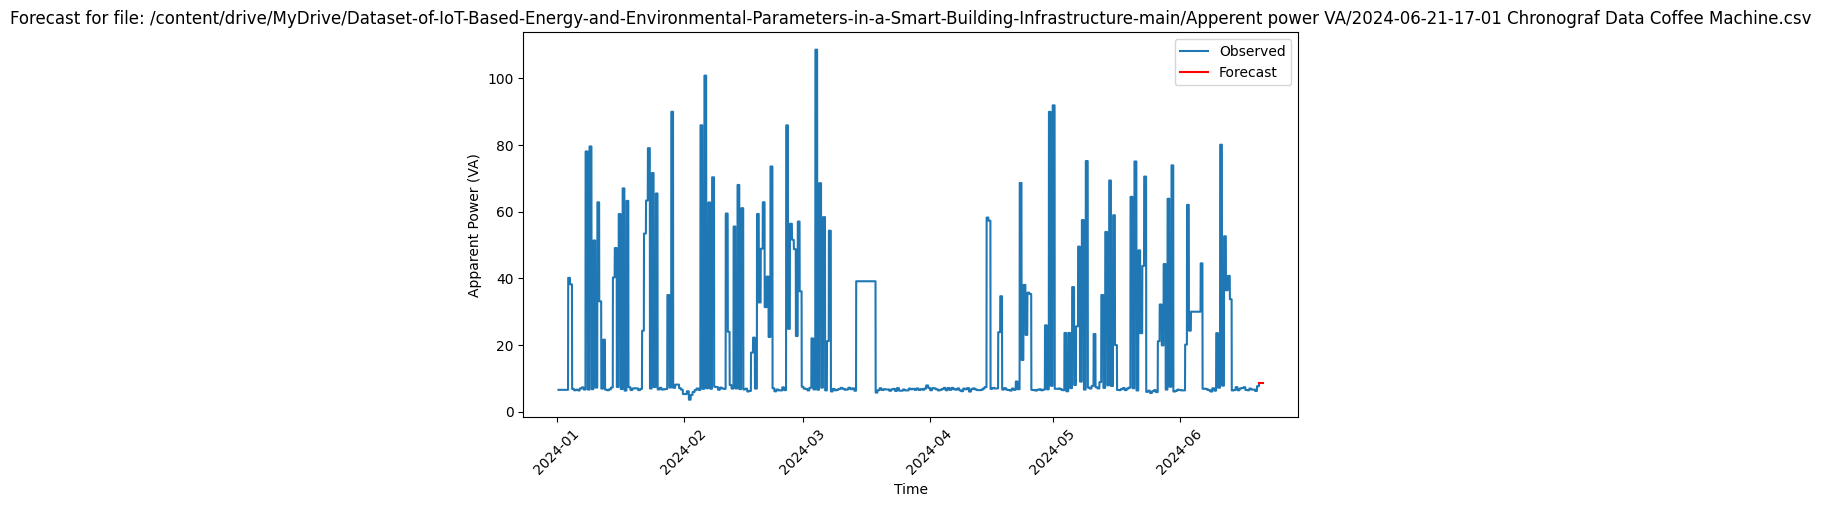

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1414.644, Time=1.62 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=11650.485, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1410.905, Time=0.86 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=7530.589, Time=4.00 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=1411.006, Time=0.95 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=1411.087, Time=0.60 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=1414.630, Time=1.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1412.904, Time=0.71 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 9.998 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


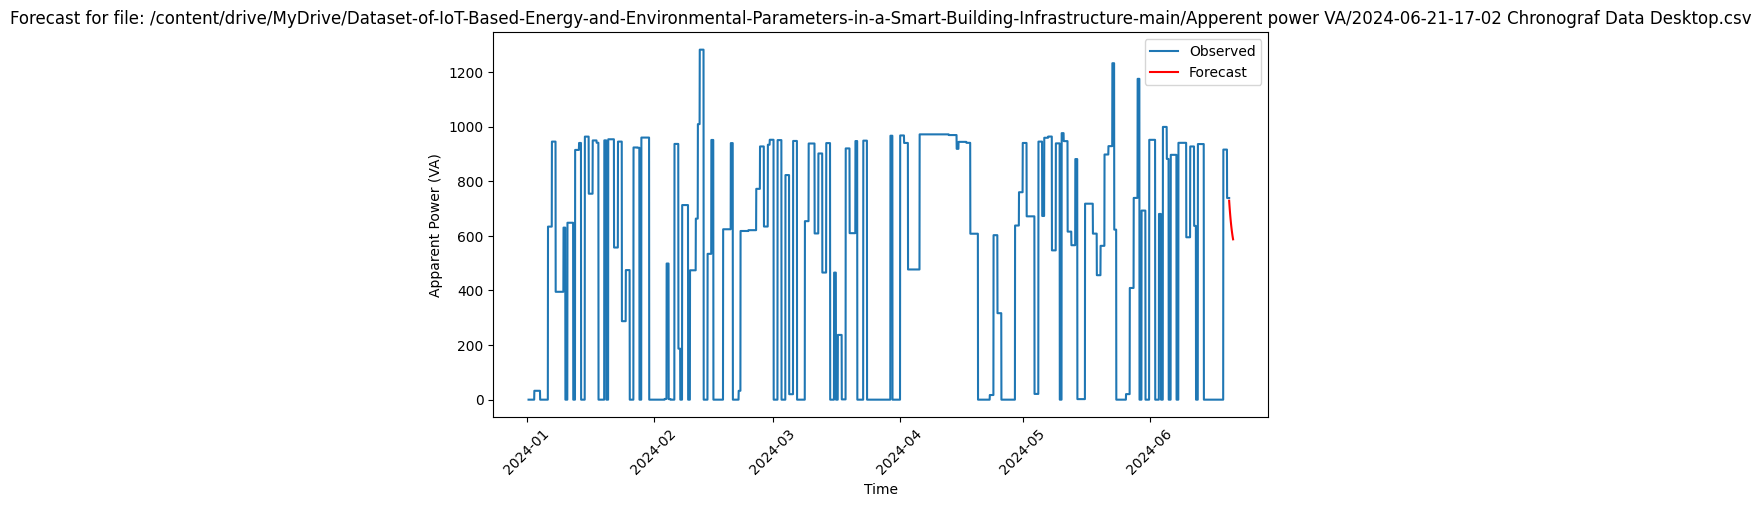

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3680.079, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3672.079, Time=0.39 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3674.079, Time=0.60 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3674.079, Time=0.61 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3670.080, Time=0.30 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3676.079, Time=0.79 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.751 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


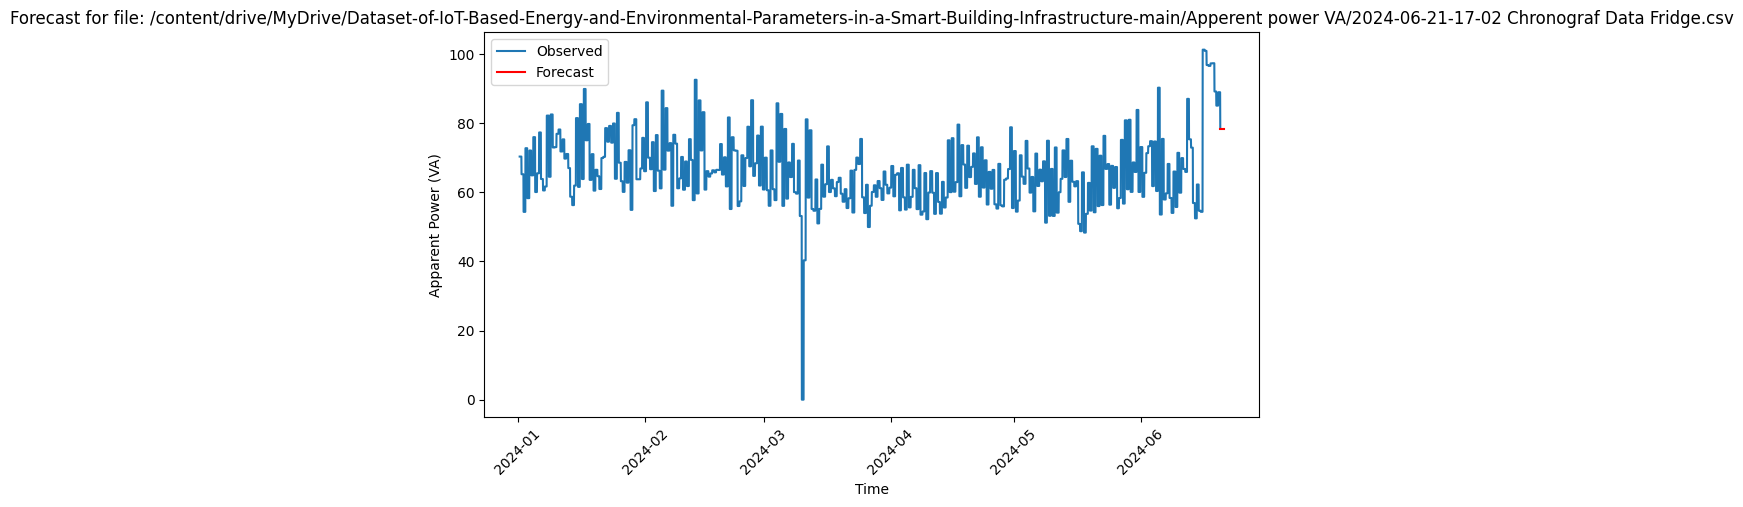

<ipython-input-8-89db5d56e824>:37: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df = df.resample('H').mean()
<ipython-input-8-89db5d56e824>:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ipython-input-8-89db5d56e824>:38: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['VA.mean_value'].fillna(method='ffill', inplace=True)
<ip

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2810.610, Time=1.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2802.610, Time=0.81 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2804.610, Time=0.83 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2804.610, Time=2.77 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2800.630, Time=0.44 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2806.610, Time=2.78 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.706 seconds


<ipython-input-8-89db5d56e824>:74: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')


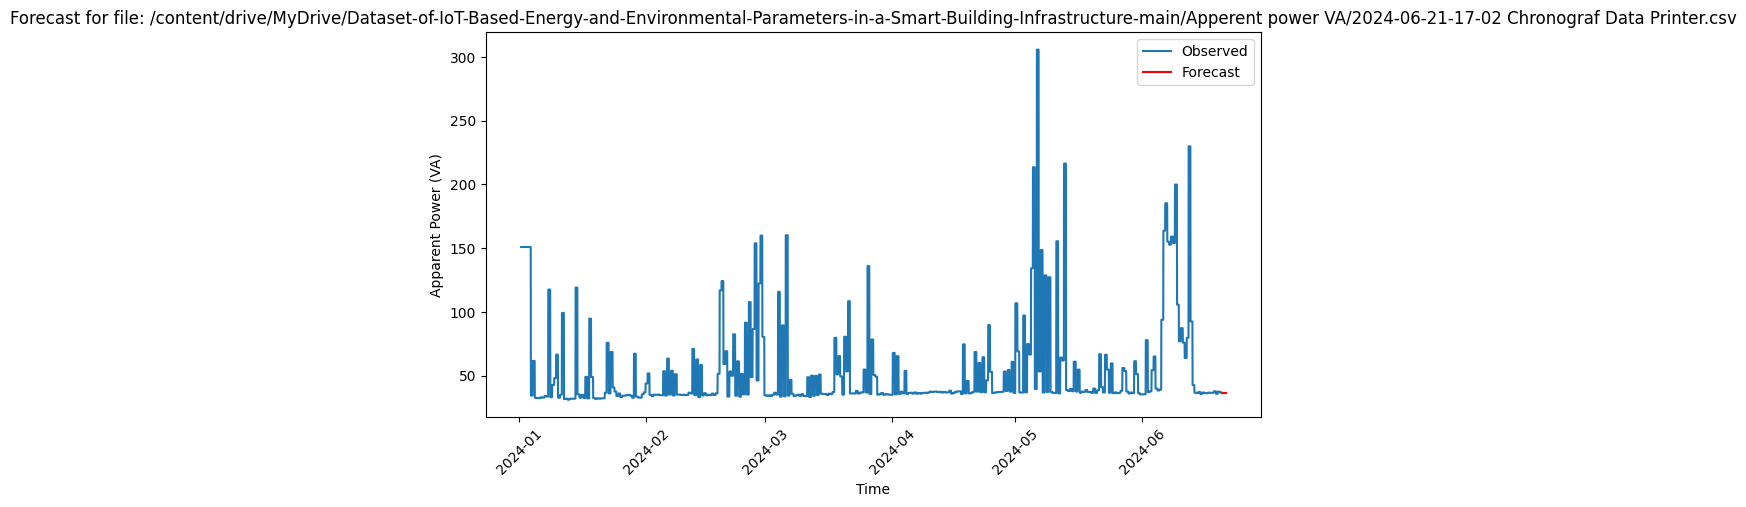

<ipython-input-8-89db5d56e824>:104: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  overall_forecast_index = pd.date_range(start='2024-01-01', periods=24, freq='H')


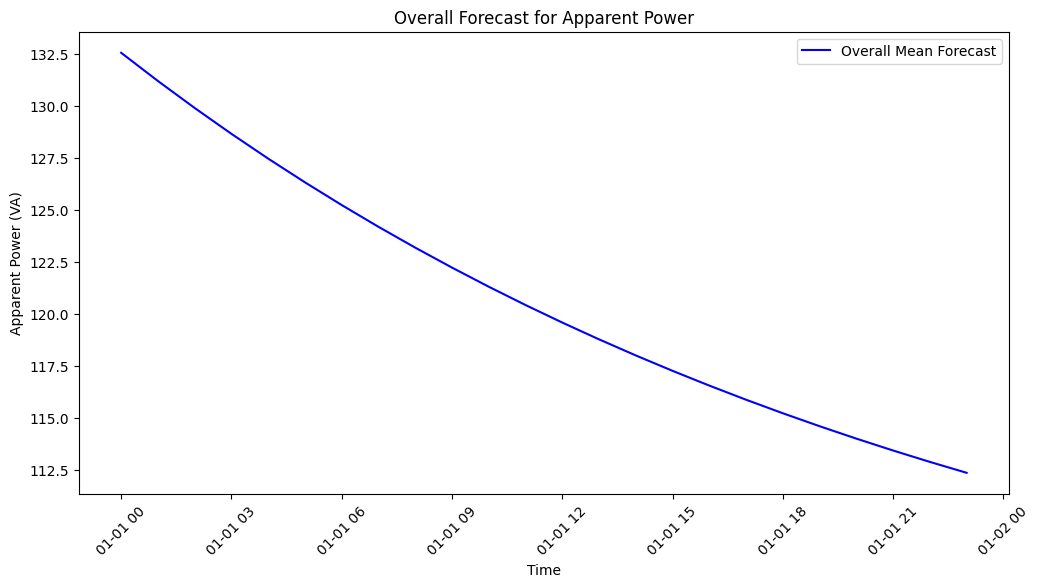

Forecasting complete. Results saved to CSV files.


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'

# Define paths for each subfolder with recursive search pattern
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)

print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")

# Function to preprocess and forecast for each file
def preprocess_and_forecast(file_list):
    forecasts = []

    for file in file_list:
        # Load CSV file
        df = pd.read_csv(file)

        # Parse timestamp column
        if 'time' in df.columns:
            df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
        else:
            print(f"Timestamp column not found in file: {file}")
            continue

        # Set the timestamp as the index and sort the index
        df.set_index('time', inplace=True)
        df.sort_index(inplace=True)

        # Handle missing timestamps by forward and backward filling
        df = df.resample('H').mean()
        df['VA.mean_value'].fillna(method='ffill', inplace=True)
        df['VA.mean_value'].fillna(method='bfill', inplace=True)

        # Check if the series has enough data points
        if len(df.dropna()) < 50:
            print(f"Insufficient data in file: {file}")
            continue

        # Check for stationarity using the ADF test
        adf_result = adfuller(df['VA.mean_value'].dropna())
        if adf_result[1] > 0.05:
            print(f"Data is not stationary for file: {file}. Applying differencing.")
            df['VA.mean_value'] = df['VA.mean_value'].diff().dropna()

        # Normalize the data
        data_mean = df['VA.mean_value'].mean()
        data_std = df['VA.mean_value'].std()
        df['VA.mean_value'] = (df['VA.mean_value'] - data_mean) / data_std

        # Use auto_arima for best parameter selection
        try:
            model = auto_arima(df['VA.mean_value'].dropna(), seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
            order = model.order

            # Fit ARIMA model
            arima_model = ARIMA(df['VA.mean_value'].dropna(), order=order)
            result = arima_model.fit()

            # Forecast the next 24 time steps
            forecast = result.forecast(steps=24)

            # Inverse transform the forecast
            forecast = (forecast * data_std) + data_mean
            forecasts.append(forecast)

            # Create a new timestamp index for the forecast
            forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='H')

            # Plot the forecast
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df['VA.mean_value'] * data_std + data_mean, label='Observed')
            plt.plot(forecast_index, forecast, label='Forecast', color='red')
            plt.title(f'Forecast for file: {file}')
            plt.xlabel('Time')
            plt.ylabel('Apparent Power (VA)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    return forecasts

# Call the function for apparent power files
forecasts = preprocess_and_forecast(apparent_power_files)

# Aggregate all individual forecasts into a DataFrame
all_forecasts = pd.DataFrame(forecasts).T
all_forecasts.columns = [f'Forecast_{i+1}' for i in range(len(forecasts))]

# Calculate the overall mean forecast
overall_forecast = all_forecasts.mean(axis=1)

# Create a time index for the overall forecast
overall_forecast_index = pd.date_range(start='2024-01-01', periods=24, freq='H')

# Plot the overall forecast
plt.figure(figsize=(12, 6))
plt.plot(overall_forecast_index, overall_forecast, label='Overall Mean Forecast', color='blue')
plt.title('Overall Forecast for Apparent Power')
plt.xlabel('Time')
plt.ylabel('Apparent Power (VA)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Save the results to CSV files
all_forecasts.to_csv('individual_forecasts.csv', index=False)
overall_forecast.to_csv('overall_forecast.csv', index=False)

print("Forecasting complete. Results saved to CSV files.")


Found 7 Apparent Power CSV files.


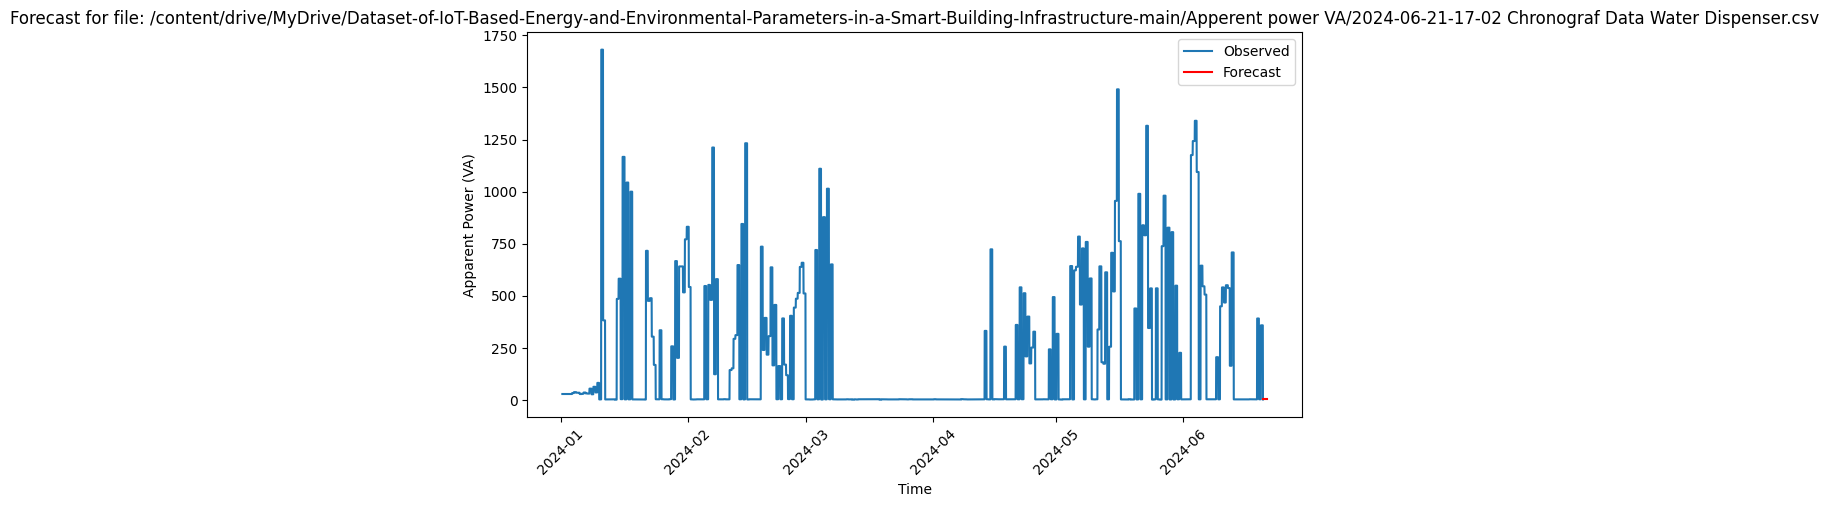

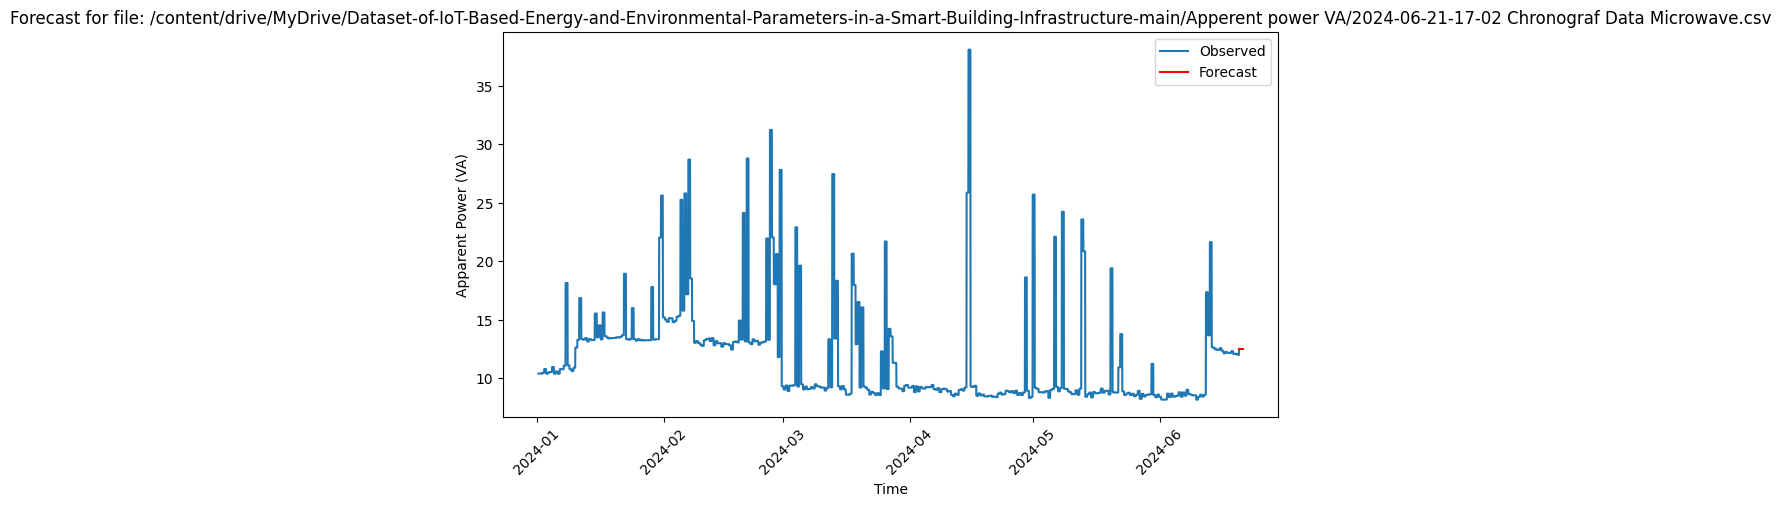

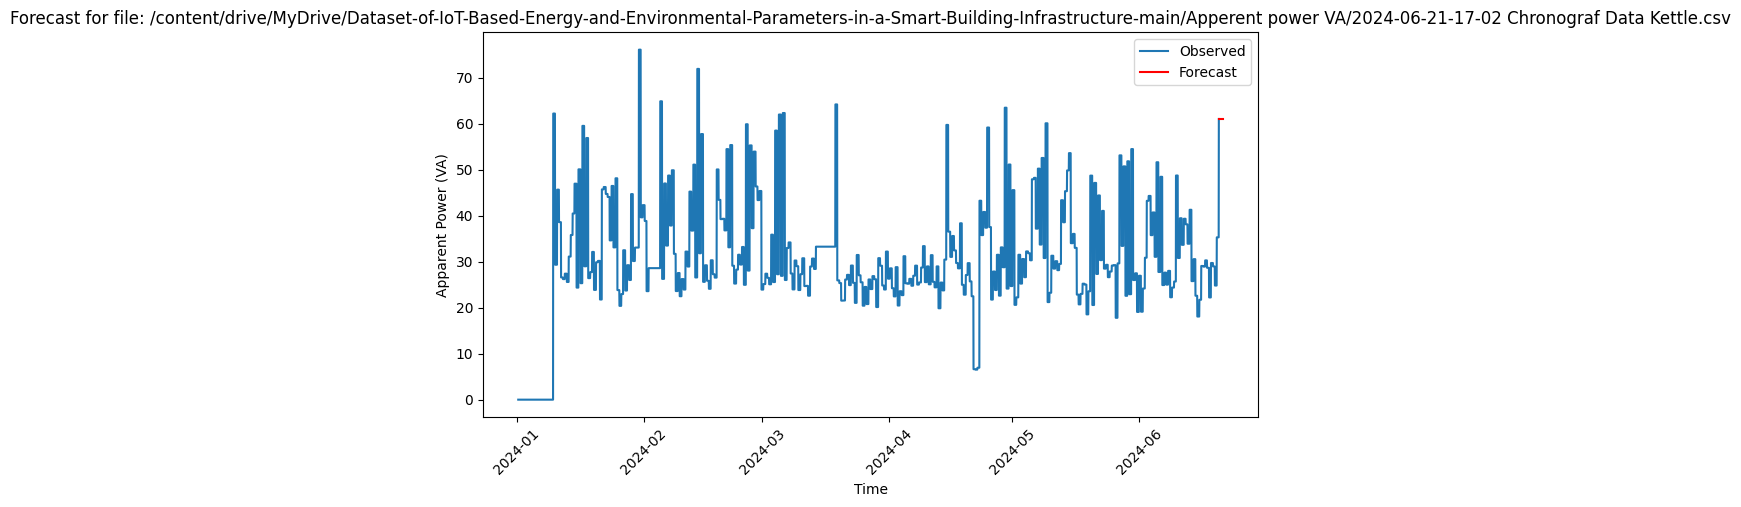

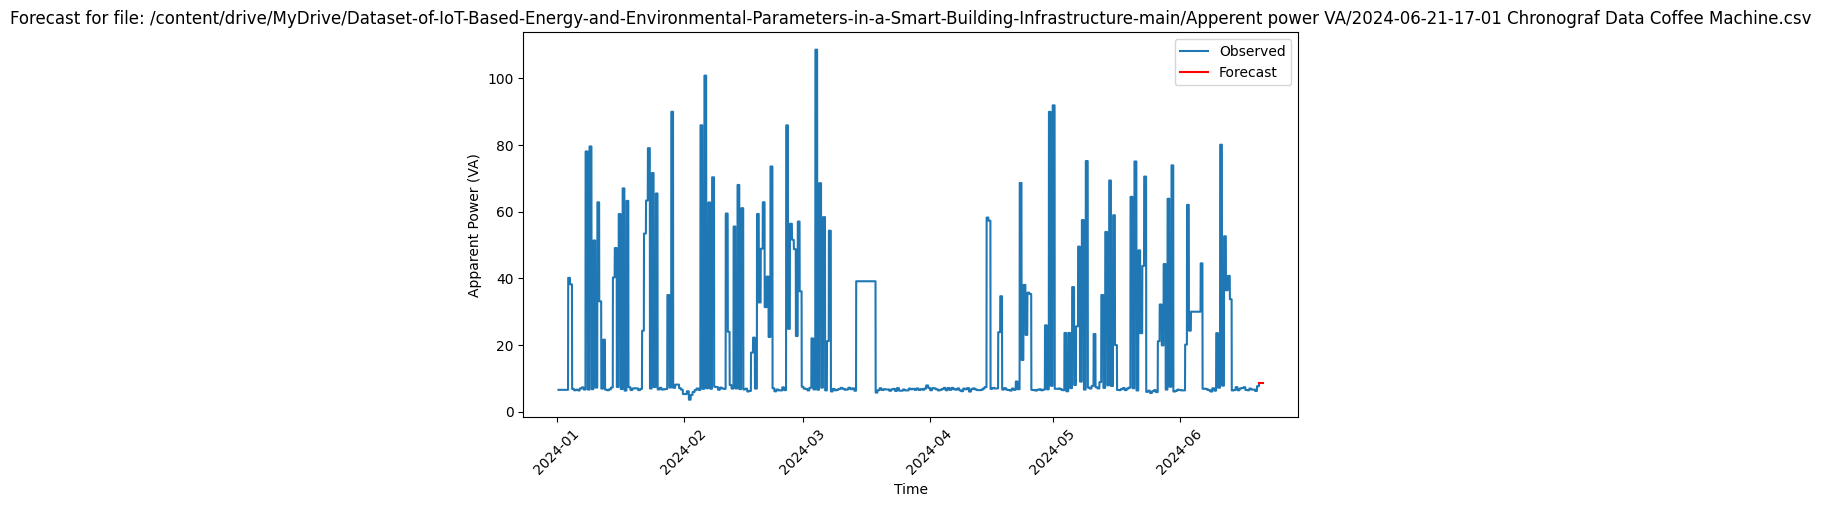

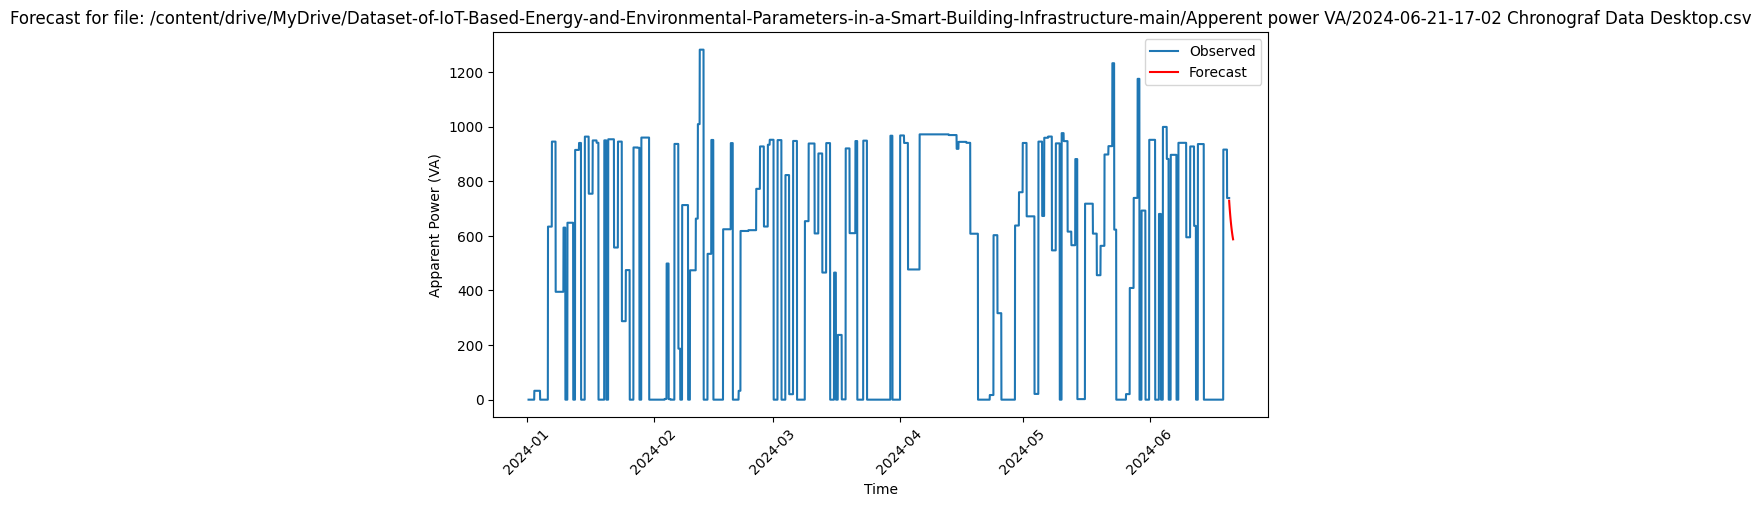

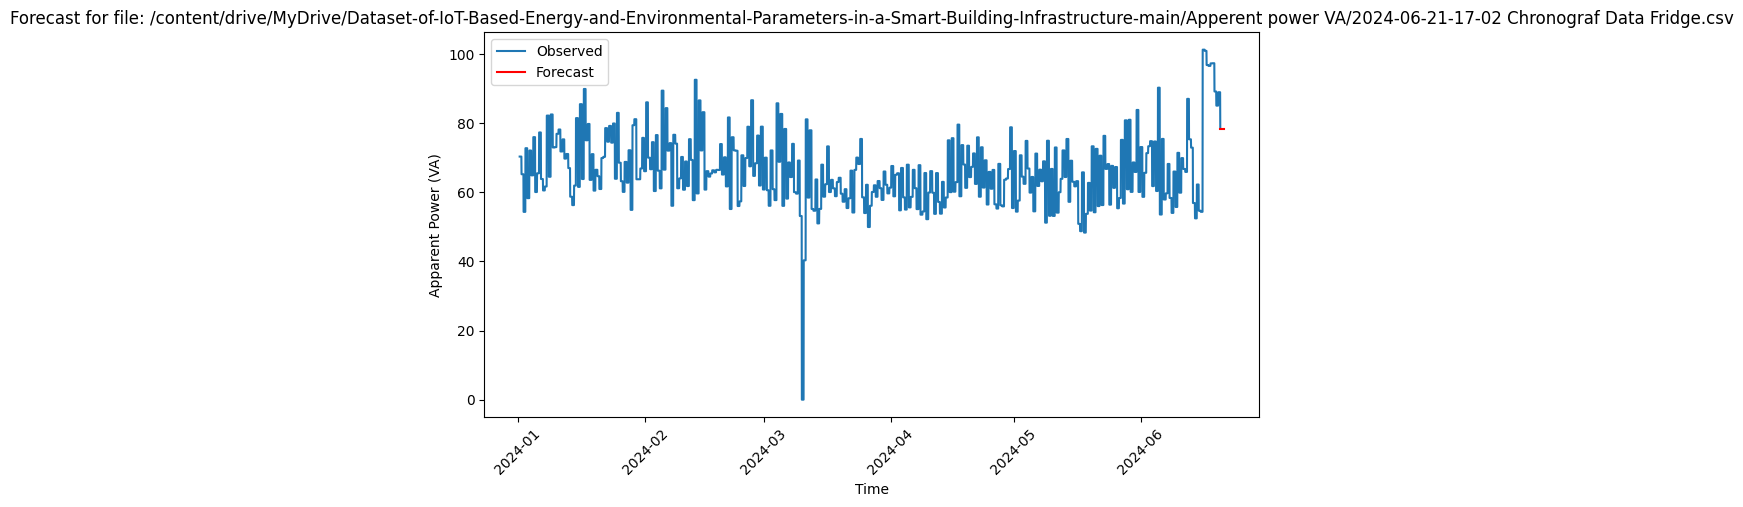

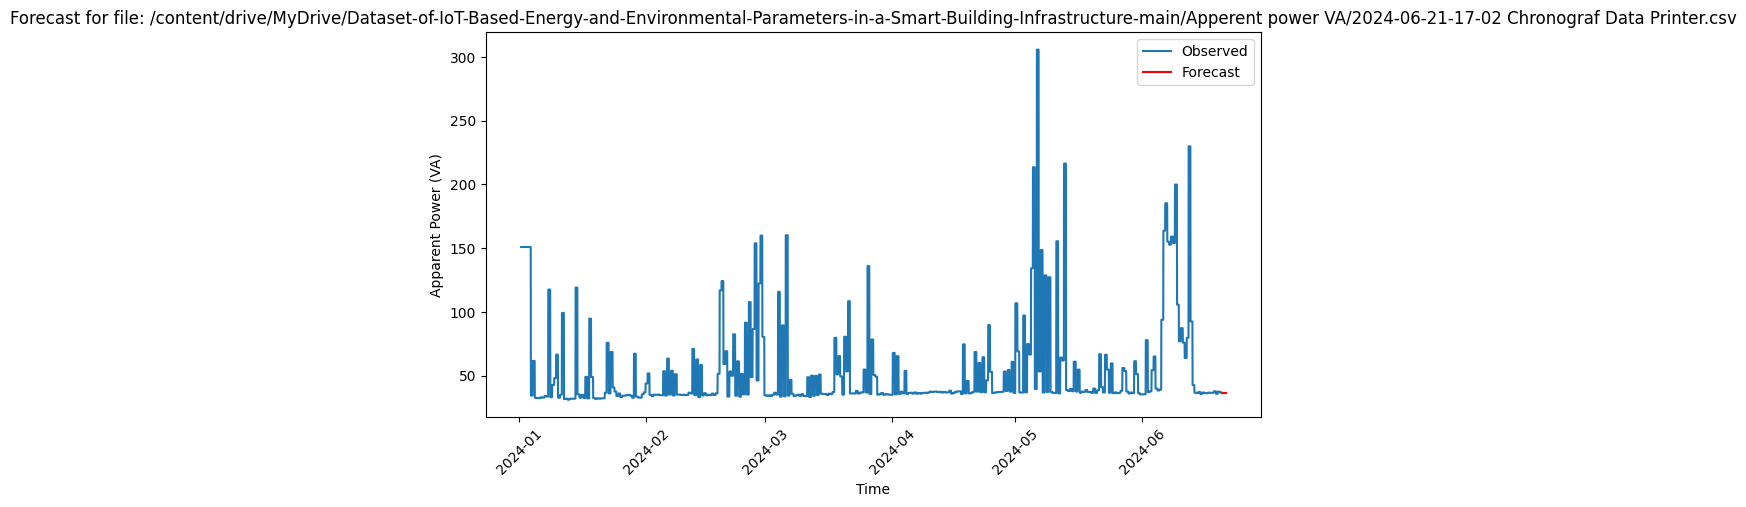

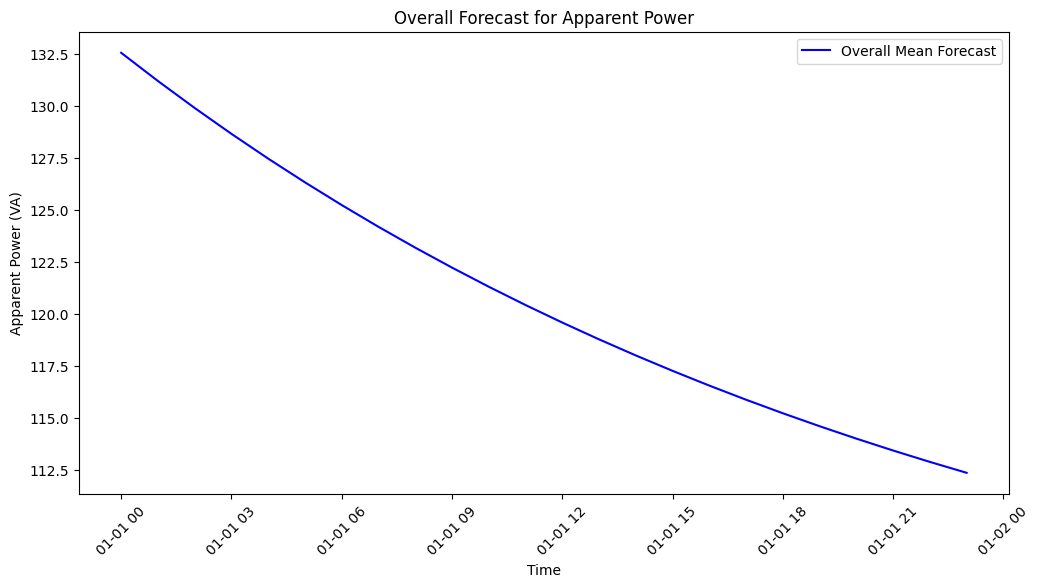

Forecasting complete. Results saved to CSV files.


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'

# Define paths for each subfolder with recursive search pattern
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)

# Print the number of CSV files found
print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")

# Function to preprocess and forecast for each file
def preprocess_and_forecast(file_list):
    forecasts = []

    for file in file_list:
        # Load CSV file
        df = pd.read_csv(file)

        # Parse timestamp column
        if 'time' in df.columns:
            df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
        else:
            print(f"Timestamp column not found in file: {file}")
            continue

        # Set the timestamp as the index and sort the index
        df.set_index('time', inplace=True)
        df.sort_index(inplace=True)

        # Resample data to hourly frequency using lowercase 'h'
        df = df.resample('h').mean()

        # Handle missing values using forward-fill and backward-fill
        df['VA.mean_value'] = df['VA.mean_value'].ffill()
        df['VA.mean_value'] = df['VA.mean_value'].bfill()

        # Check if the series has enough data points
        if len(df.dropna()) < 50:
            print(f"Insufficient data in file: {file}")
            continue

        # Check for stationarity using the ADF test
        adf_result = adfuller(df['VA.mean_value'].dropna())
        if adf_result[1] > 0.05:
            print(f"Data is not stationary for file: {file}. Applying differencing.")
            df['VA.mean_value'] = df['VA.mean_value'].diff().dropna()

        # Normalize the data
        data_mean = df['VA.mean_value'].mean()
        data_std = df['VA.mean_value'].std()
        df['VA.mean_value'] = (df['VA.mean_value'] - data_mean) / data_std

        # Use auto_arima for best parameter selection without trace output
        try:
            model = auto_arima(df['VA.mean_value'].dropna(), seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
            order = model.order

            # Fit ARIMA model
            arima_model = ARIMA(df['VA.mean_value'].dropna(), order=order)
            result = arima_model.fit()

            # Forecast the next 24 time steps
            forecast = result.forecast(steps=24)

            # Inverse transform the forecast
            forecast = (forecast * data_std) + data_mean
            forecasts.append(forecast)

            # Create a new timestamp index for the forecast using lowercase 'h'
            forecast_index = pd.date_range(start=df.index[-1], periods=24, freq='h')

            # Plot the forecast
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df['VA.mean_value'] * data_std + data_mean, label='Observed')
            plt.plot(forecast_index, forecast, label='Forecast', color='red')
            plt.title(f'Forecast for file: {file}')
            plt.xlabel('Time')
            plt.ylabel('Apparent Power (VA)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    return forecasts

# Call the function for apparent power files
forecasts = preprocess_and_forecast(apparent_power_files)

# Aggregate all individual forecasts into a DataFrame
all_forecasts = pd.DataFrame(forecasts).T
all_forecasts.columns = [f'Forecast_{i+1}' for i in range(len(forecasts))]

# Calculate the overall mean forecast
overall_forecast = all_forecasts.mean(axis=1)

# Create a time index for the overall forecast using lowercase 'h'
overall_forecast_index = pd.date_range(start='2024-01-01', periods=24, freq='h')

# Plot the overall forecast
plt.figure(figsize=(12, 6))
plt.plot(overall_forecast_index, overall_forecast, label='Overall Mean Forecast', color='blue')
plt.title('Overall Forecast for Apparent Power')
plt.xlabel('Time')
plt.ylabel('Apparent Power (VA)')
plt.legend()
plt.xticks(rotation=45)
plt.show()

# Save the results to CSV files
all_forecasts.to_csv('individual_forecasts.csv', index=False)
overall_forecast.to_csv('overall_forecast.csv', index=False)

print("Forecasting complete. Results saved to CSV files.")


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.5 MB/s eta 0:00:00


Found 7 Apparent Power CSV files.

Forecasting for: 24_hours


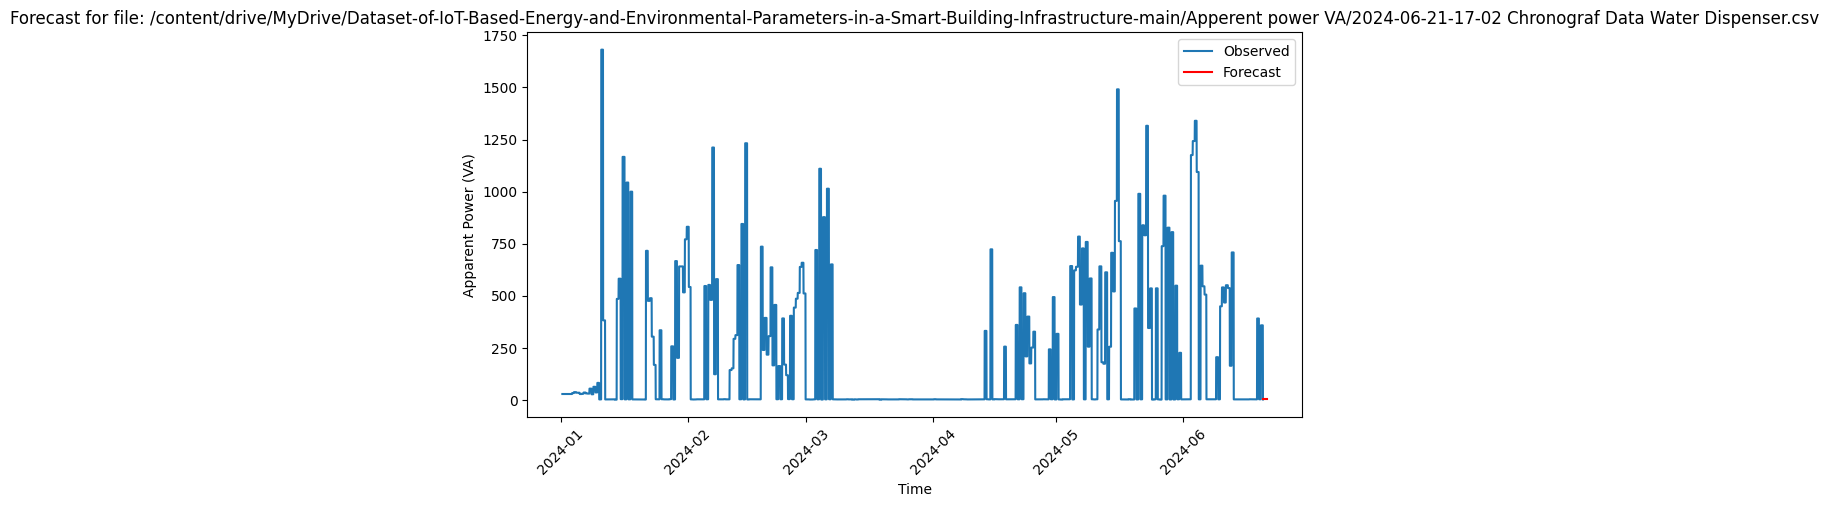

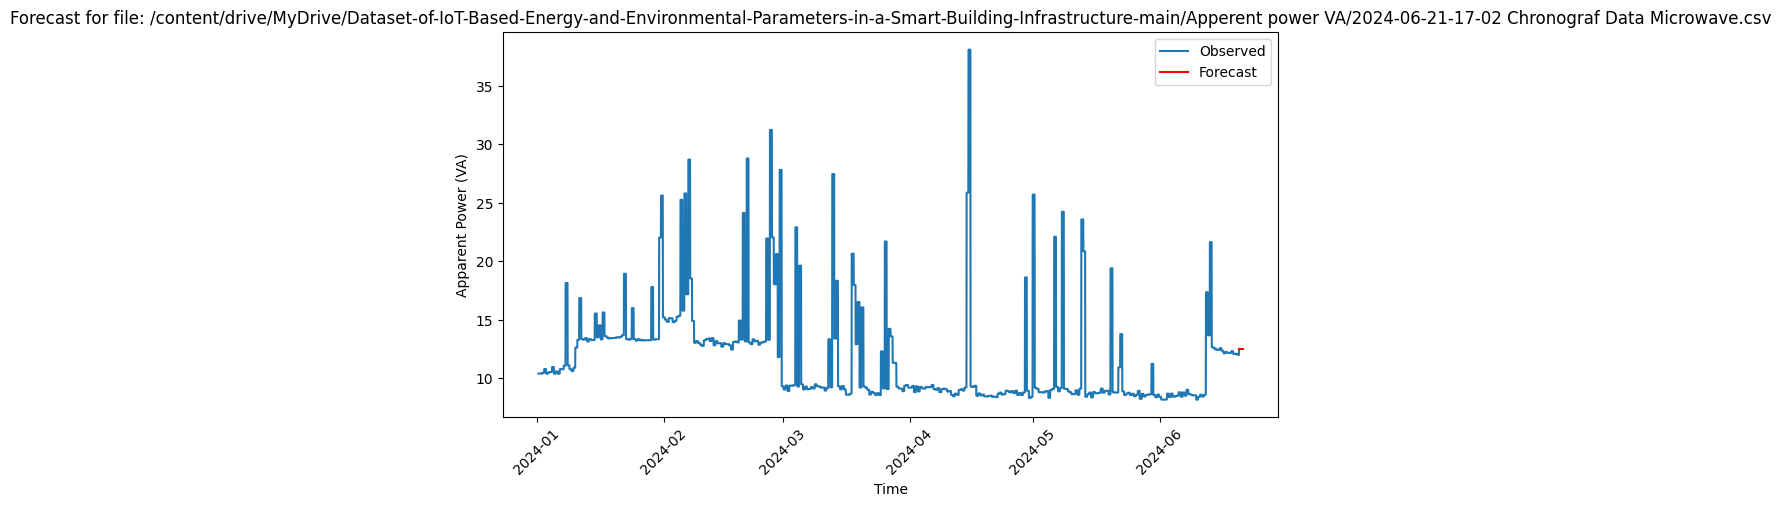

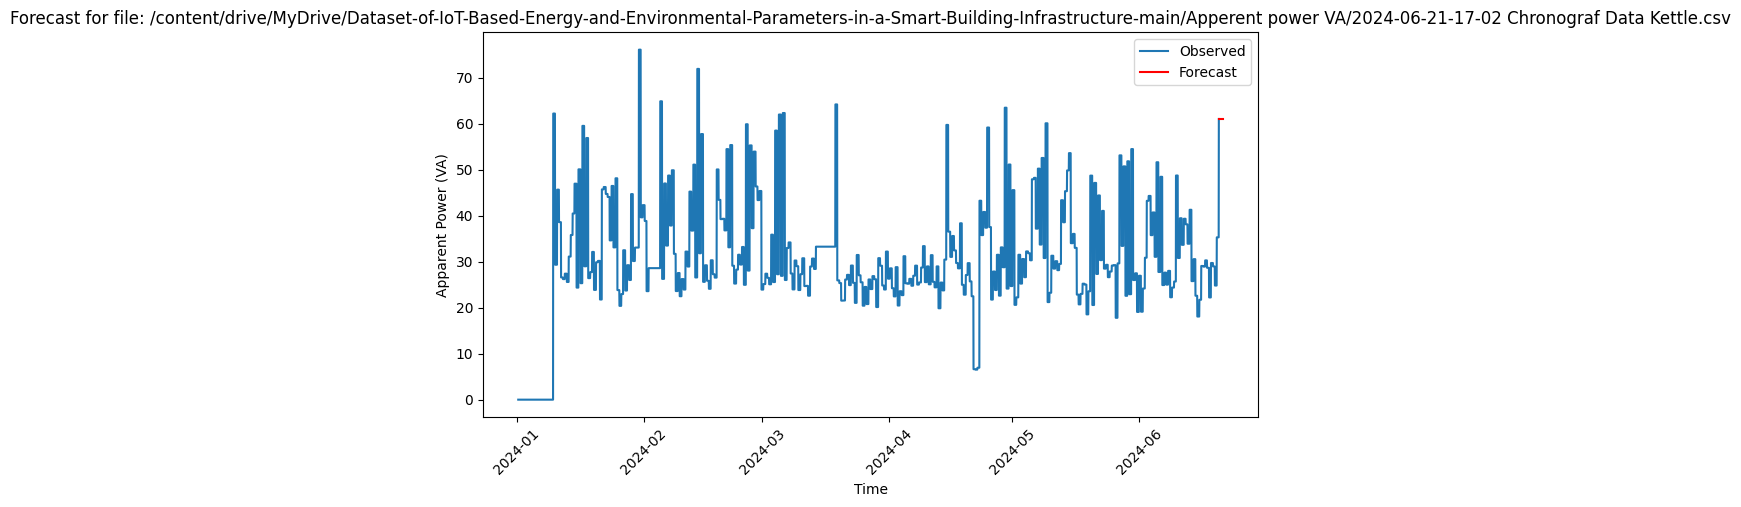

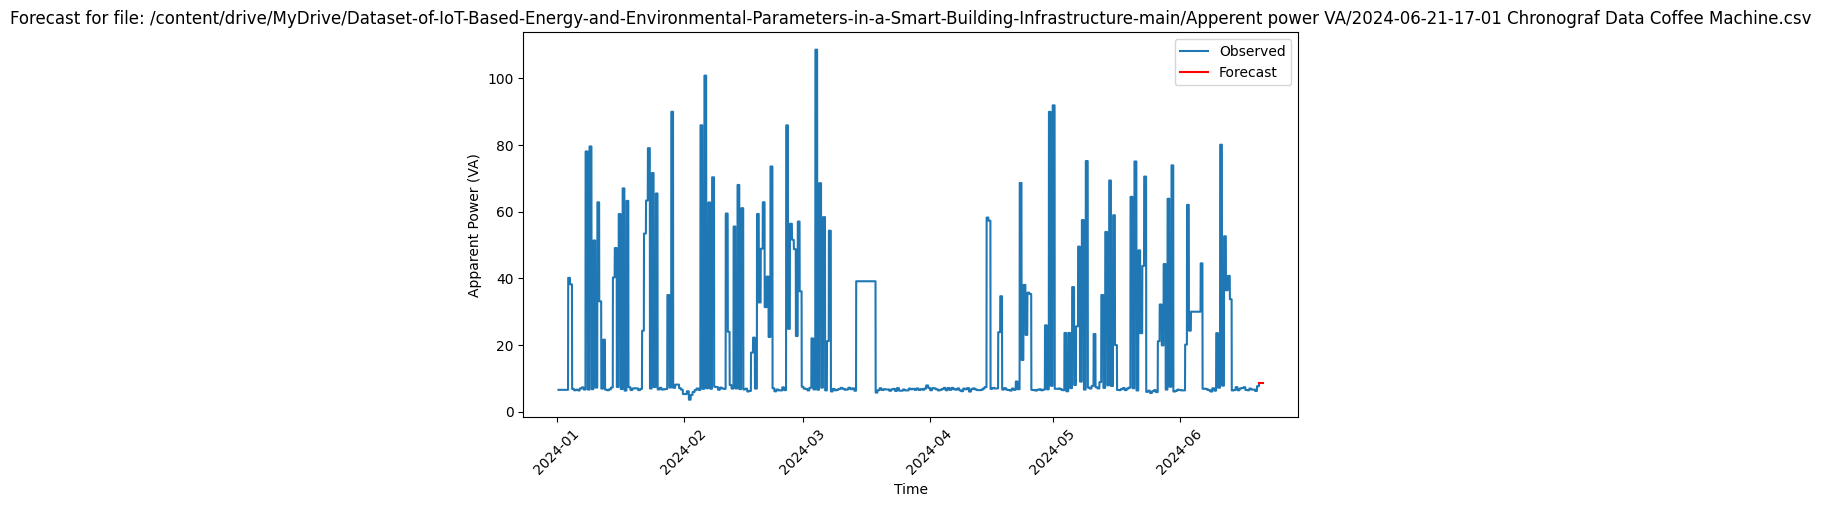

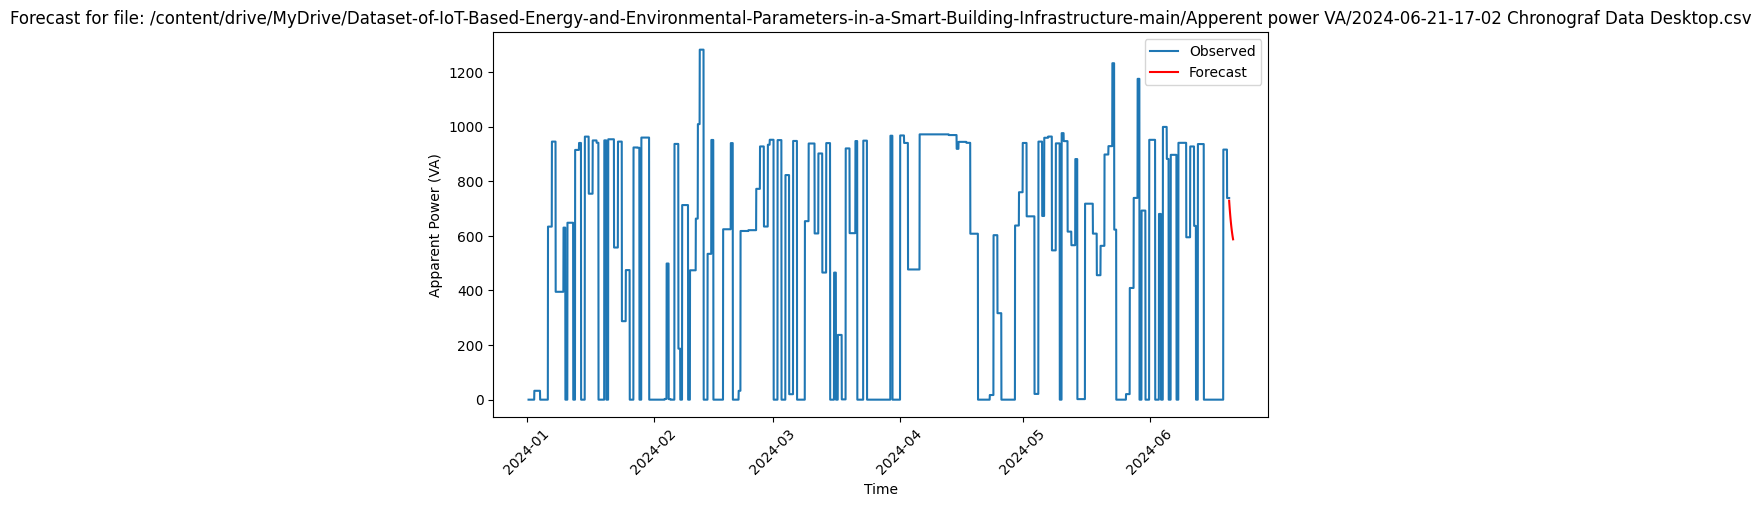

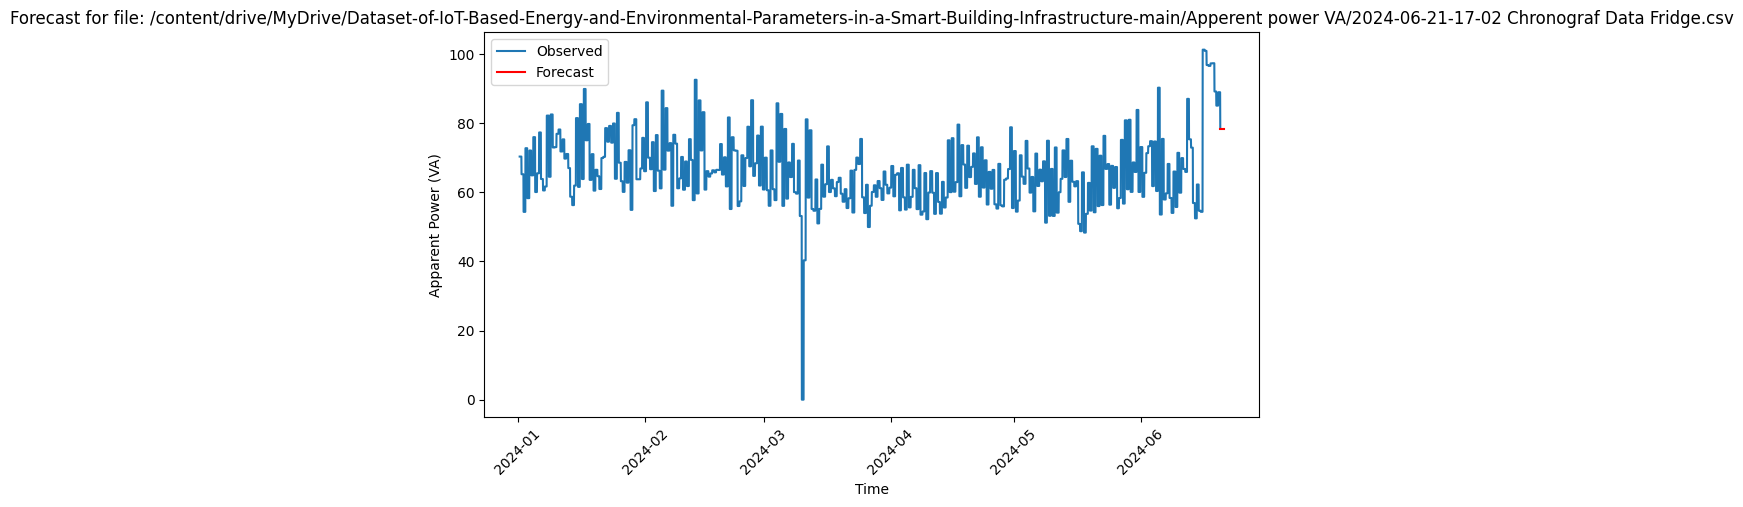

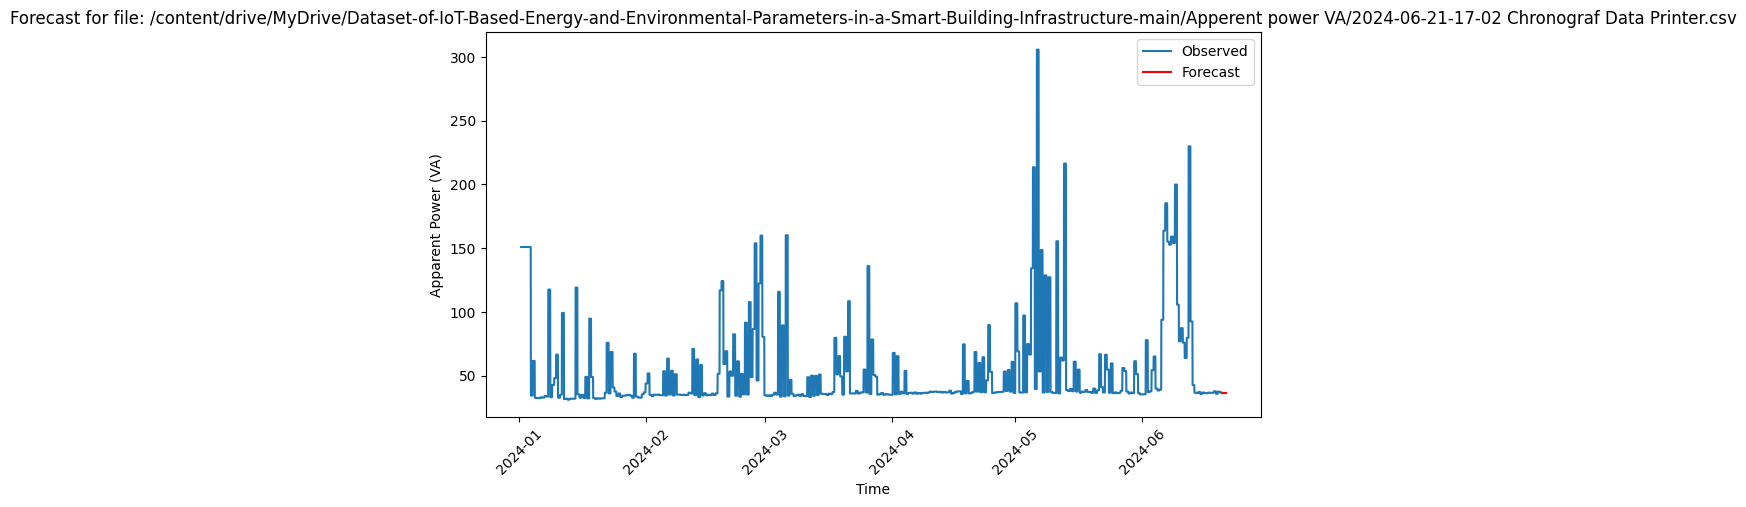

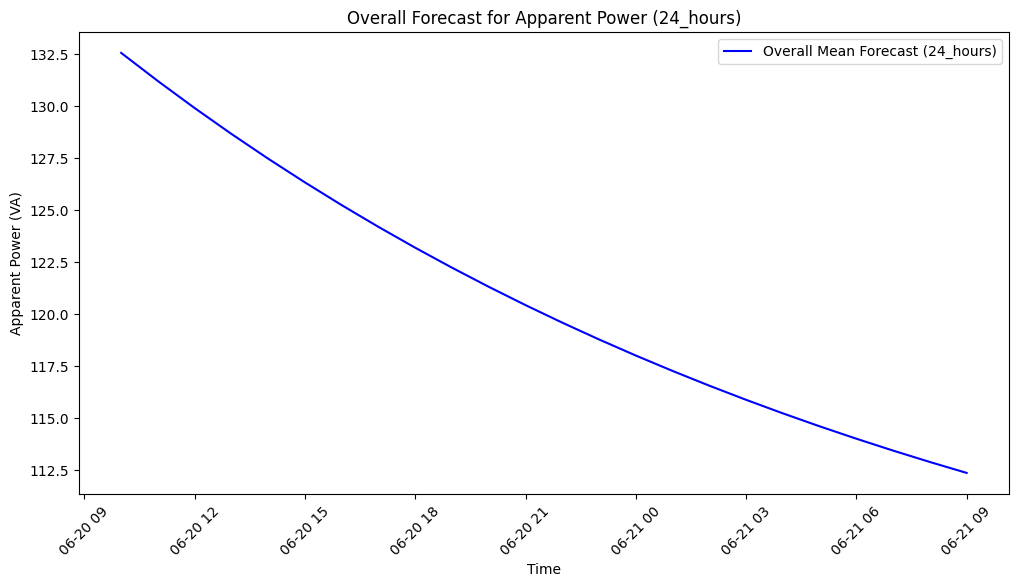


Forecasting for: 1_week


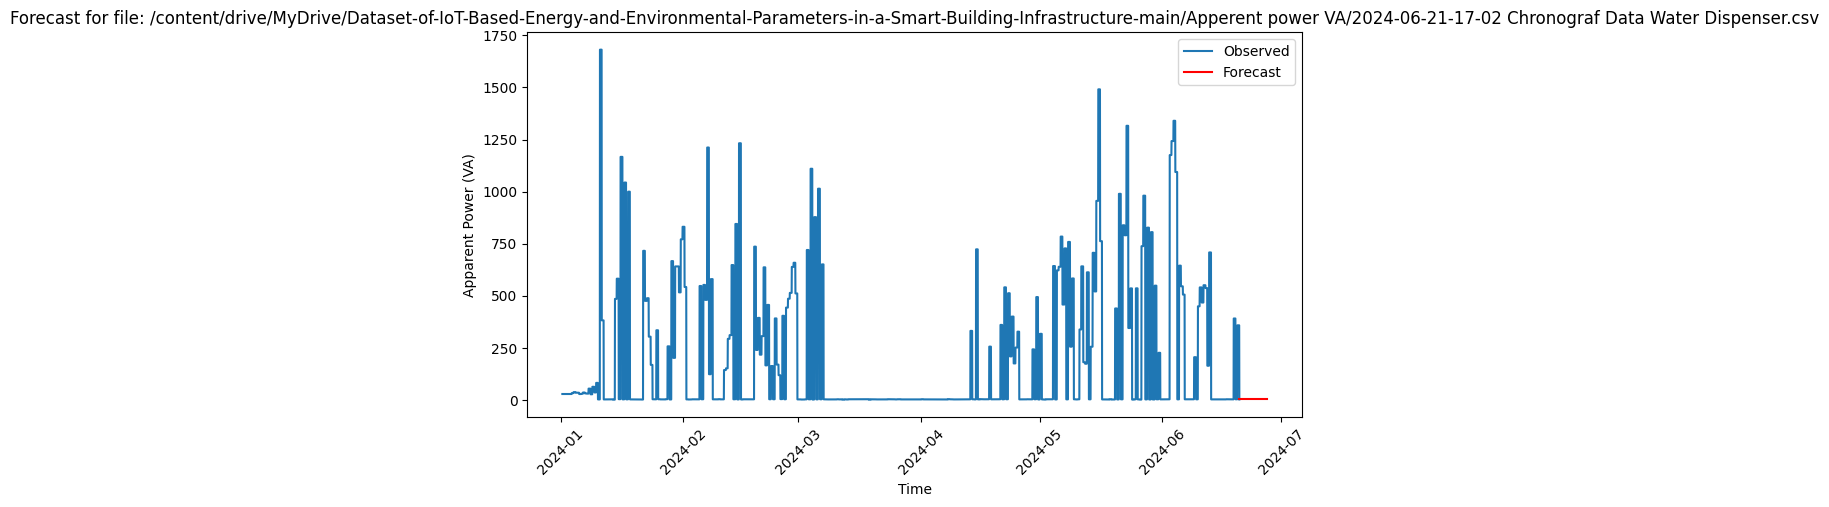

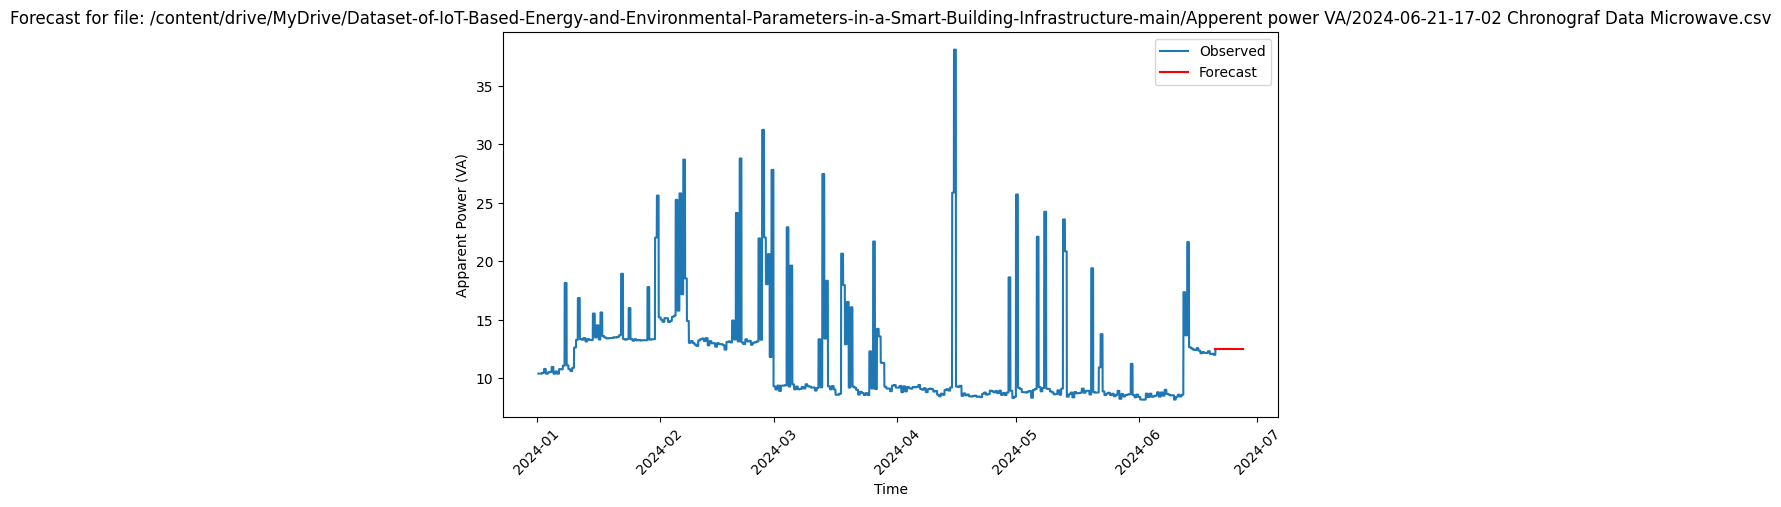

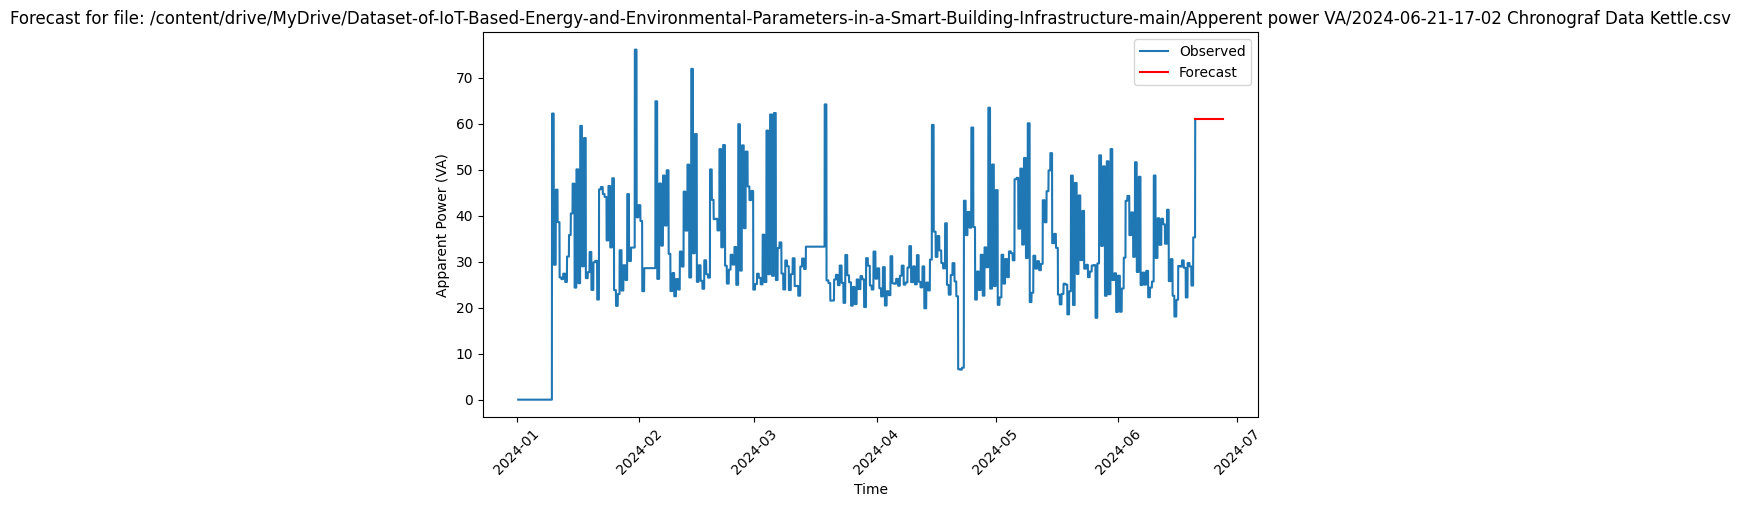

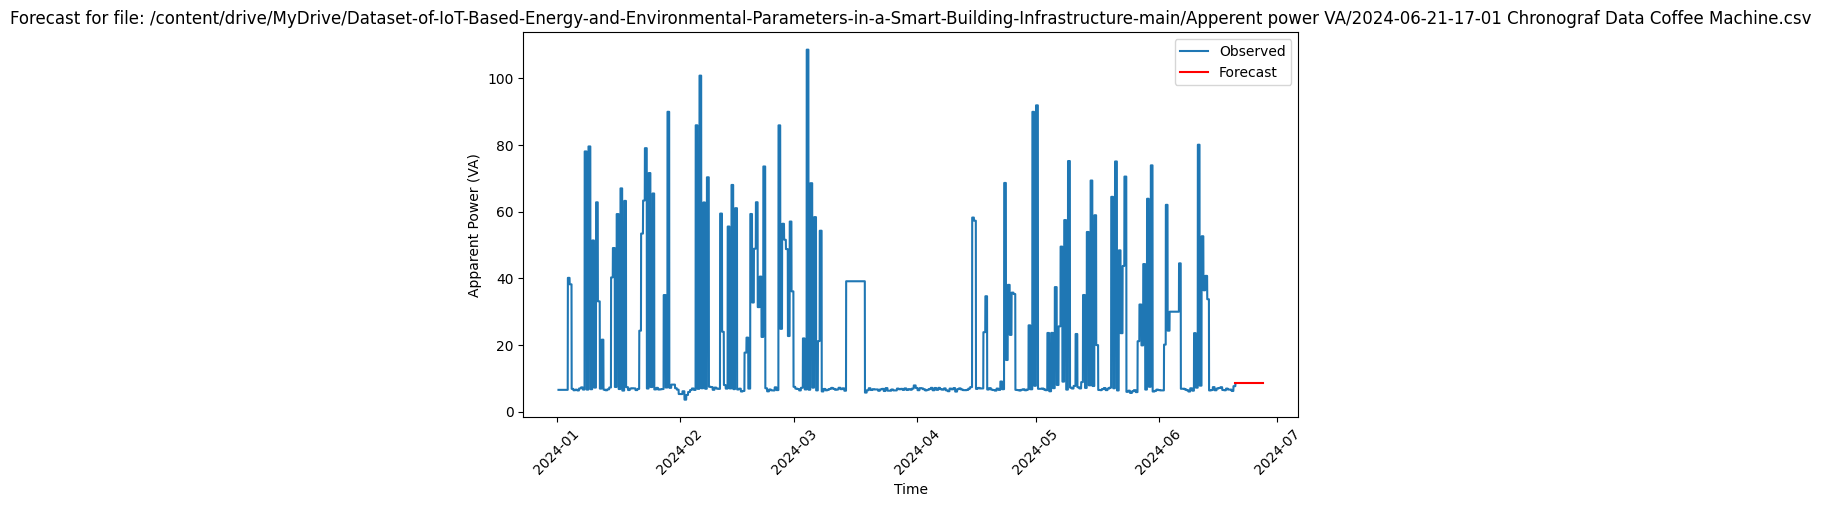

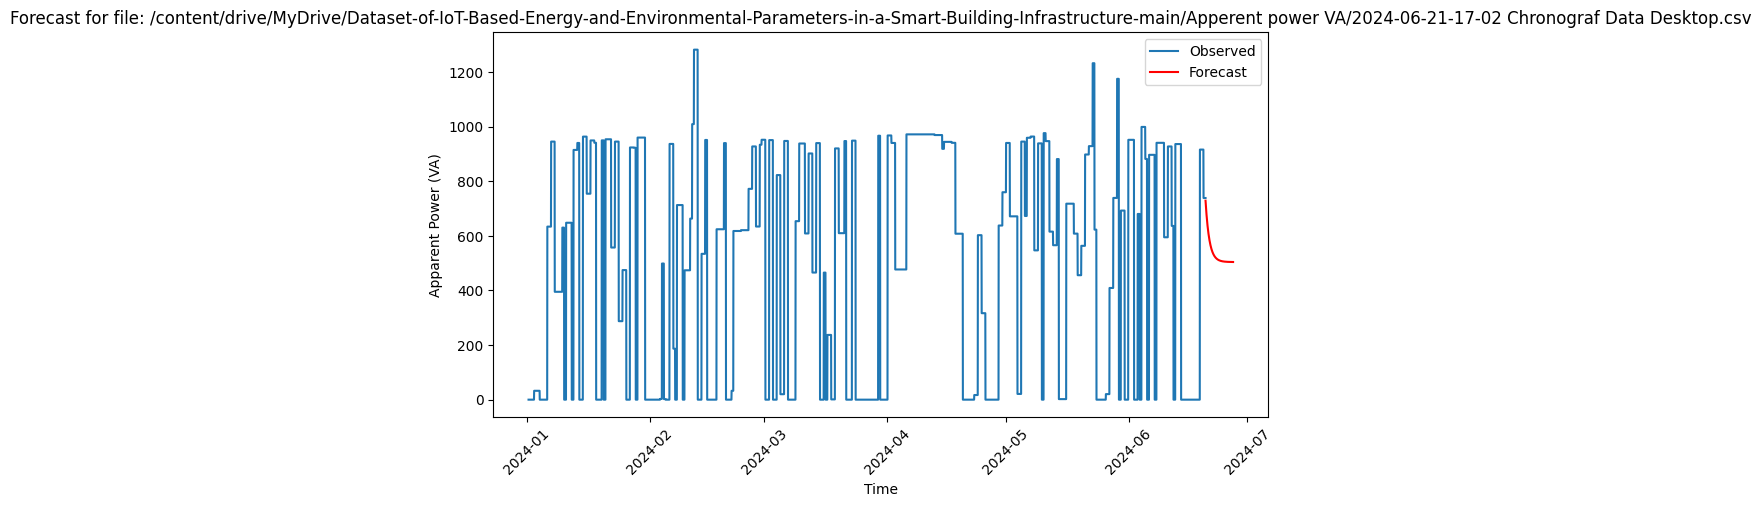

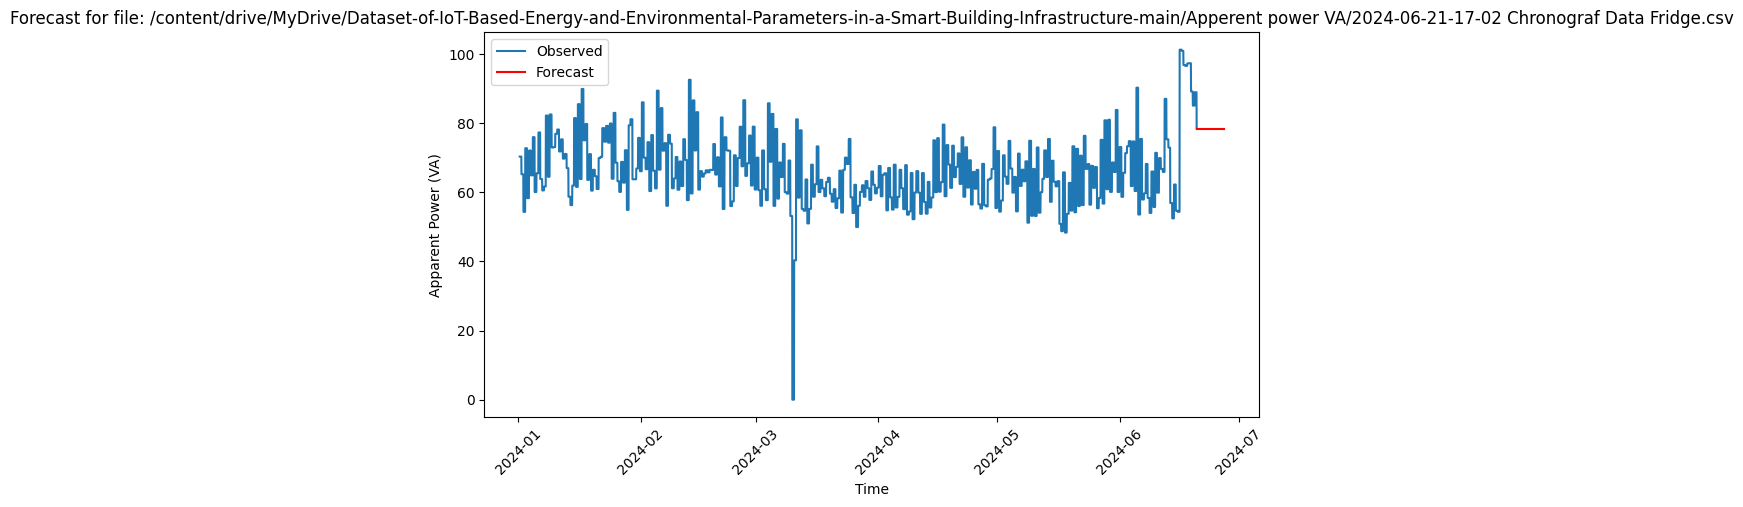

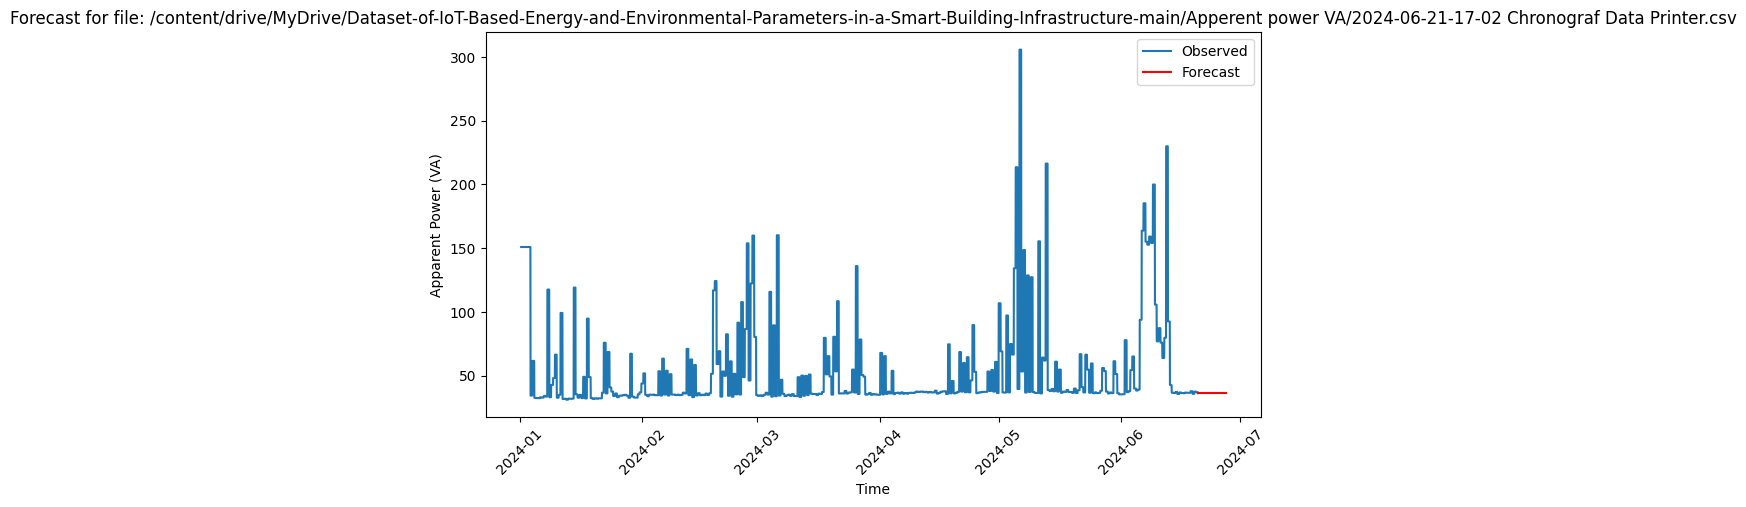

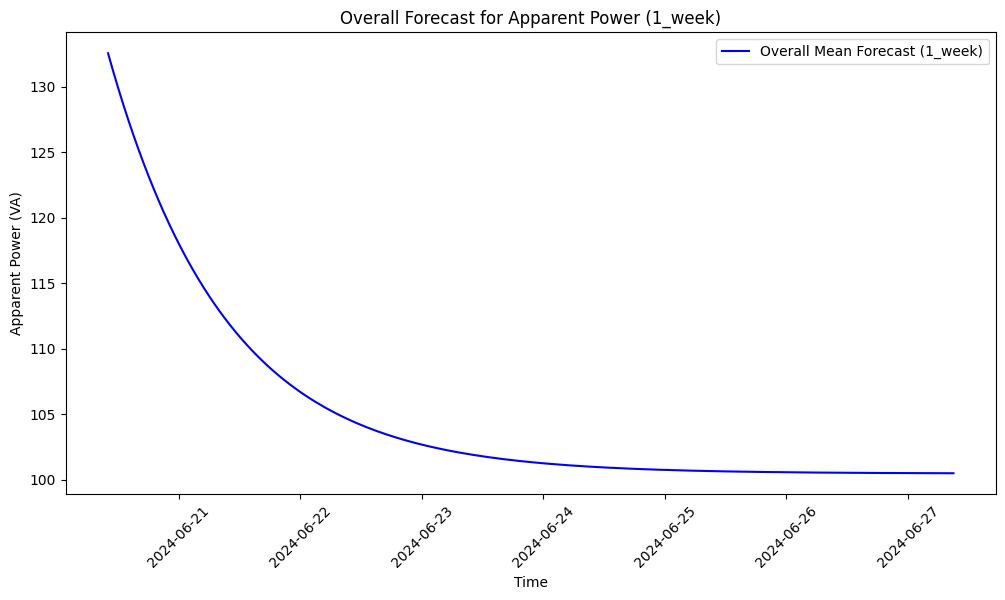


Forecasting for: 1_month


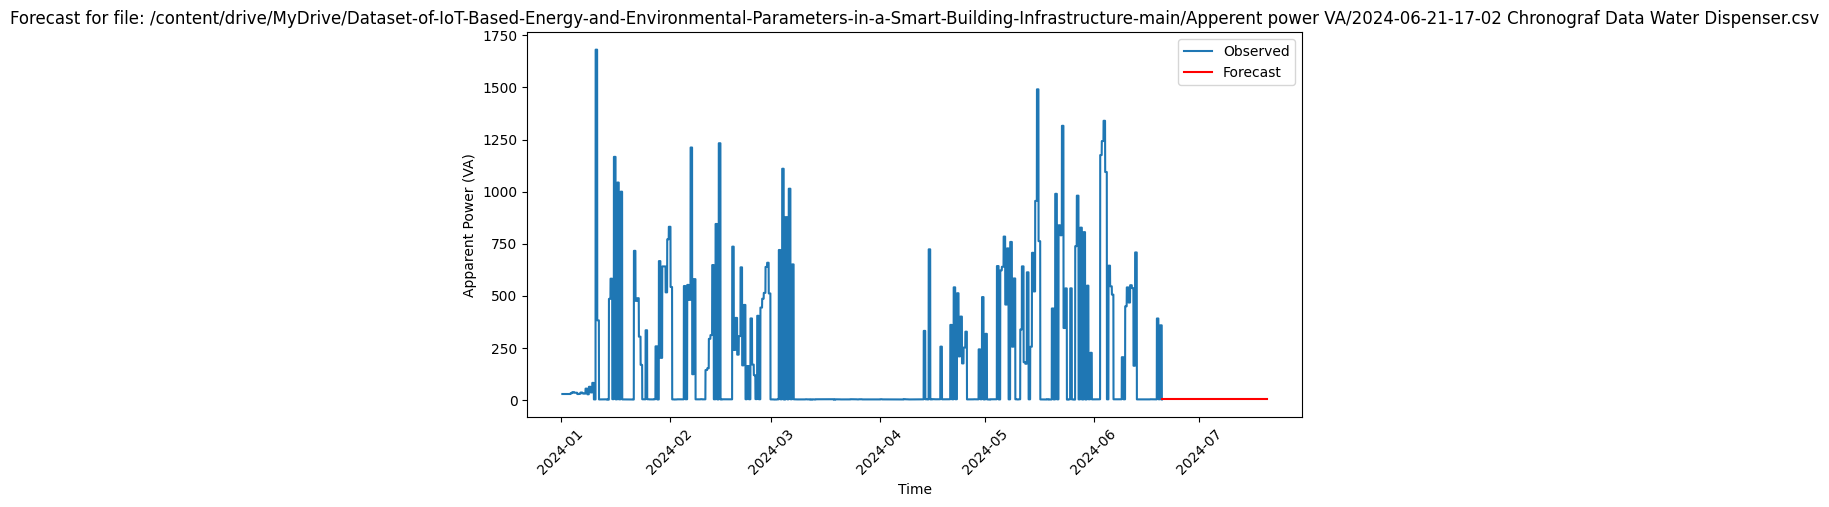

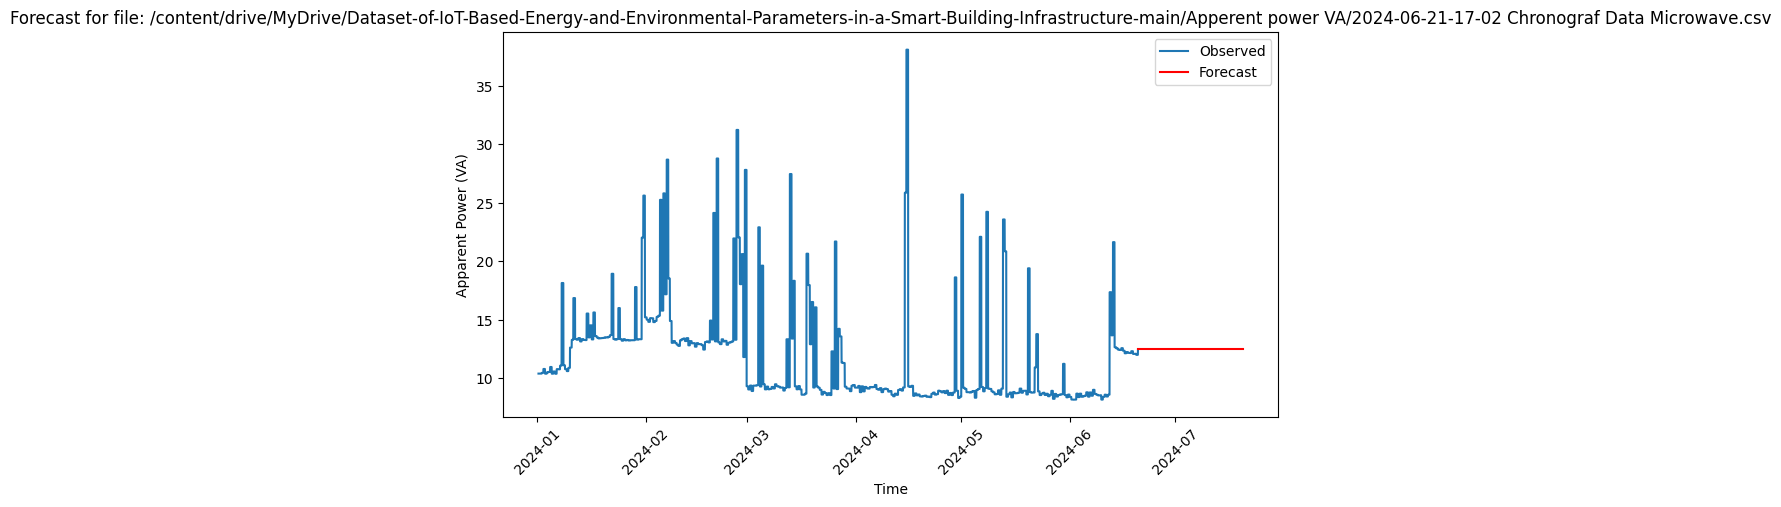

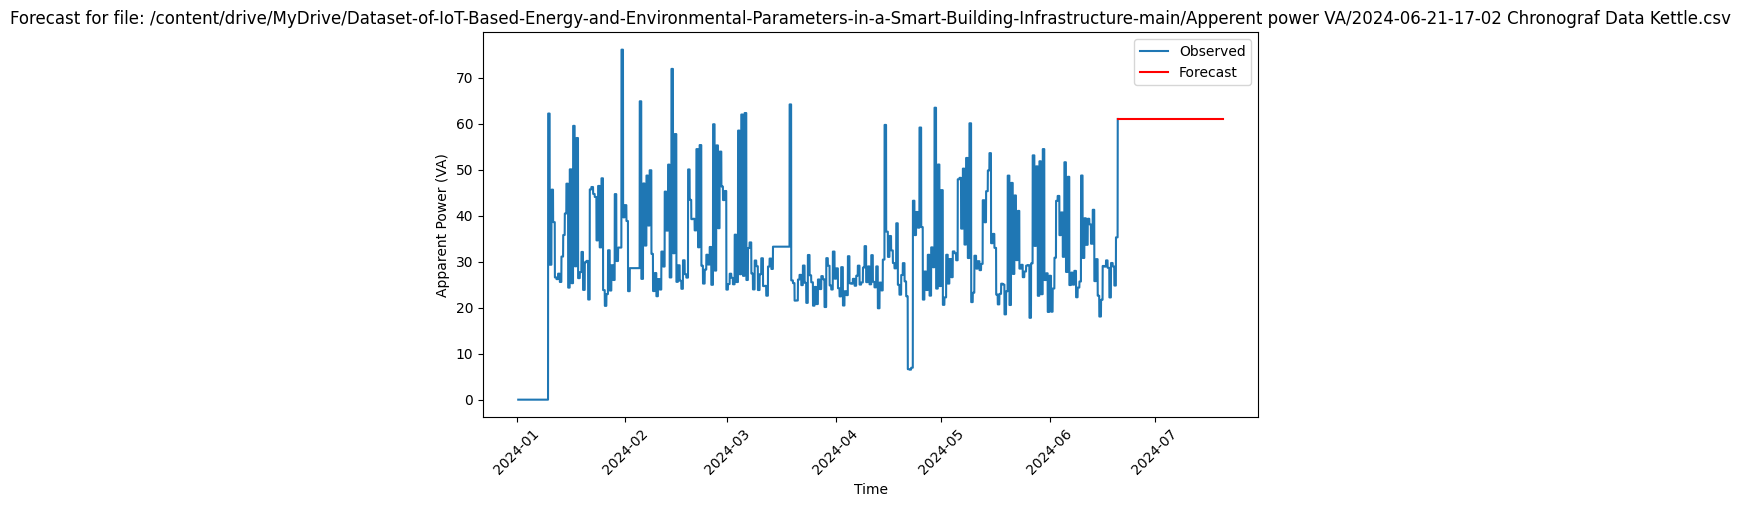

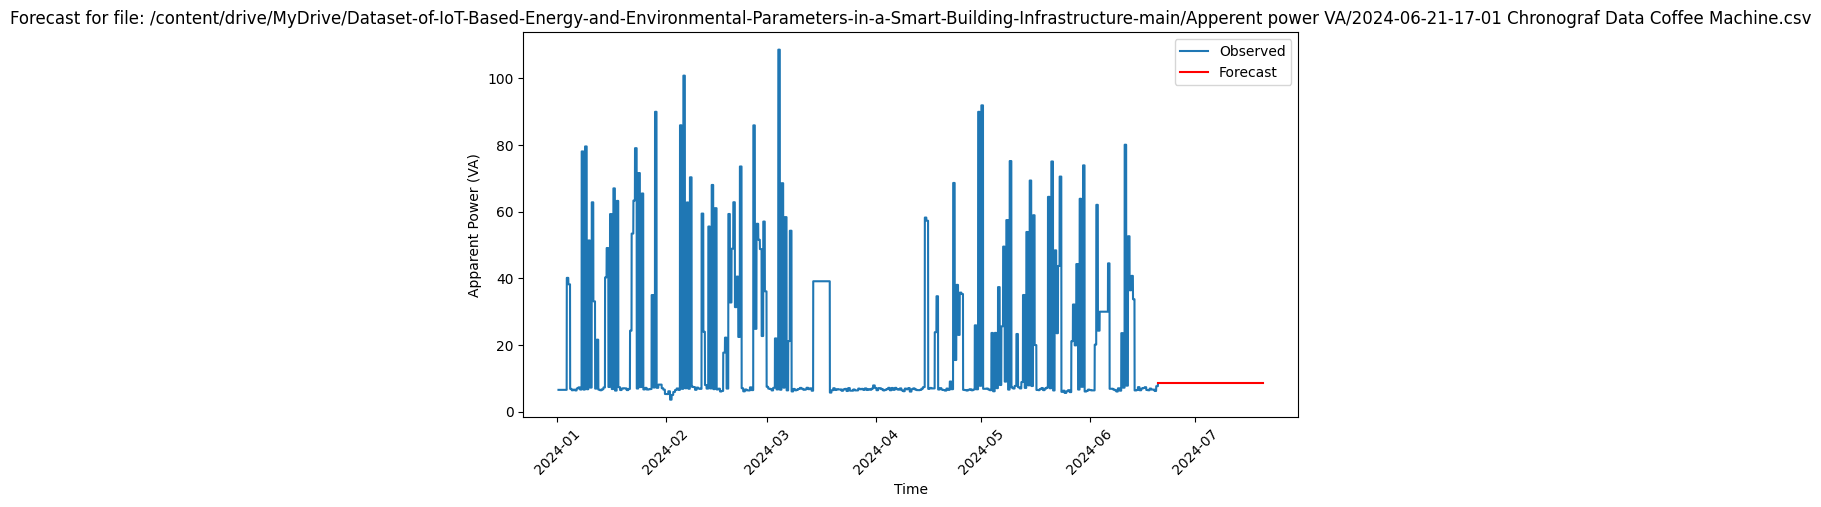

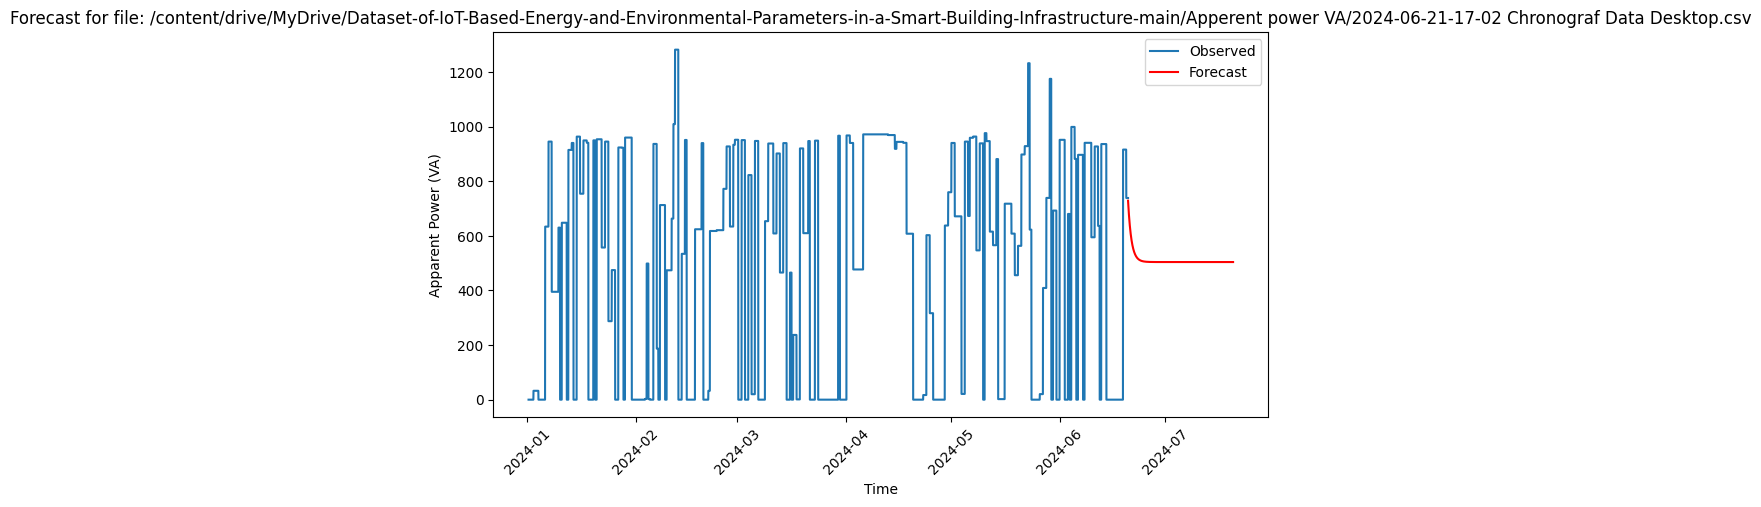

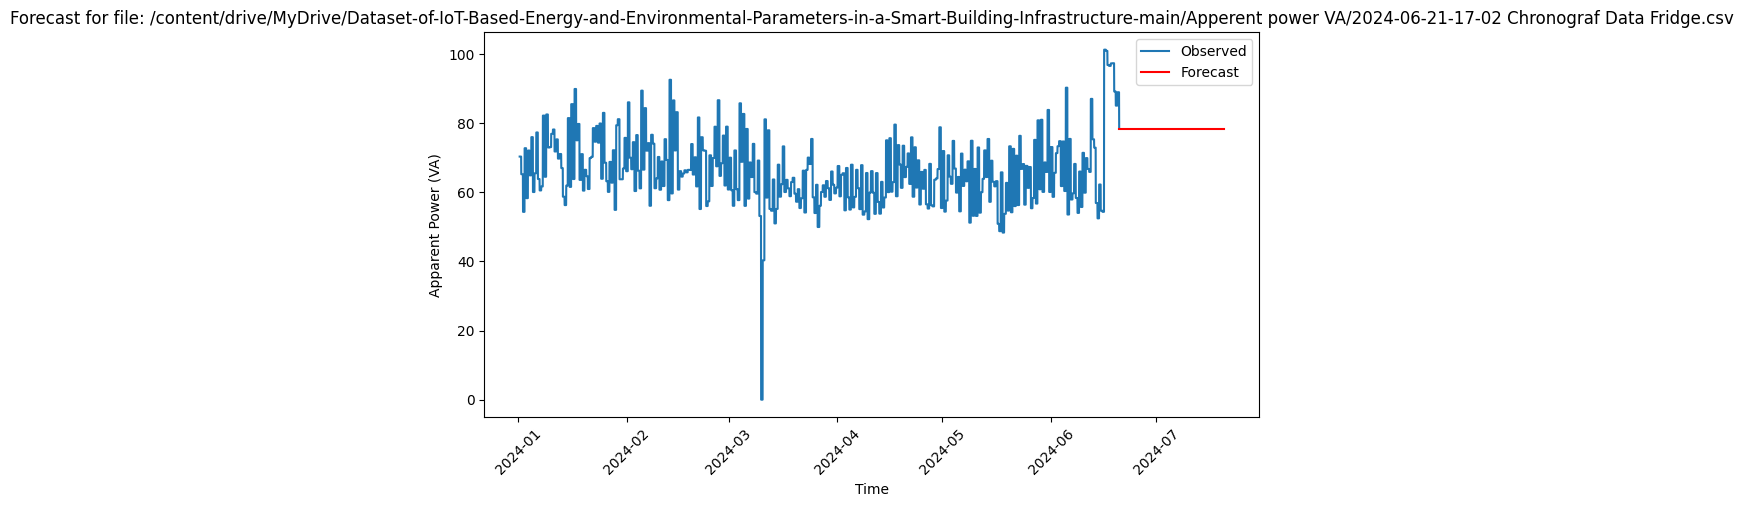

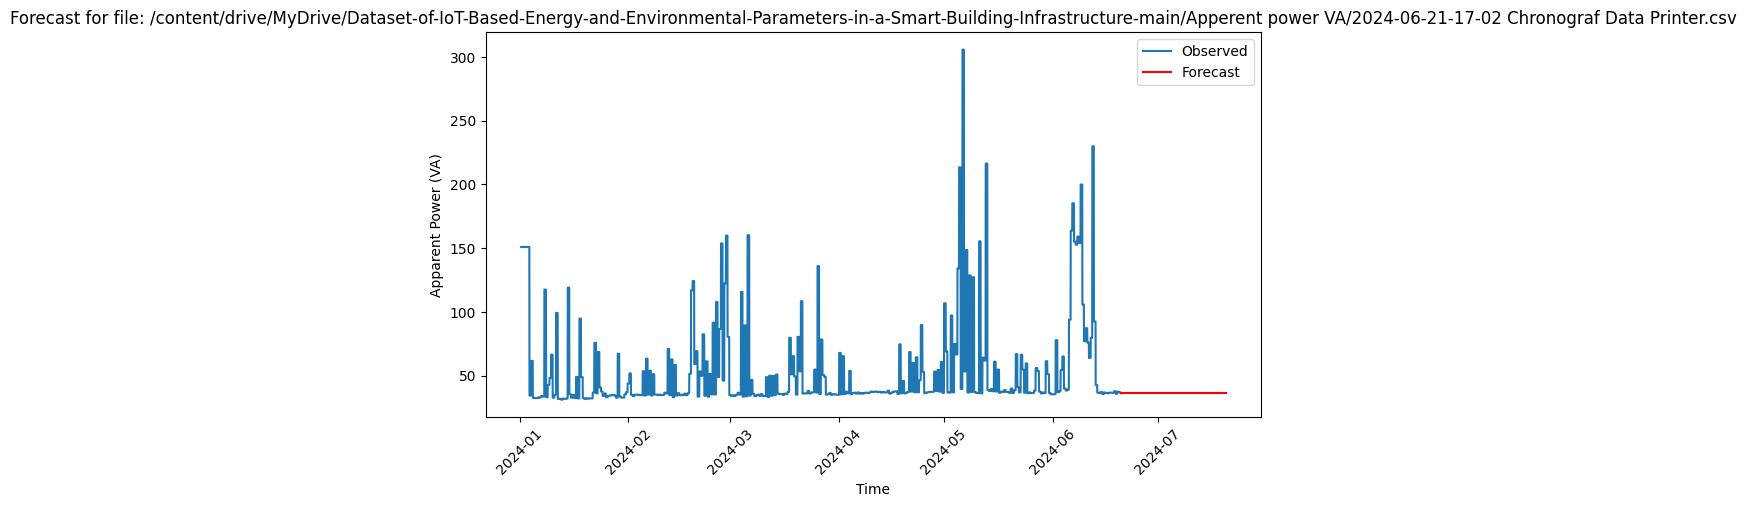

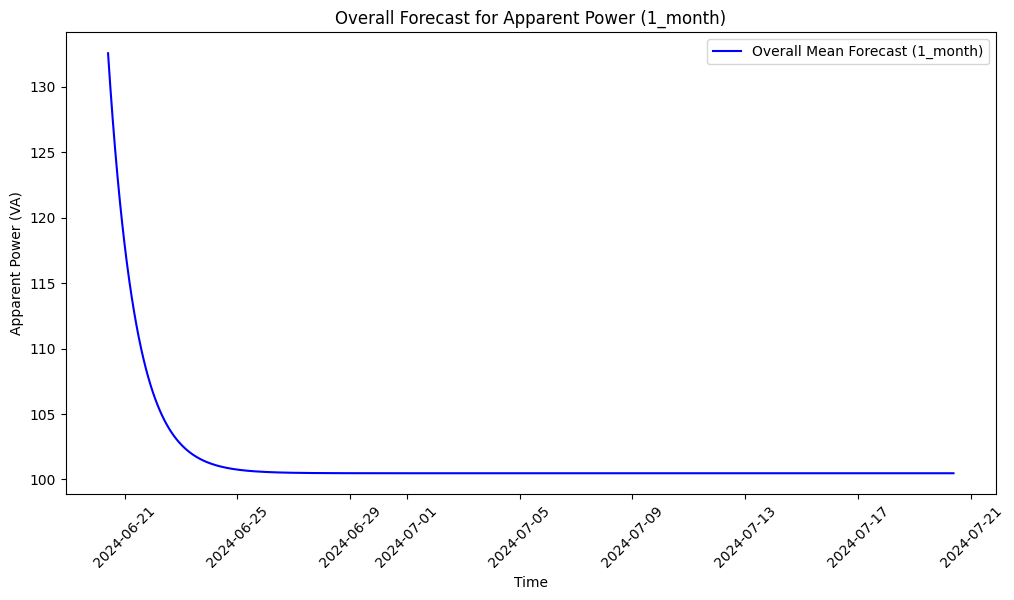


Forecasting for: 2_months


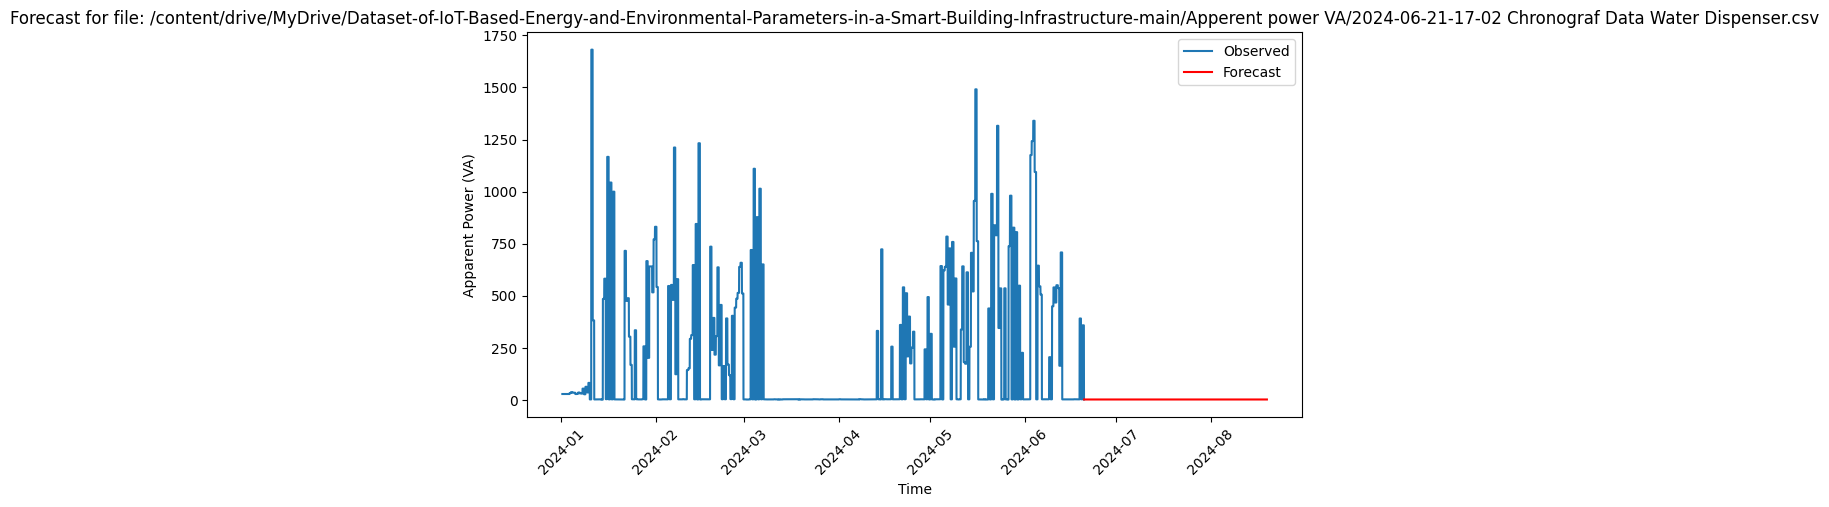

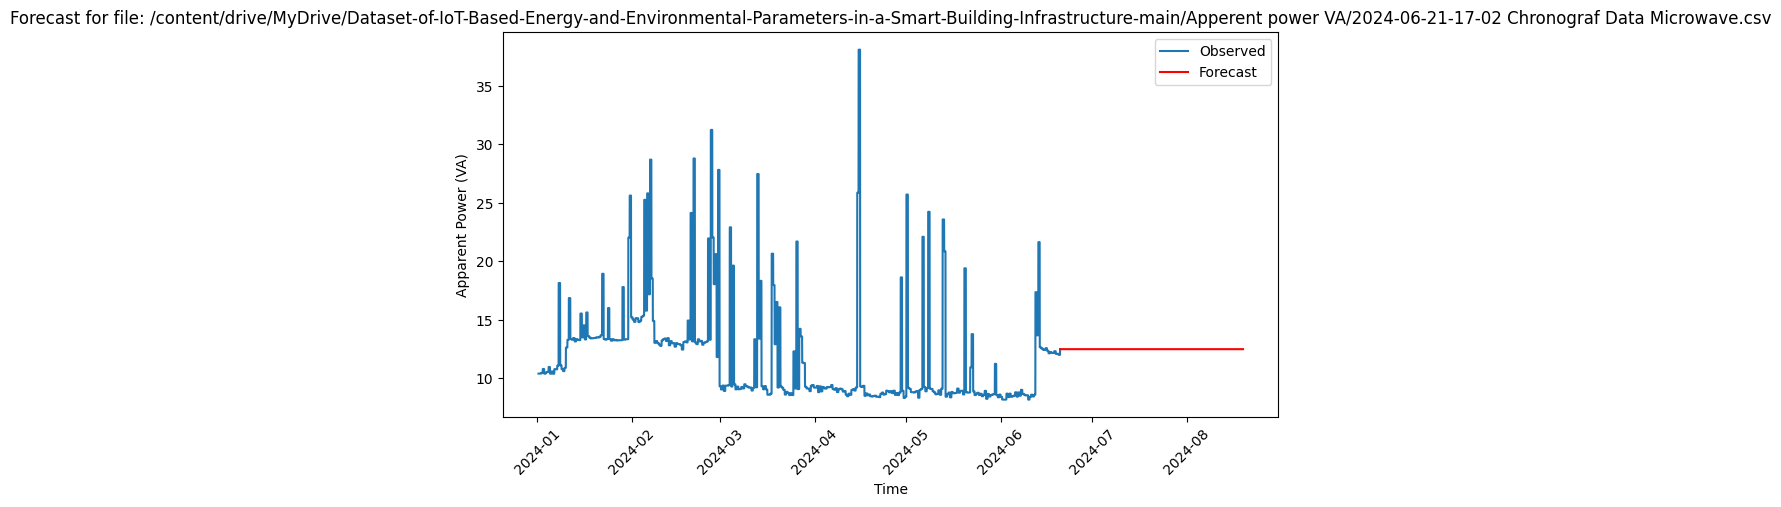

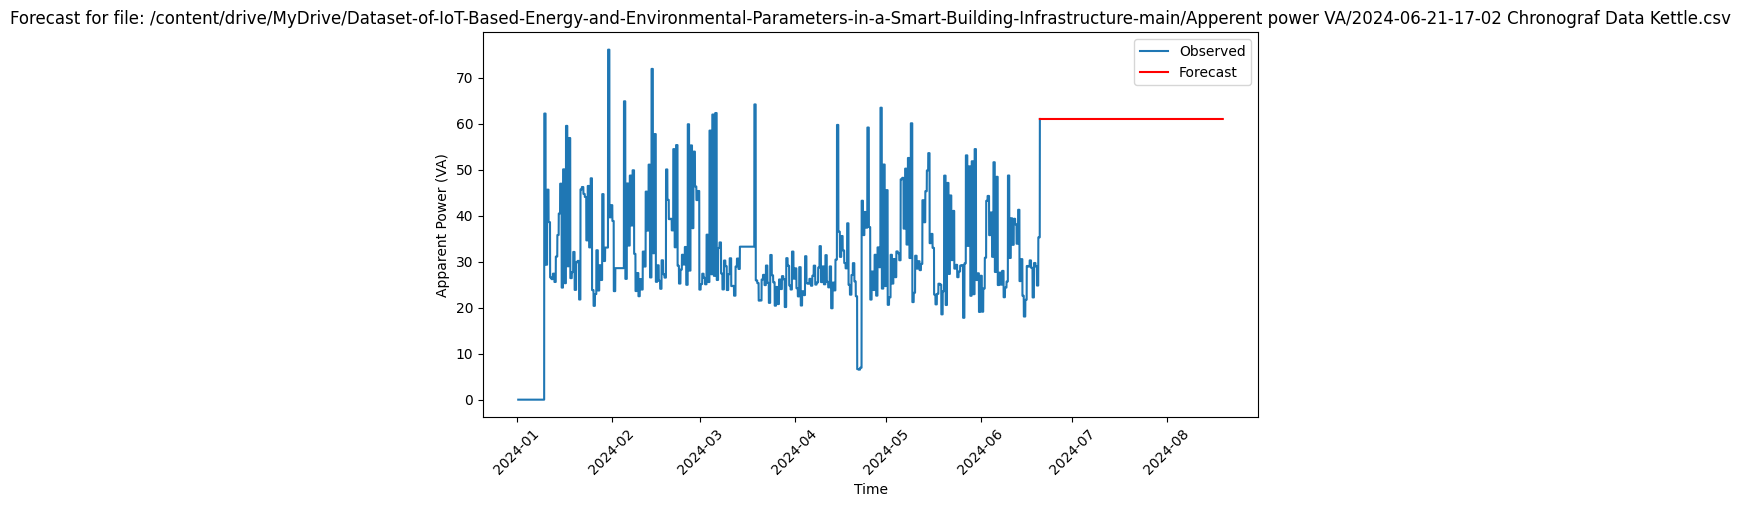

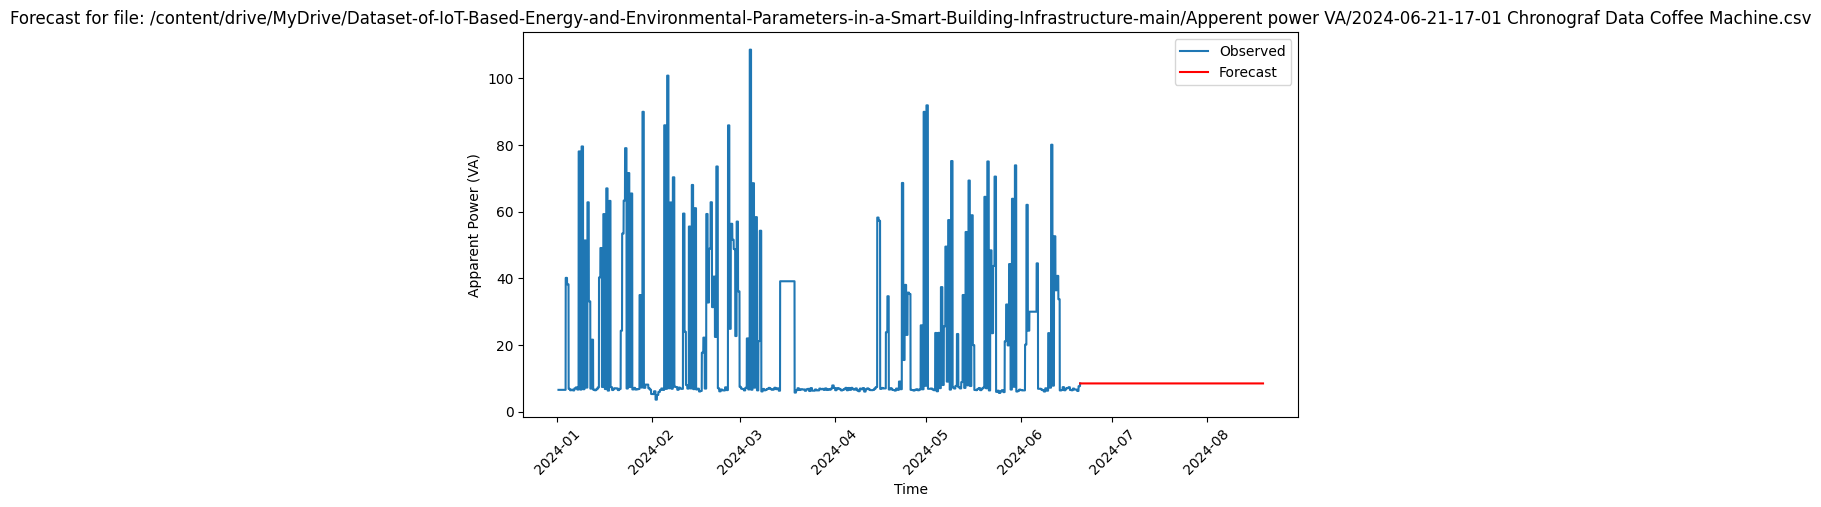

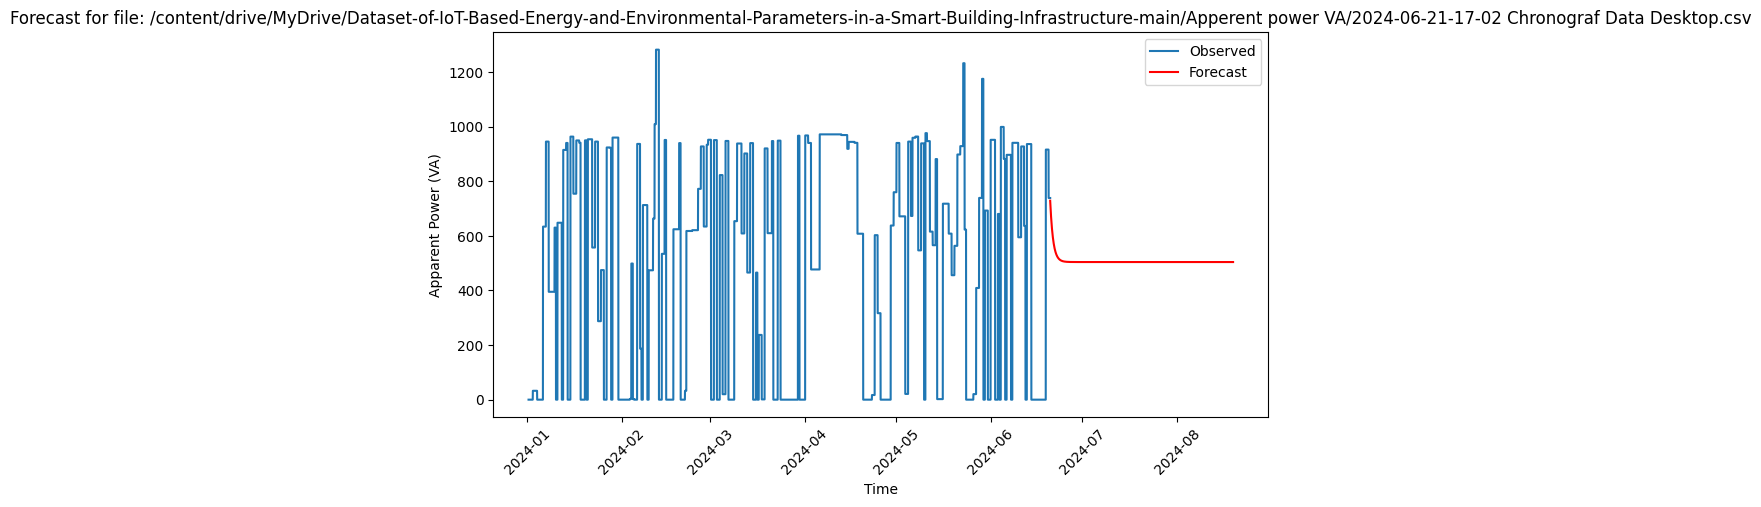

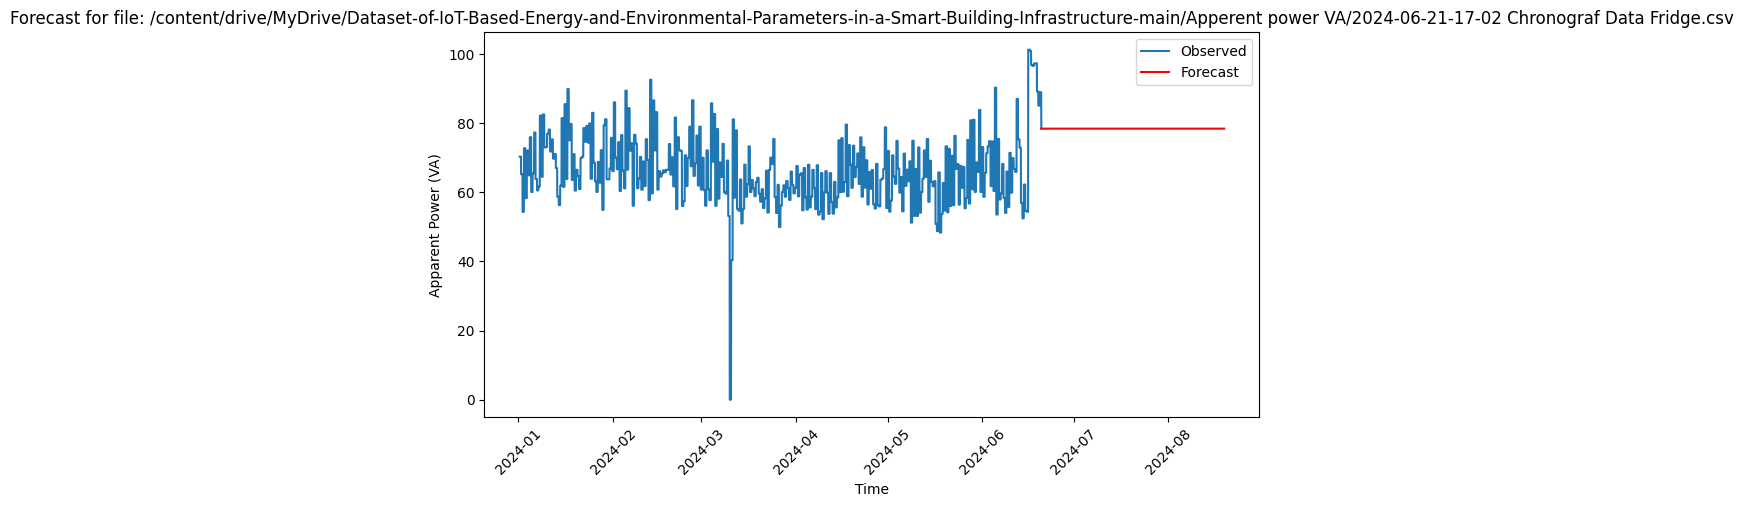

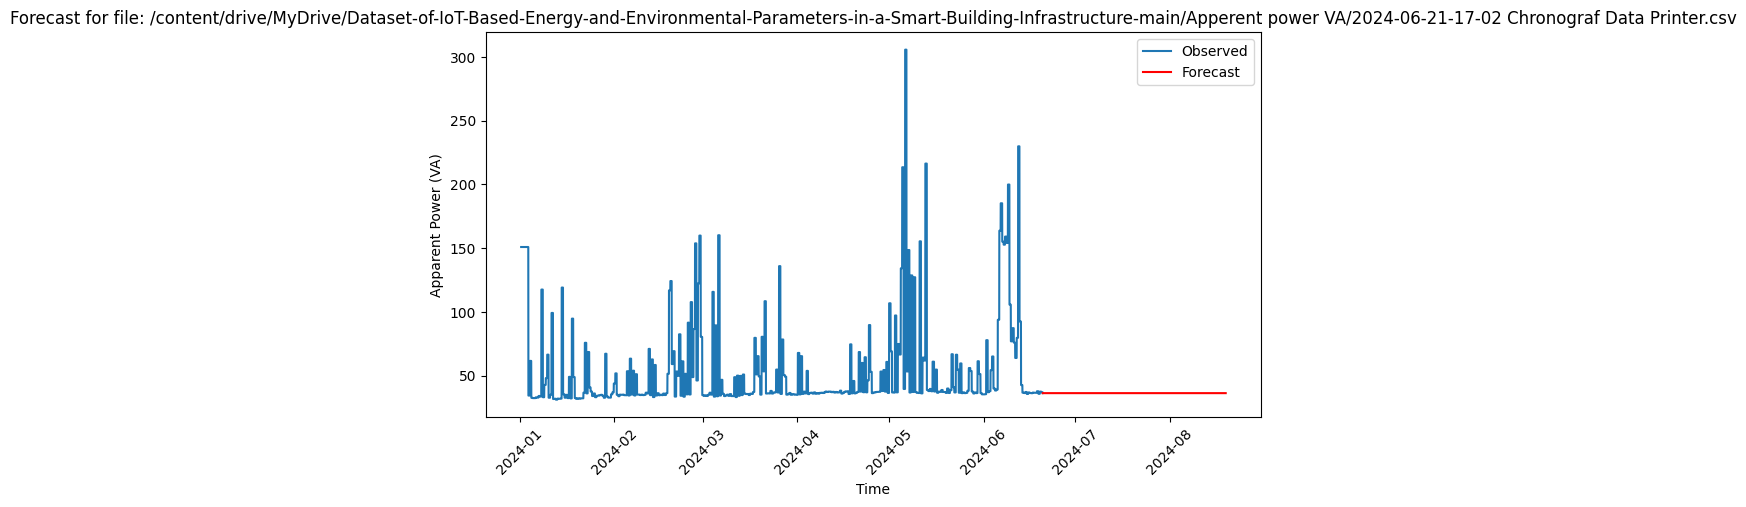

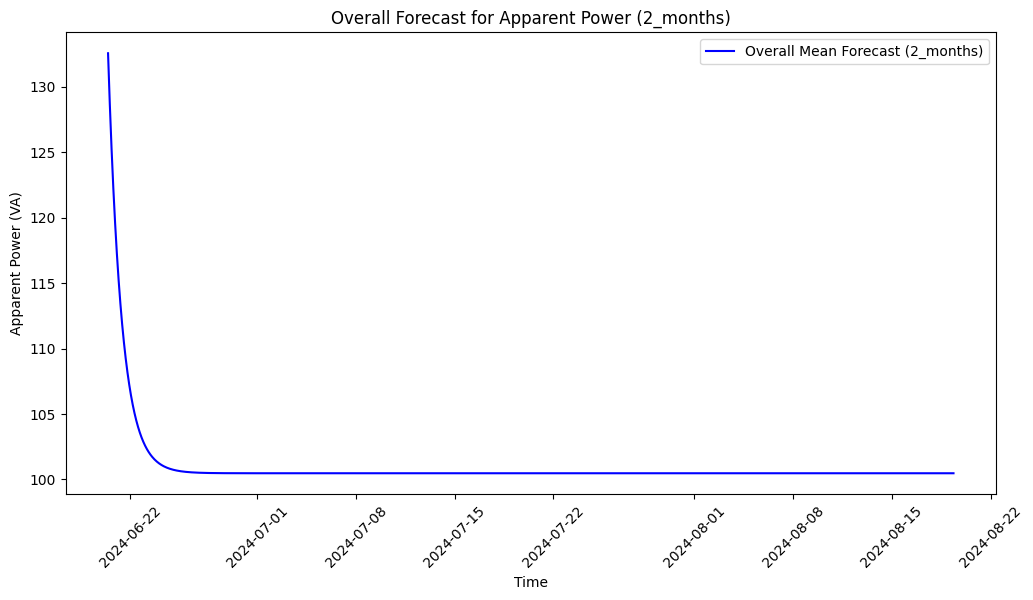


Forecasting for: 1_year


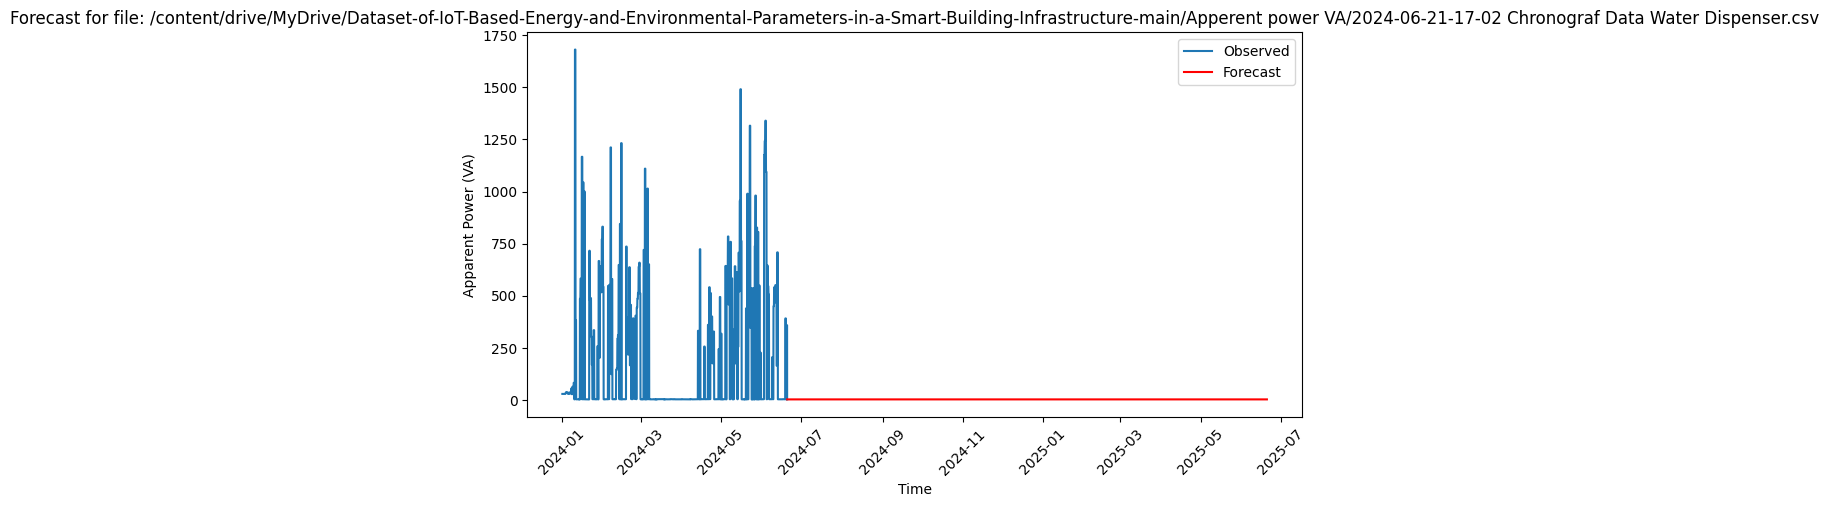

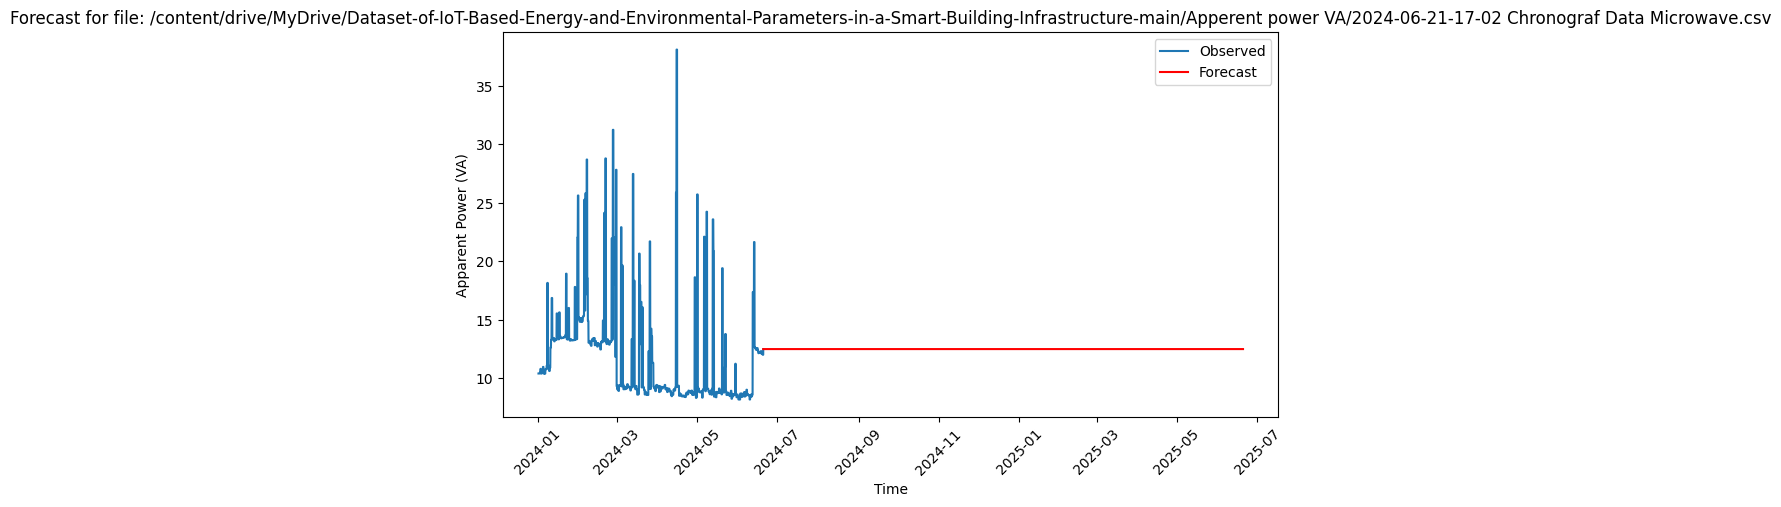

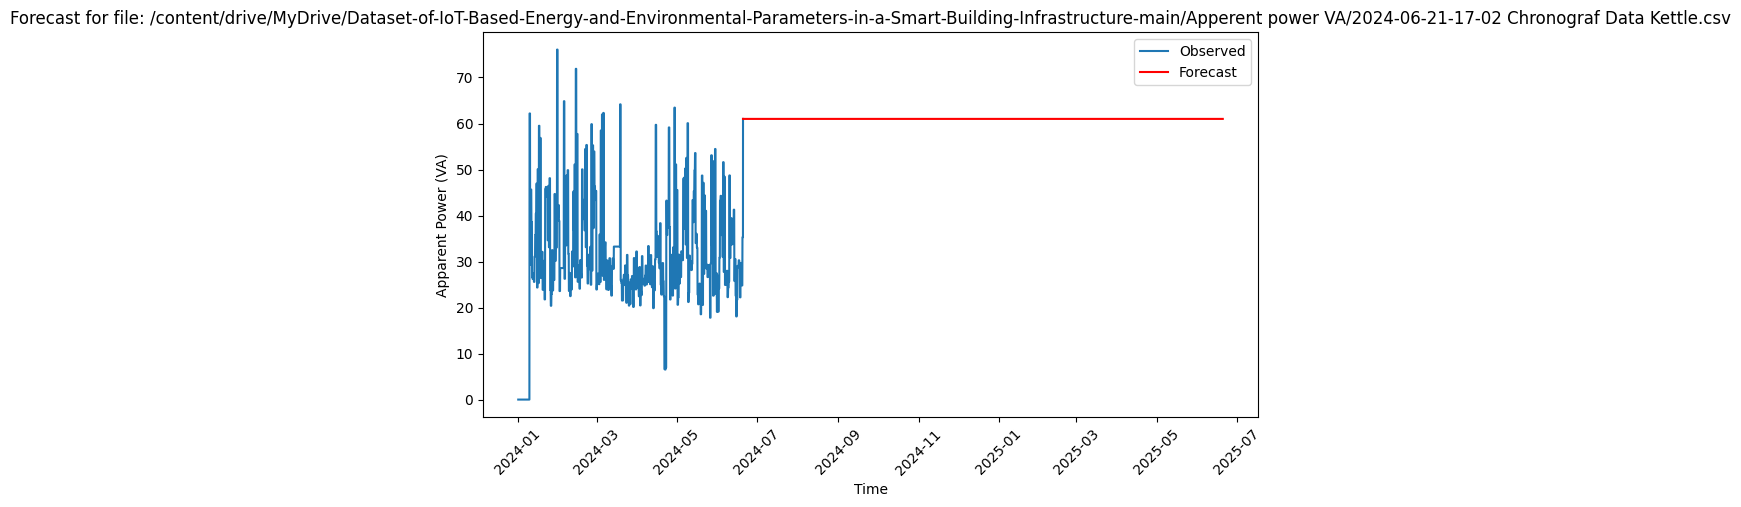

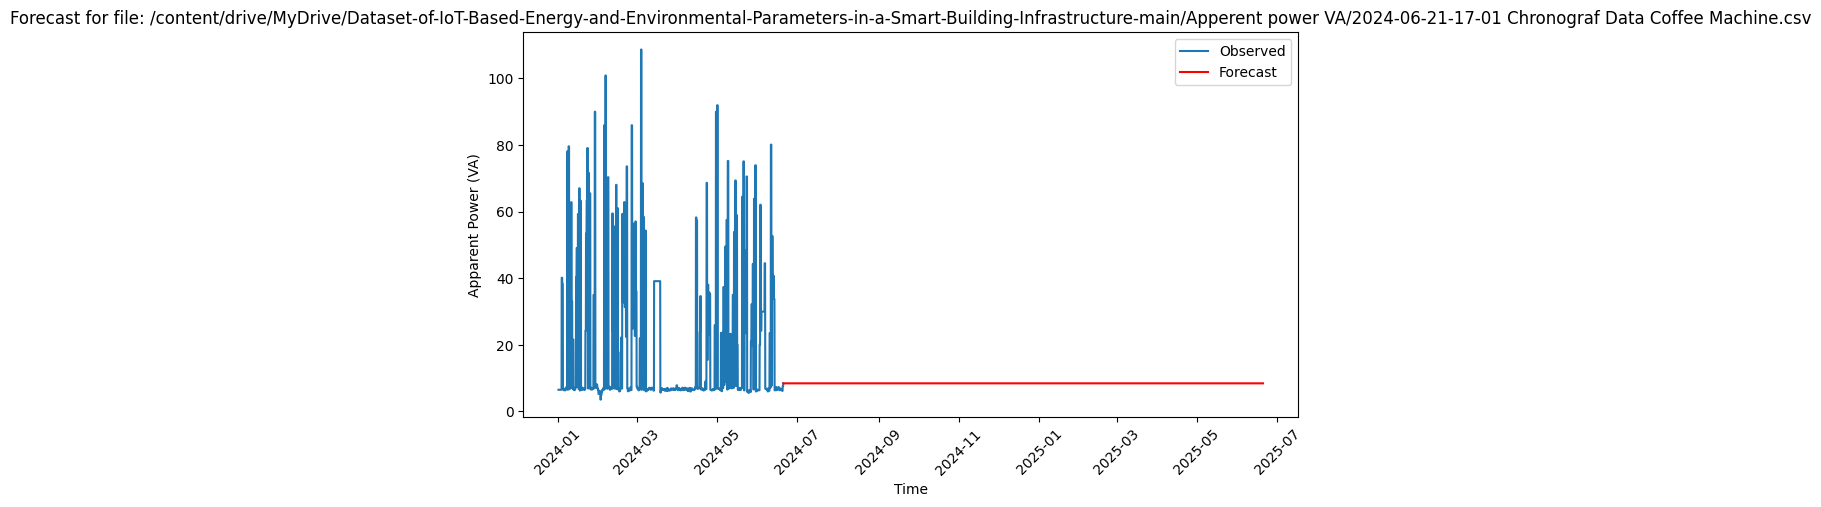

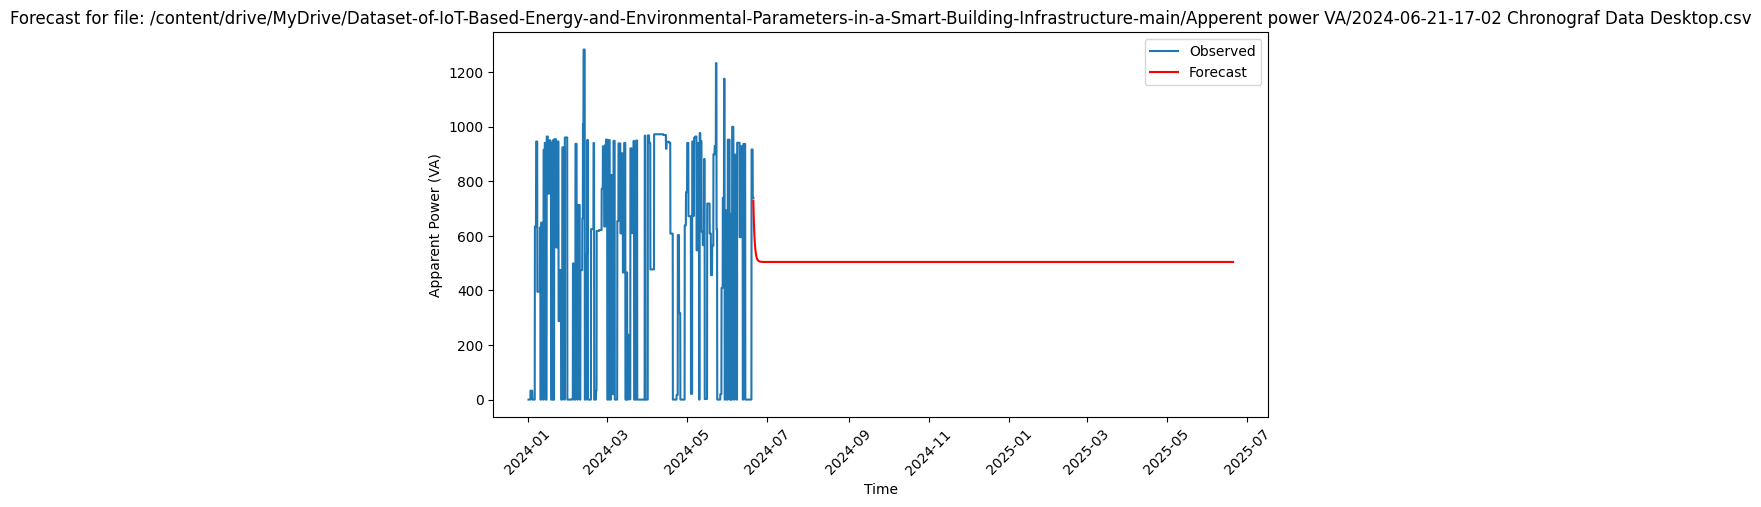

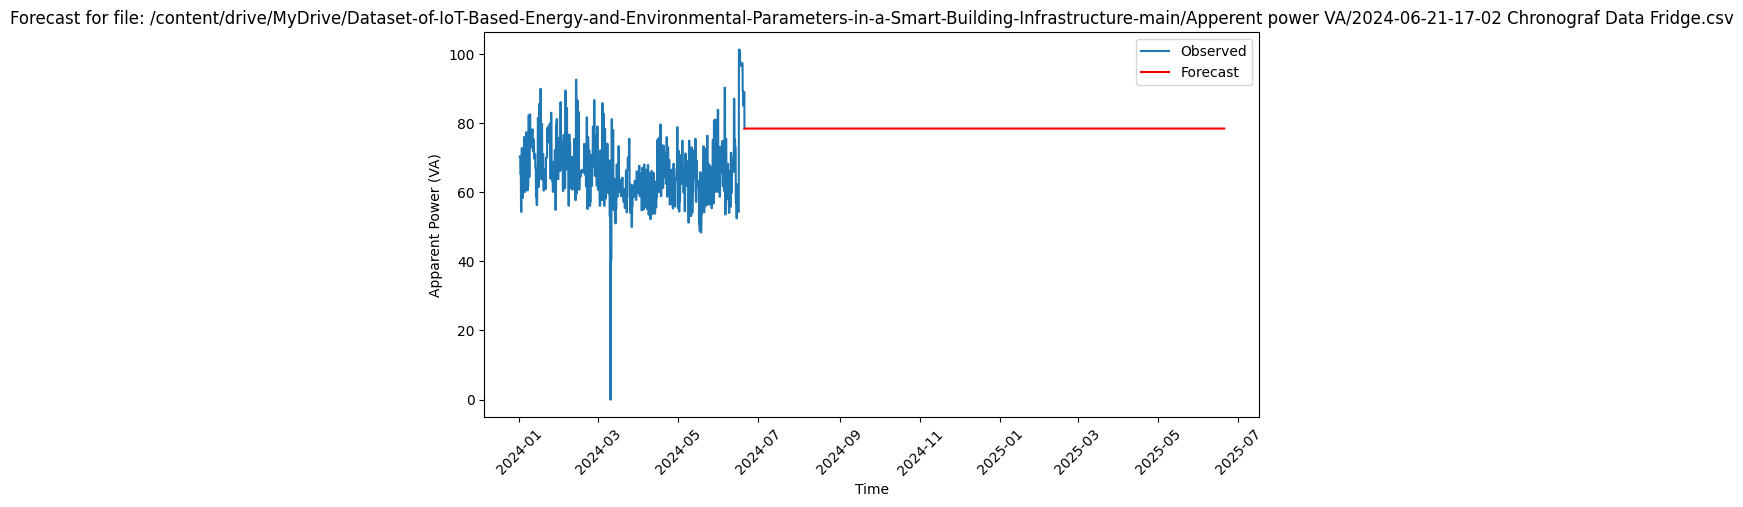

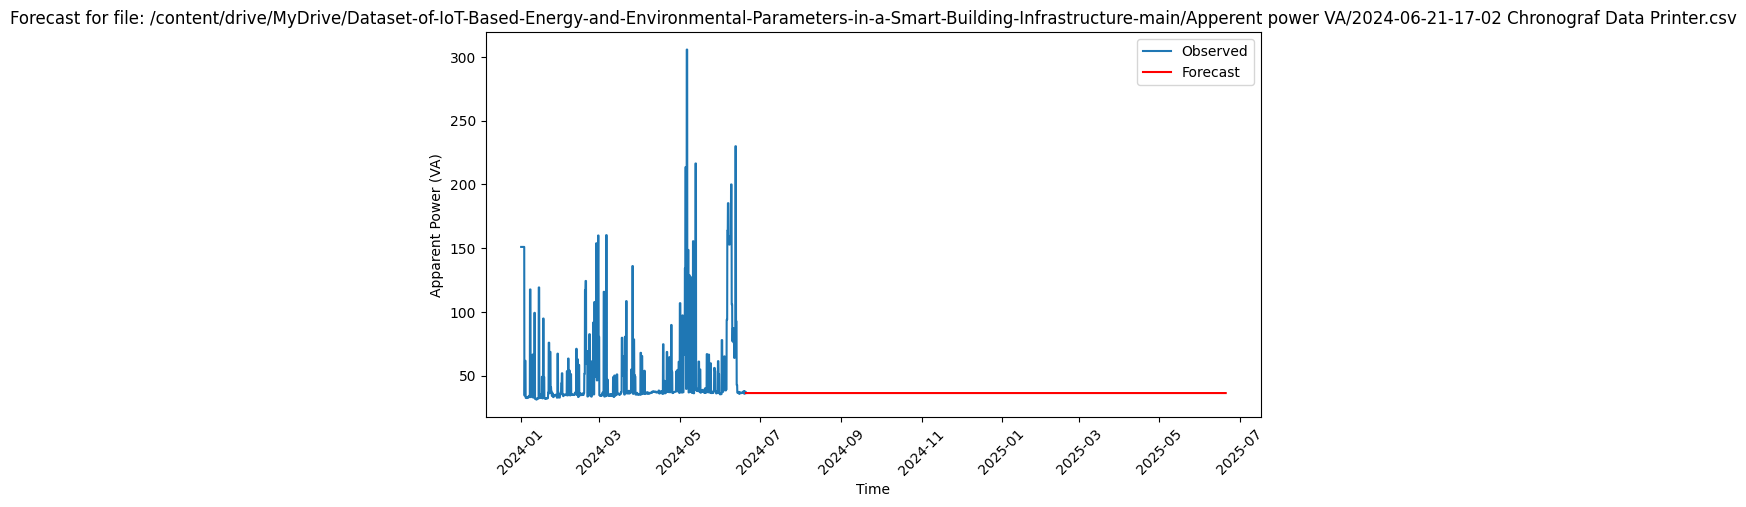

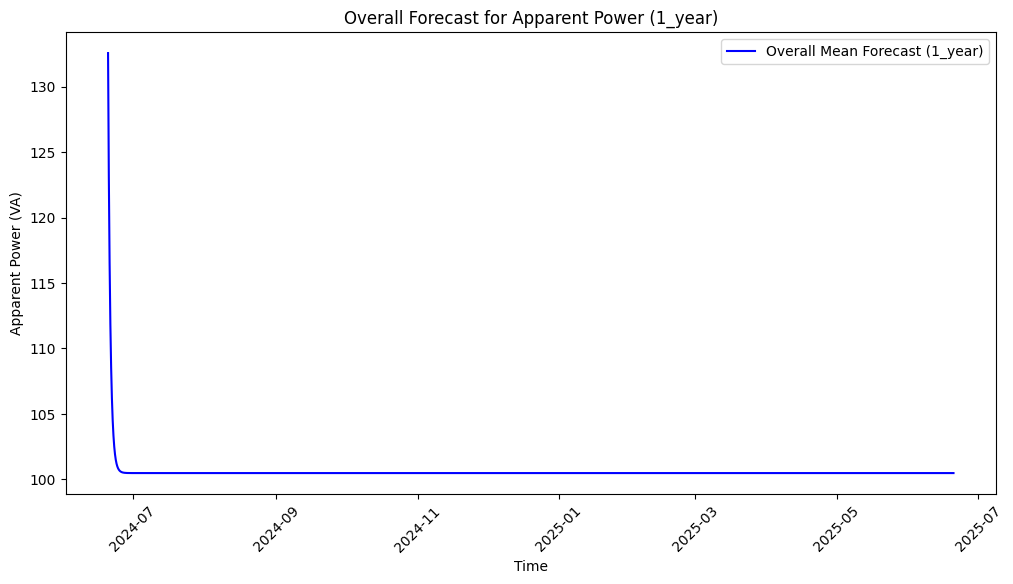

Extended forecasting complete. Results saved to CSV files.


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'

# Define paths for each subfolder with recursive search pattern
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)

print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")

# Function to preprocess and forecast for each file
def preprocess_and_forecast(file_list, forecast_steps):
    forecasts = []
    last_timestamp = None

    for file in file_list:
        # Load CSV file
        df = pd.read_csv(file)

        # Parse timestamp column
        if 'time' in df.columns:
            df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
        else:
            print(f"Timestamp column not found in file: {file}")
            continue

        # Set the timestamp as the index and sort the index
        df.set_index('time', inplace=True)
        df.sort_index(inplace=True)

        # Resample data to hourly frequency using lowercase 'h'
        df = df.resample('h').mean()

        # Handle missing values using forward-fill and backward-fill
        df['VA.mean_value'] = df['VA.mean_value'].ffill().bfill()

        # Check if the series has enough data points
        if len(df.dropna()) < 50:
            print(f"Insufficient data in file: {file}")
            continue

        # Check for stationarity using the ADF test
        adf_result = adfuller(df['VA.mean_value'].dropna())
        if adf_result[1] > 0.05:
            print(f"Data is not stationary for file: {file}. Applying differencing.")
            df['VA.mean_value'] = df['VA.mean_value'].diff().dropna()

        # Normalize the data
        data_mean = df['VA.mean_value'].mean()
        data_std = df['VA.mean_value'].std()
        df['VA.mean_value'] = (df['VA.mean_value'] - data_mean) / data_std

        # Update the last timestamp from the processed data
        last_timestamp = df.index[-1]

        # Use auto_arima for best parameter selection without trace output
        try:
            model = auto_arima(df['VA.mean_value'].dropna(), seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
            order = model.order

            # Fit ARIMA model
            arima_model = ARIMA(df['VA.mean_value'].dropna(), order=order)
            result = arima_model.fit()

            # Forecast the next steps
            forecast = result.forecast(steps=forecast_steps)

            # Inverse transform the forecast
            forecast = (forecast * data_std) + data_mean
            forecasts.append(forecast)

            # Create a new timestamp index for the forecast using lowercase 'h'
            forecast_index = pd.date_range(start=last_timestamp, periods=forecast_steps, freq='h')

            # Plot the forecast
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df['VA.mean_value'] * data_std + data_mean, label='Observed')
            plt.plot(forecast_index, forecast, label='Forecast', color='red')
            plt.title(f'Forecast for file: {file}')
            plt.xlabel('Time')
            plt.ylabel('Apparent Power (VA)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    return forecasts, last_timestamp

# Specify forecast steps for different periods
forecast_periods = {
    "24_hours": 24,
    "1_week": 24 * 7,
    "1_month": 24 * 30,
    "2_months": 24 * 60,
    "1_year": 24 * 365
}

# Run forecasts for each period
all_forecasts = {}
for period, steps in forecast_periods.items():
    print(f"\nForecasting for: {period}")
    forecasts, last_timestamp = preprocess_and_forecast(apparent_power_files, forecast_steps=steps)
    all_forecasts[period] = pd.DataFrame(forecasts).T
    all_forecasts[period].columns = [f'Forecast_{i+1}' for i in range(len(forecasts))]

    # Calculate the overall mean forecast
    overall_forecast = all_forecasts[period].mean(axis=1)

    # Create a dynamic time index based on the last timestamp in the data
    if last_timestamp is not None:
        forecast_index = pd.date_range(start=last_timestamp, periods=steps, freq='h')

        # Plot the overall forecast
        plt.figure(figsize=(12, 6))
        plt.plot(forecast_index, overall_forecast, label=f'Overall Mean Forecast ({period})', color='blue')
        plt.title(f'Overall Forecast for Apparent Power ({period})')
        plt.xlabel('Time')
        plt.ylabel('Apparent Power (VA)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

        # Save the results to CSV files
        all_forecasts[period].to_csv(f'individual_forecasts_{period}.csv', index=False)
        overall_forecast.to_csv(f'overall_forecast_{period}.csv', index=False)

print("Extended forecasting complete. Results saved to CSV files.")


ARIMA

Found 7 Apparent Power CSV files.

Forecasting and evaluating for: 24_hours


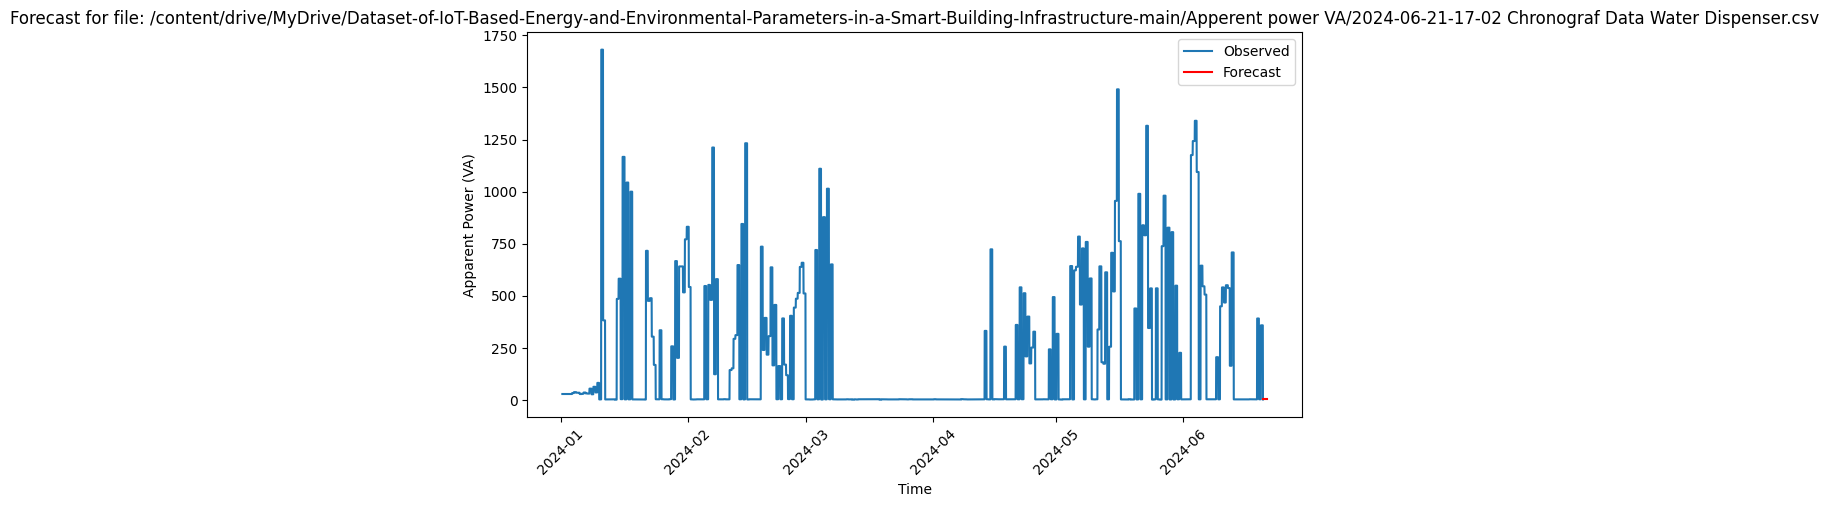

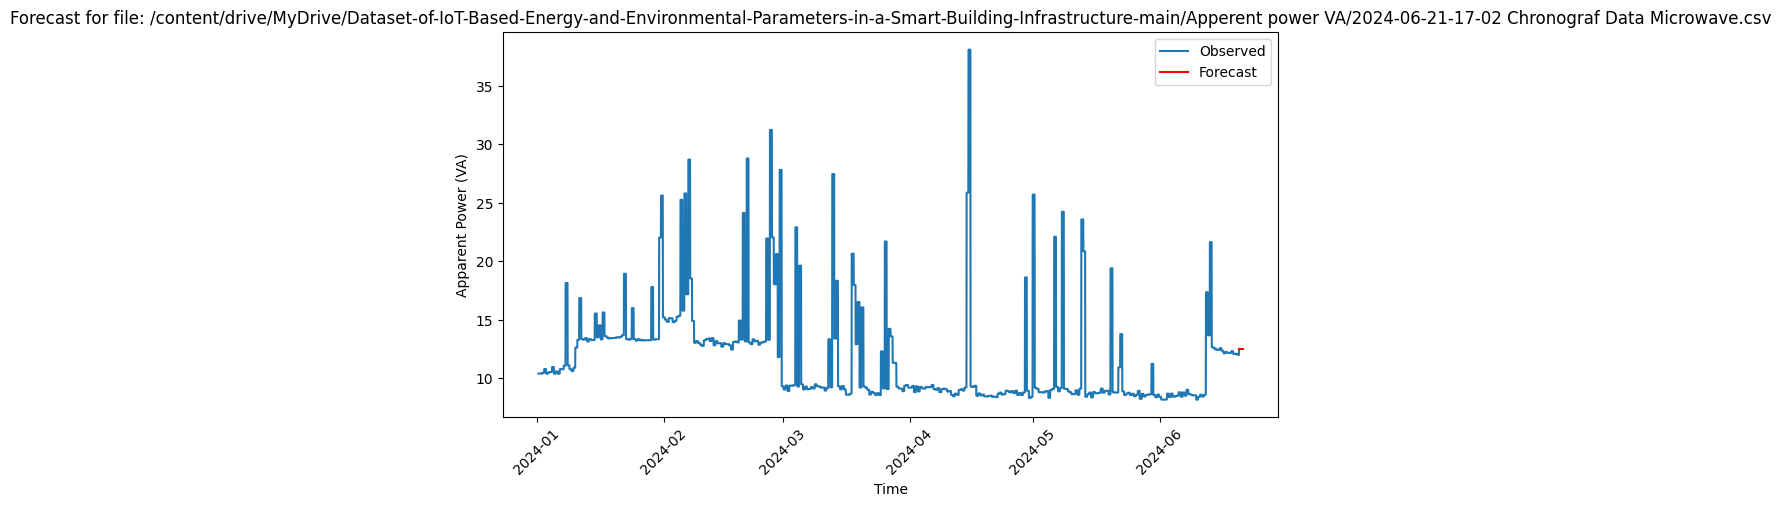

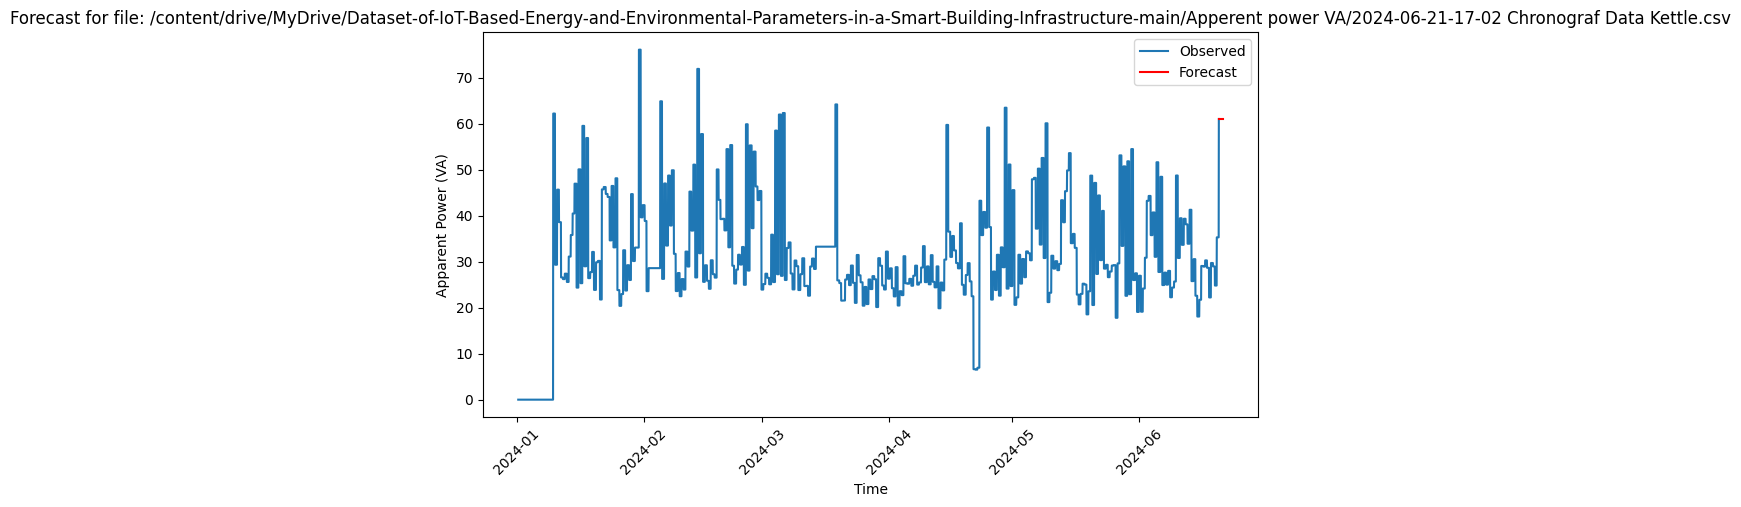

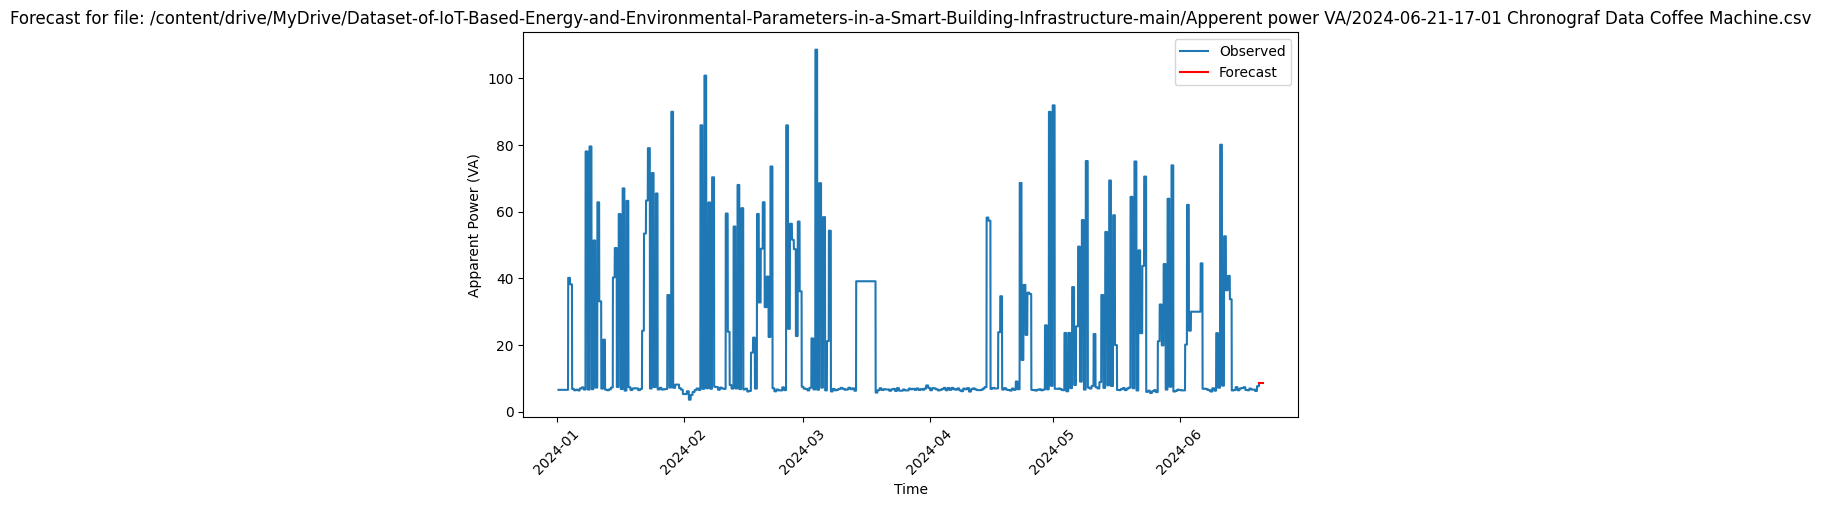

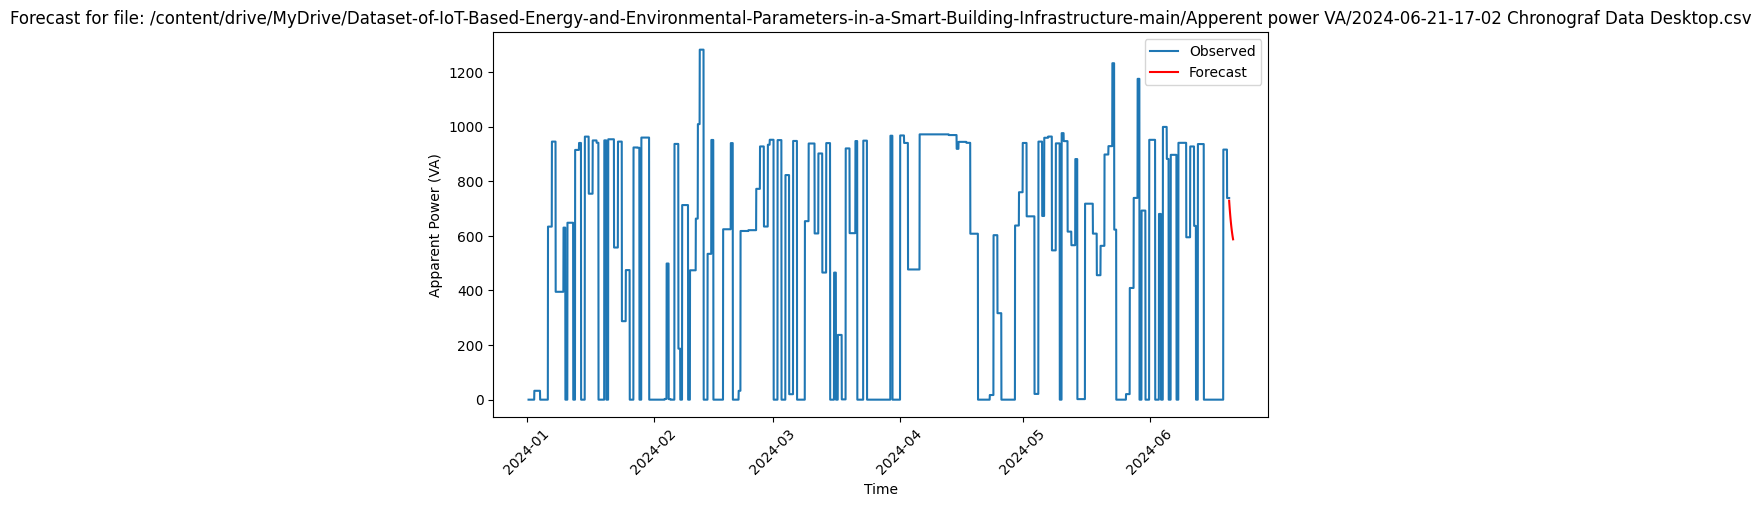

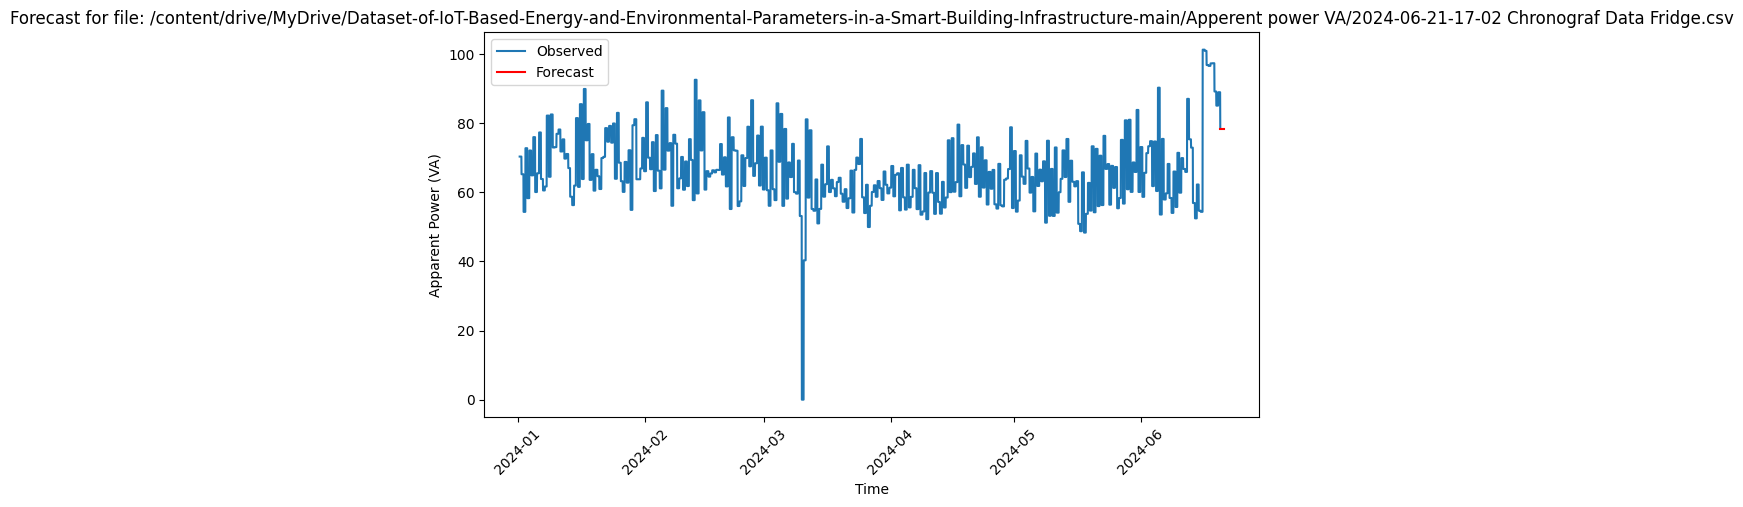

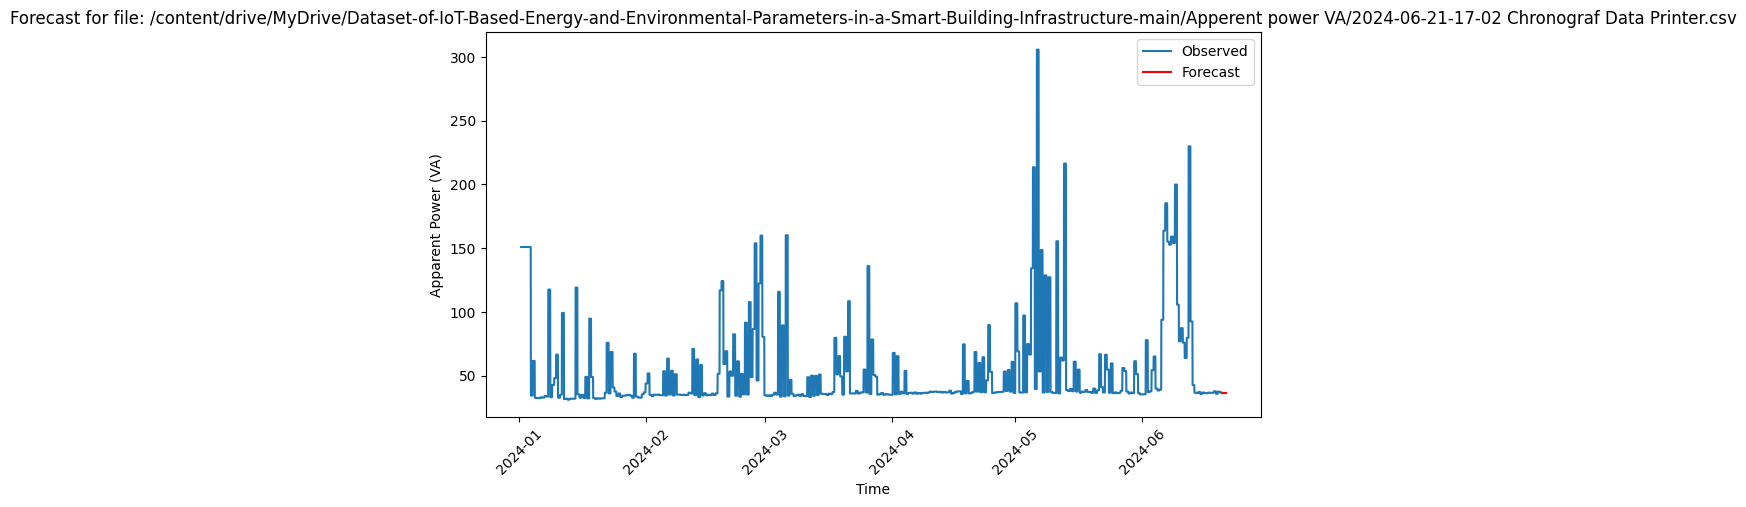

Evaluation metrics for 24_hours:
                                                file         MAE        RMSE  \
0  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  178.397156  251.680319   
1  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    0.423236    0.434702   
2  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   29.451560   30.517801   
3  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    1.450593    1.640596   
4  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  172.980643  181.817513   
5  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    8.317864    8.705421   
6  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    0.860801    0.919262   

   MAPE  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  

Forecasting and evaluating for: 1_week


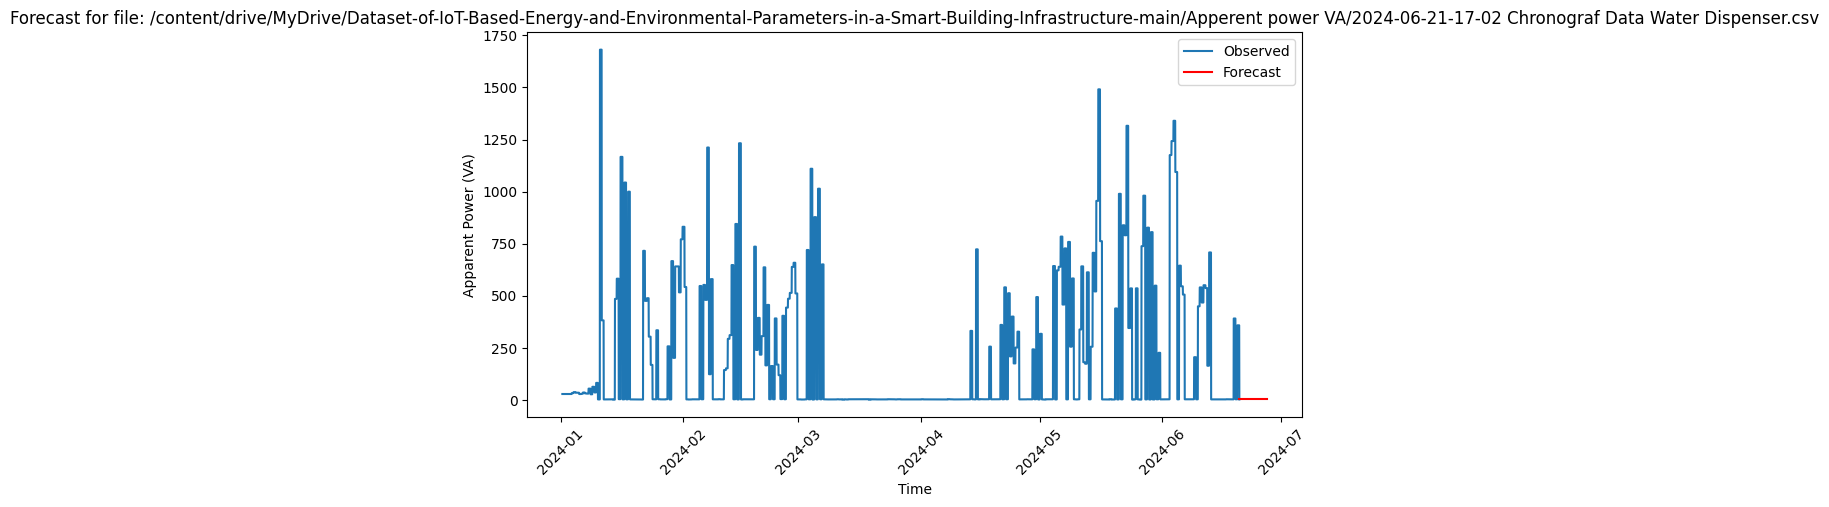

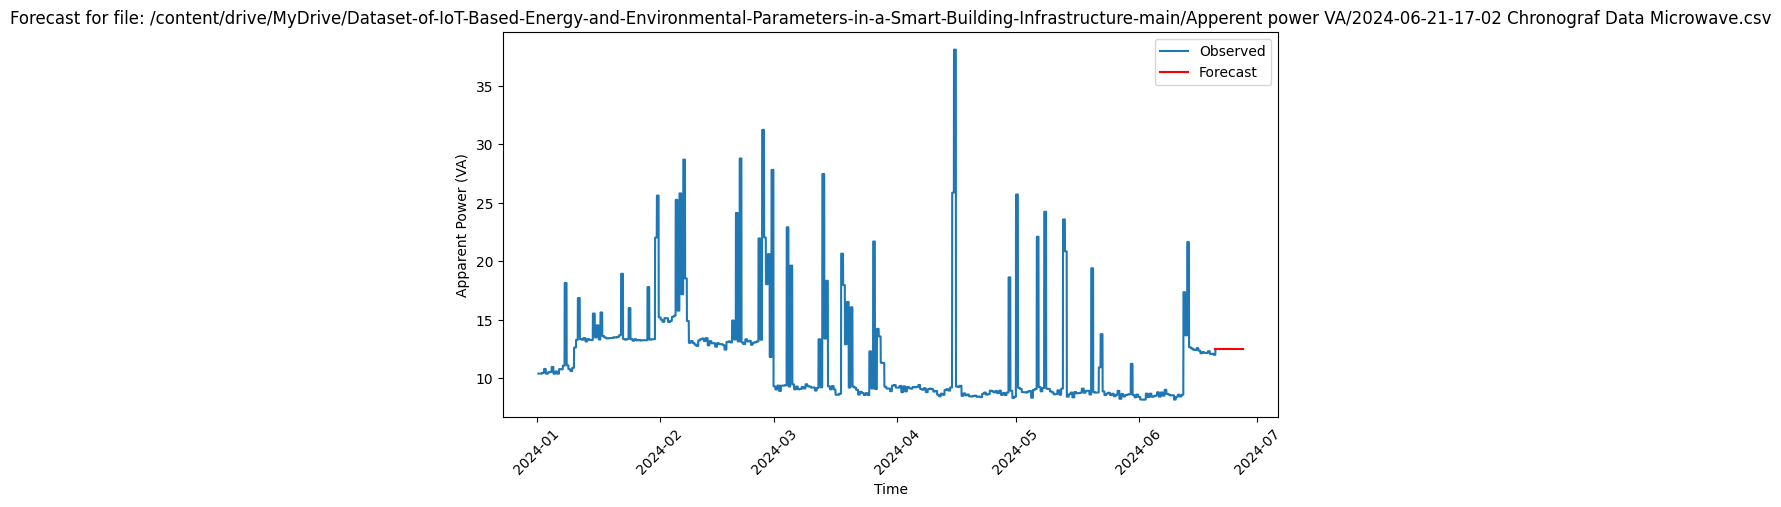

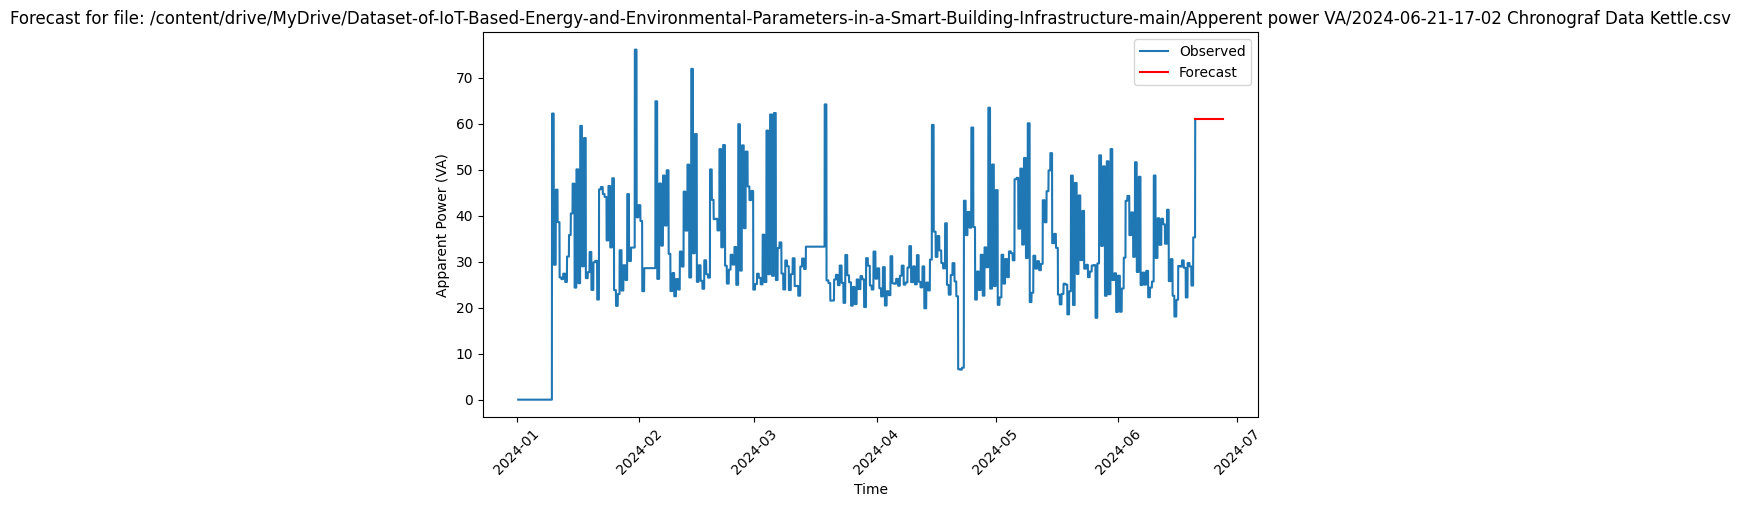

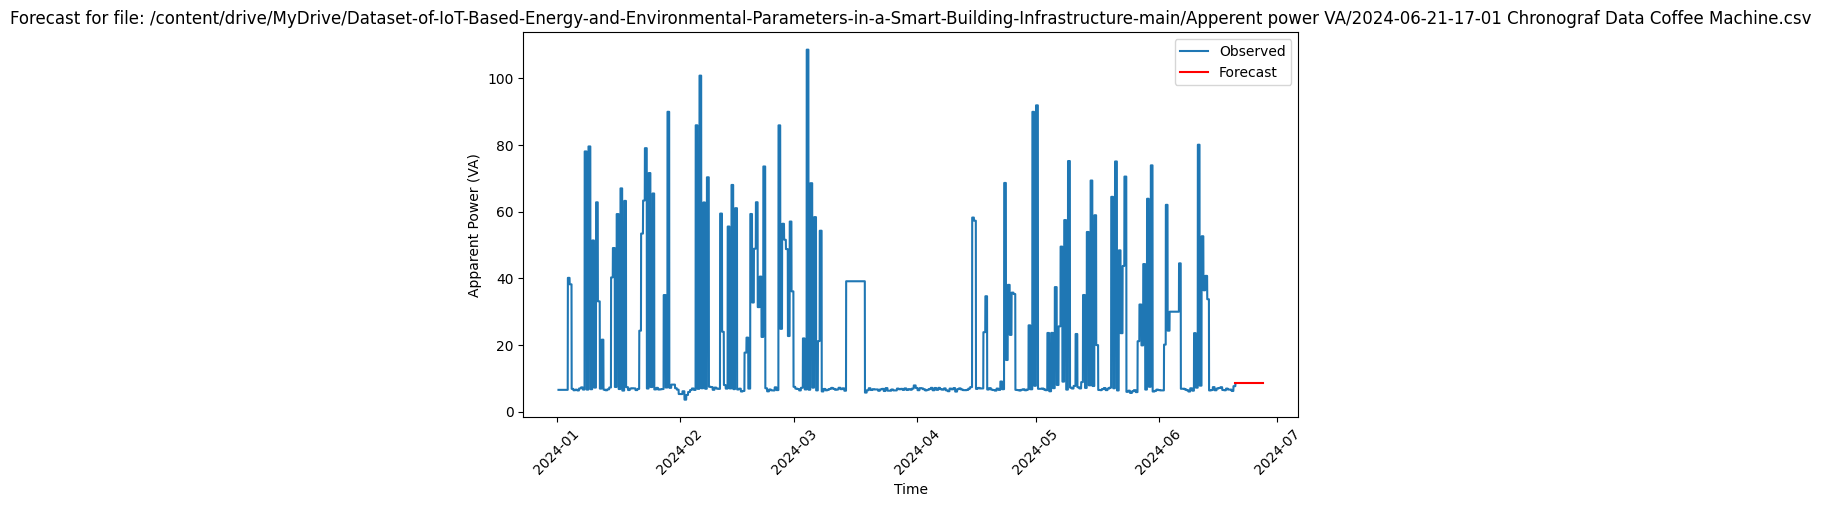

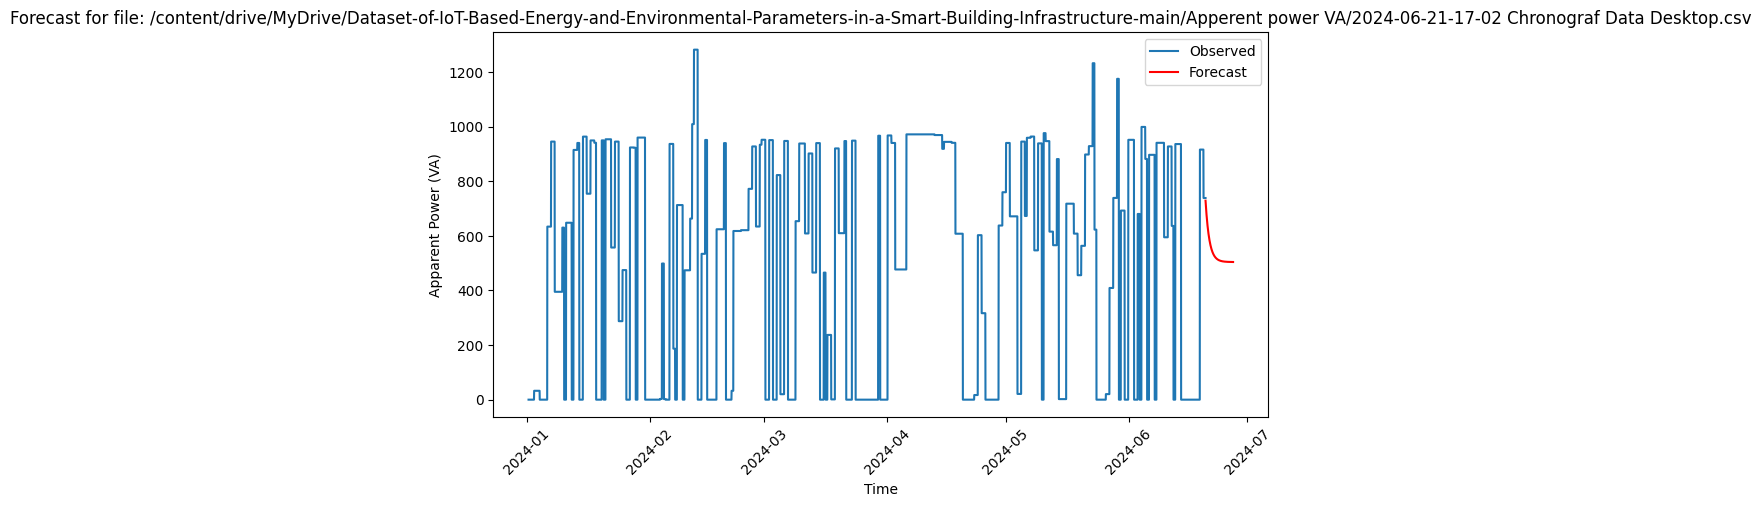

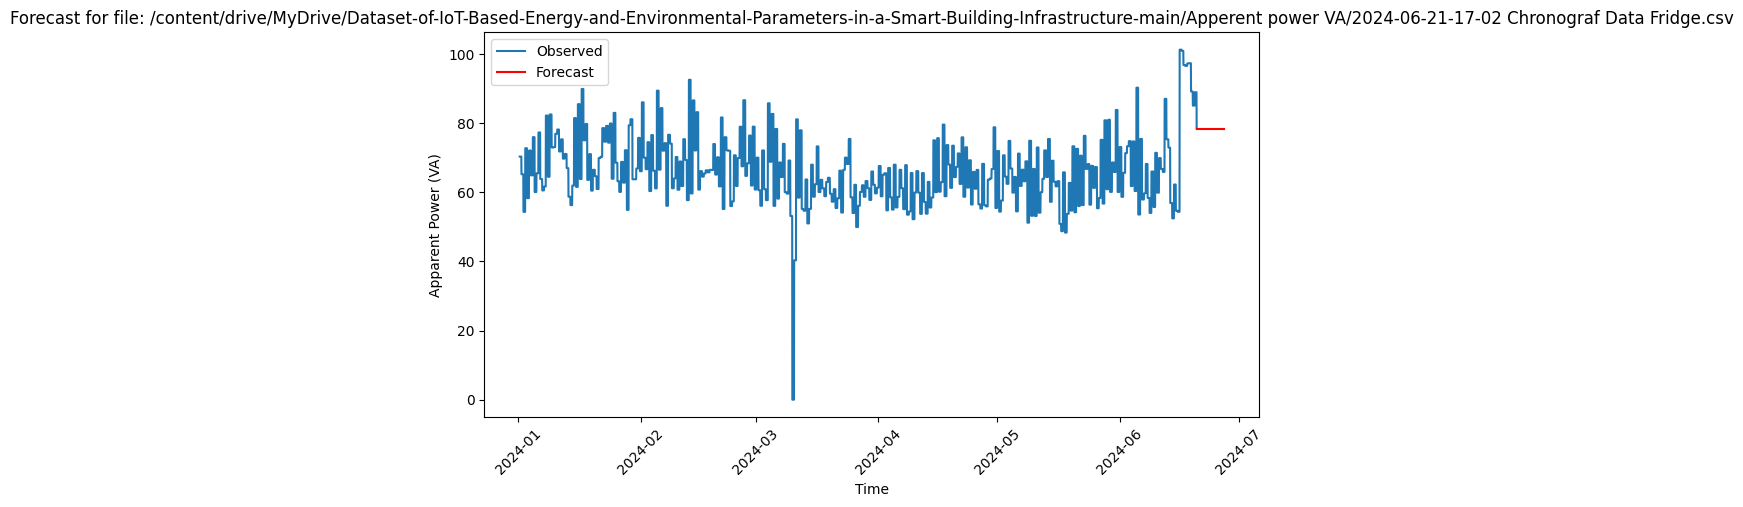

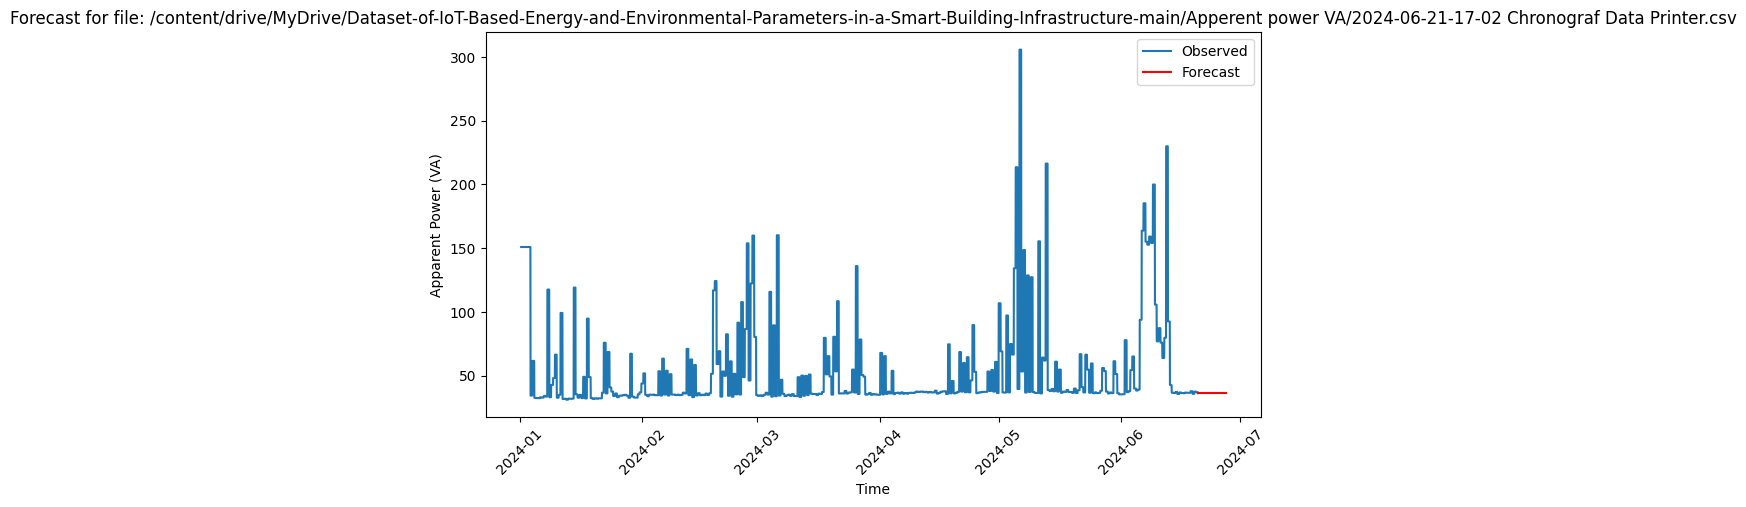

Evaluation metrics for 1_week:
                                                file         MAE        RMSE  \
0  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   51.471171  137.618878   
1  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    0.601834    1.886234   
2  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   33.272300   33.771801   
3  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    2.662278    5.432592   
4  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  459.181137  471.532281   
5  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   17.879938   18.897122   
6  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    0.774056    1.450695   

   MAPE  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  

Forecasting and evaluating for: 1_month


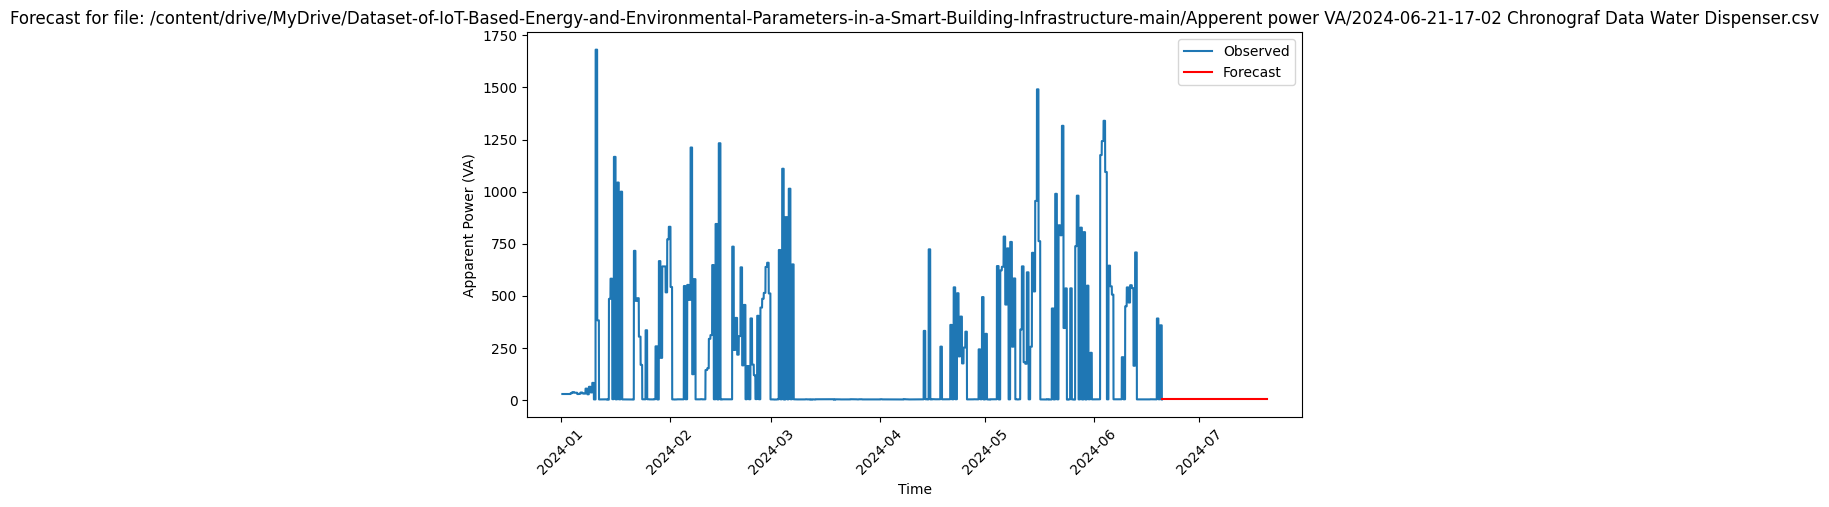

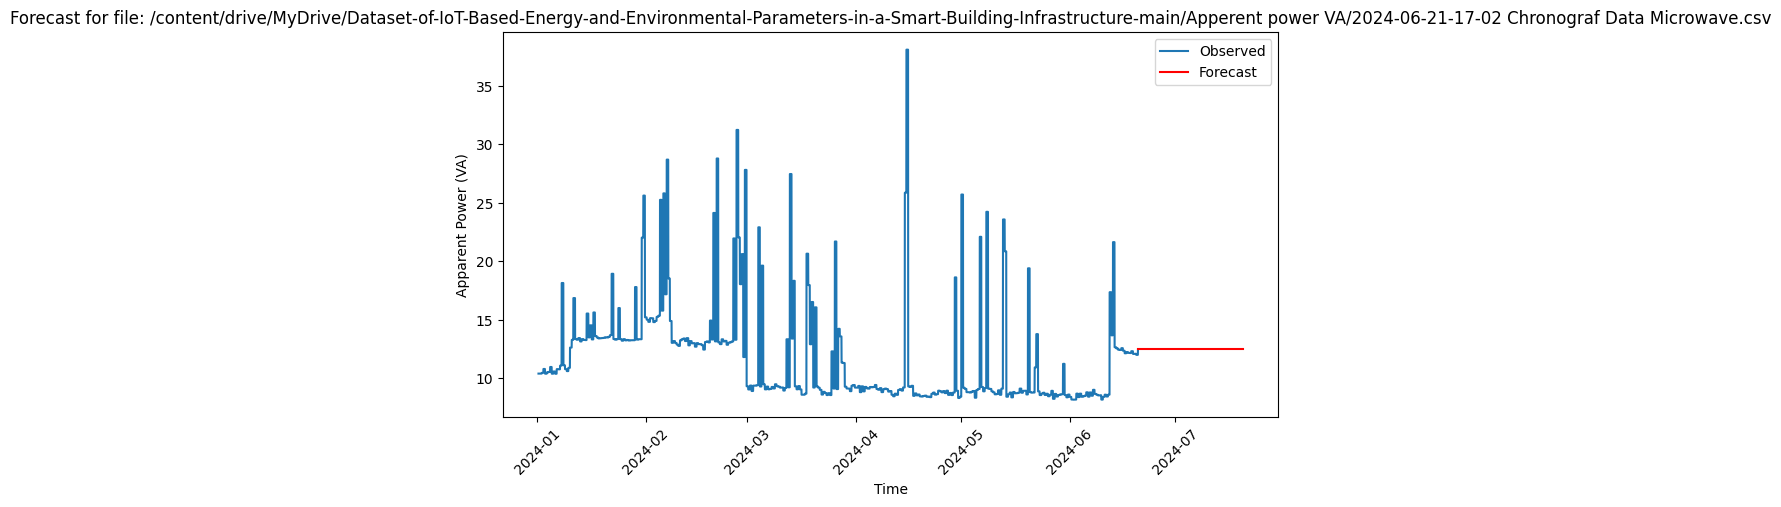

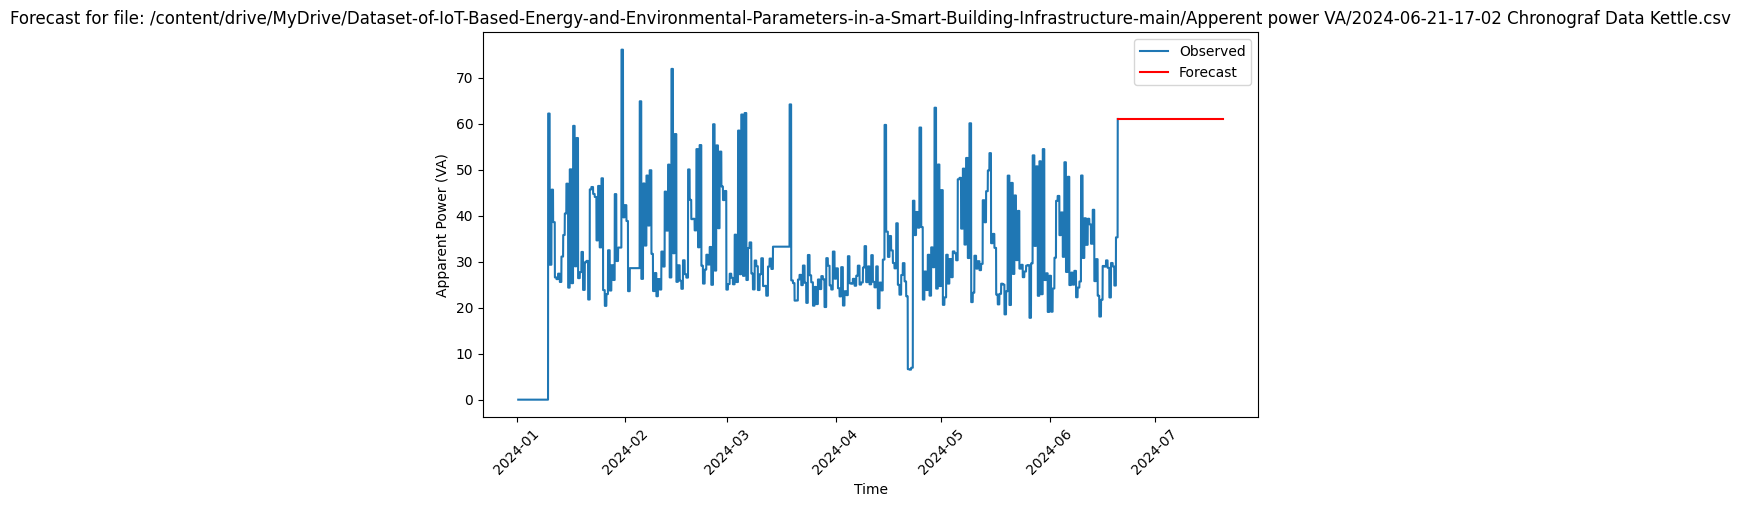

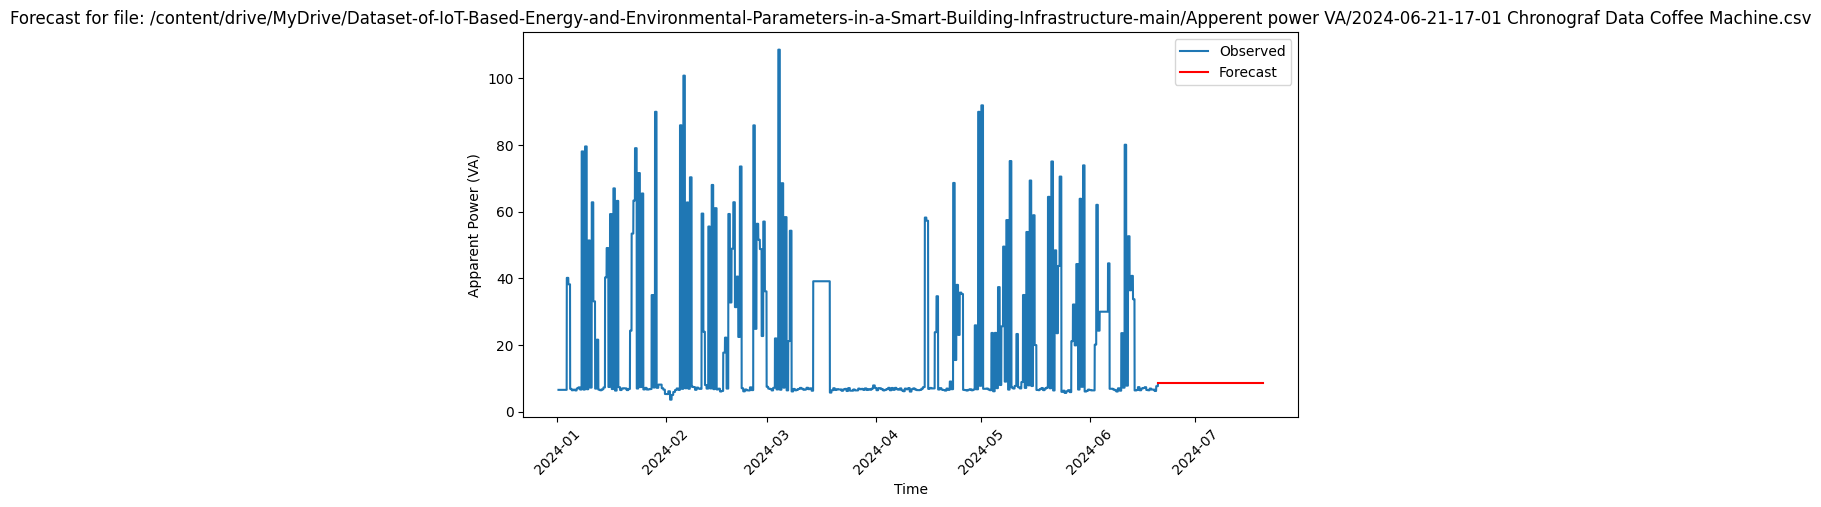

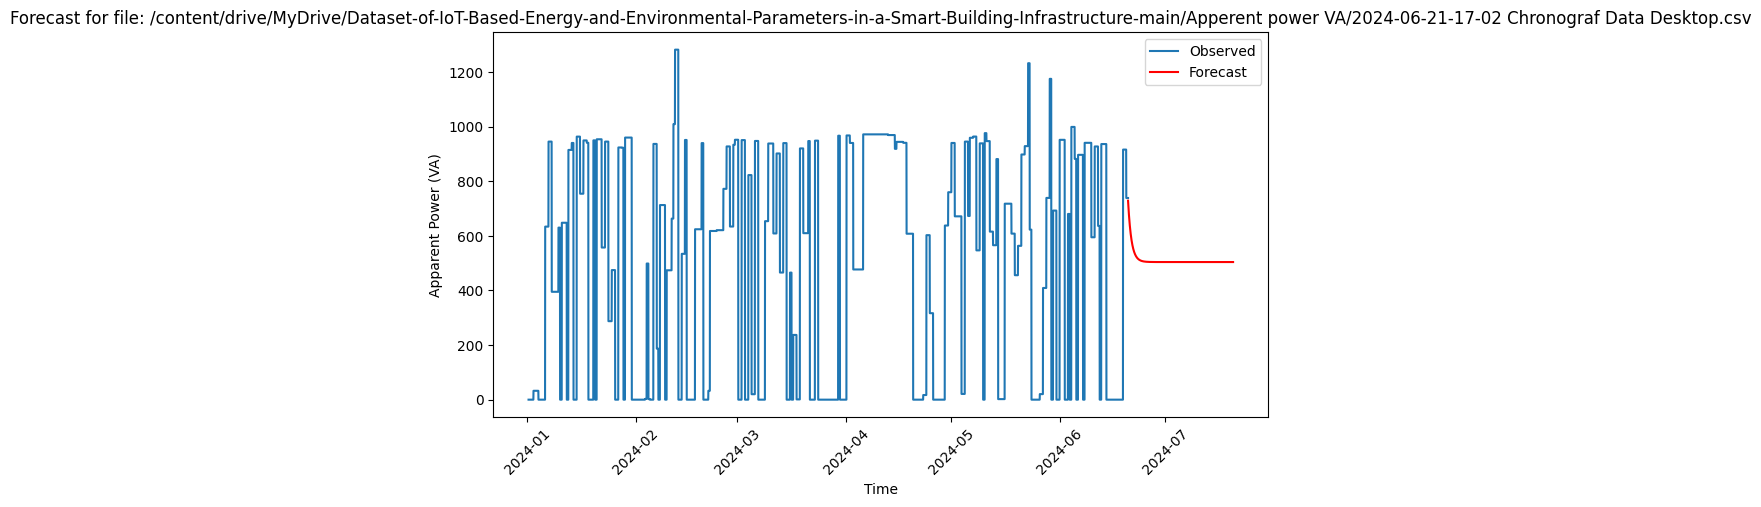

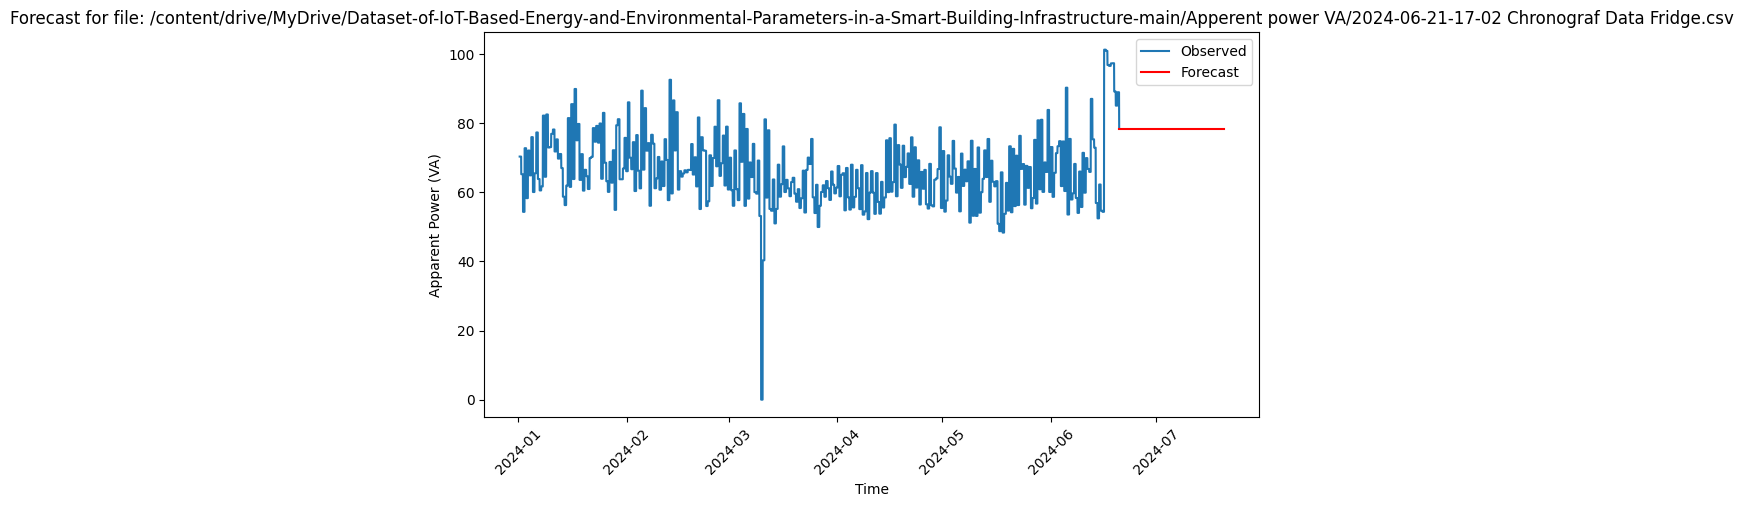

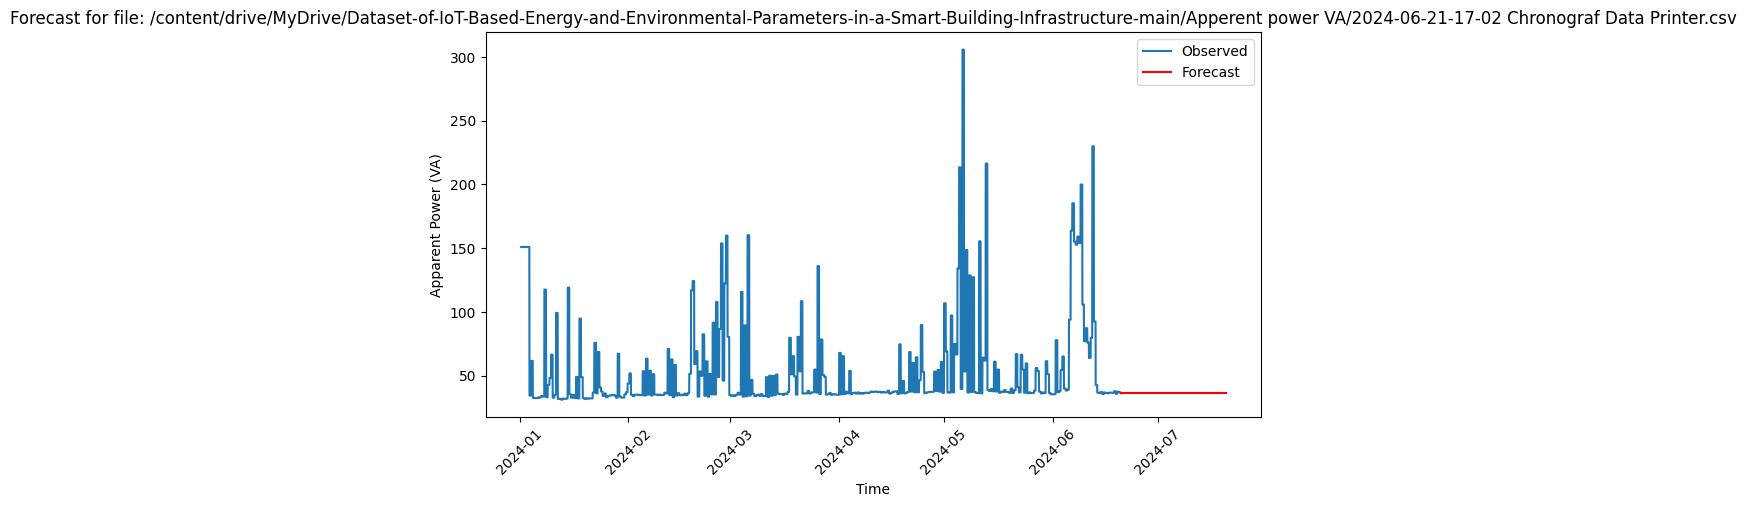

Evaluation metrics for 1_month:
                                                file         MAE        RMSE  \
0  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  308.508142  503.390000   
1  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    3.032990    3.514572   
2  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   29.127557   30.576446   
3  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   13.726584   22.911838   
4  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  408.171917  432.395785   
5  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   14.040570   15.746793   
6  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   28.555154   54.354439   

   MAPE  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  

Forecasting and evaluating for: 2_months


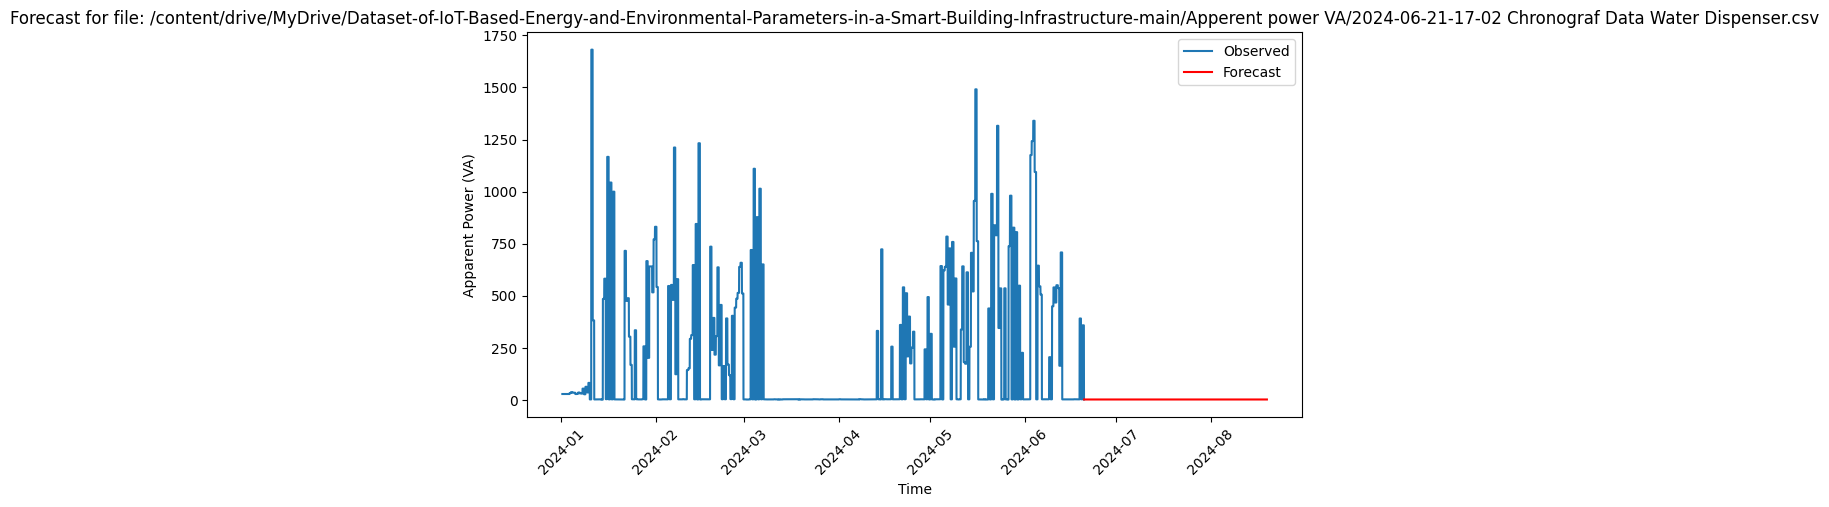

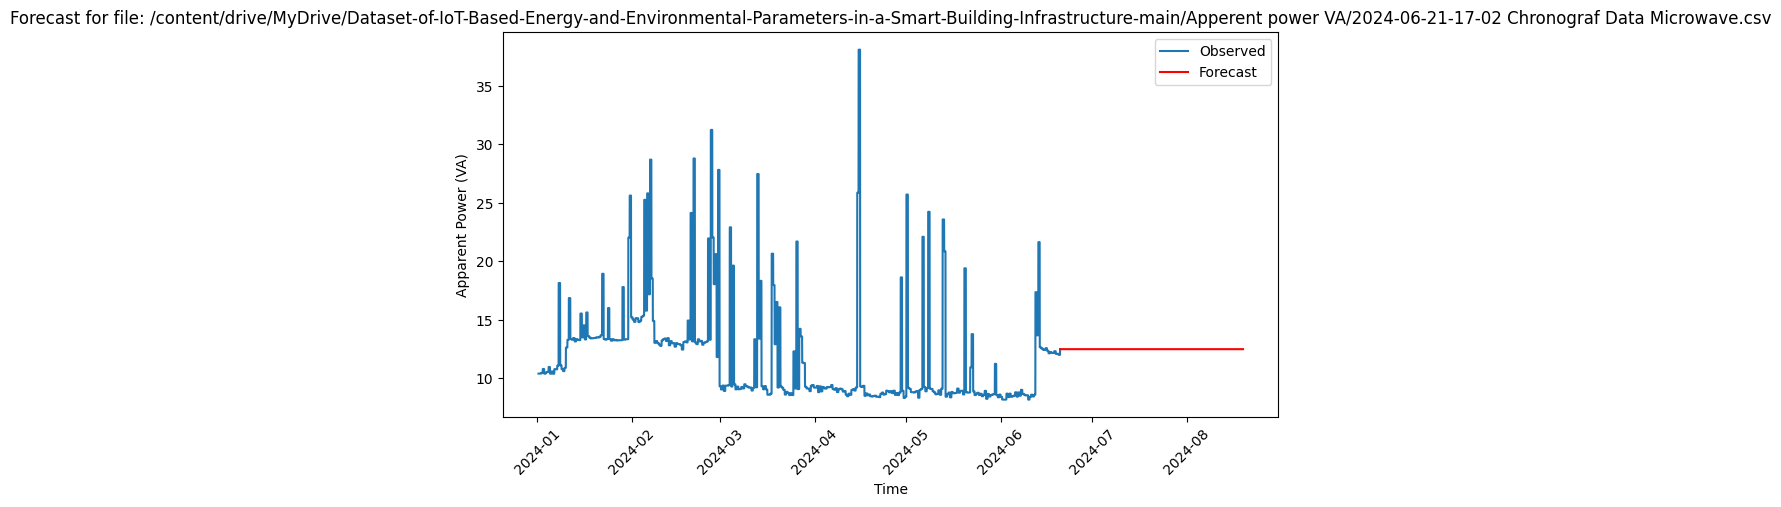

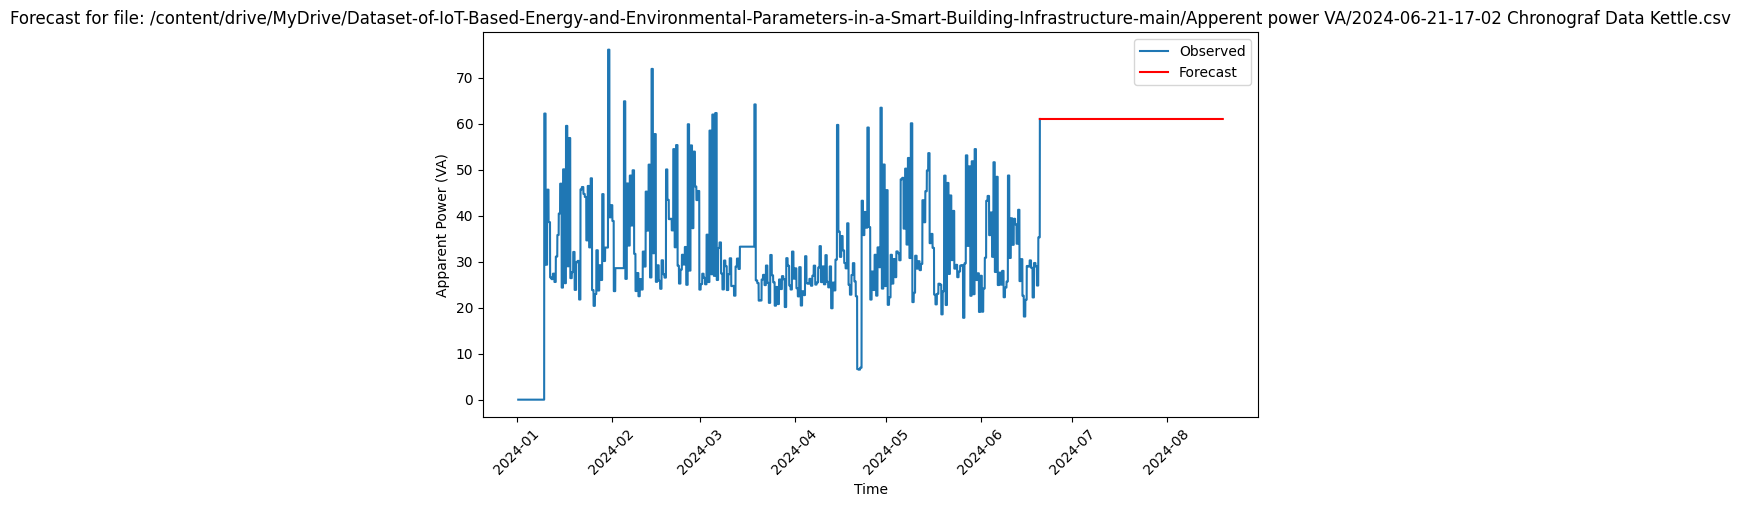

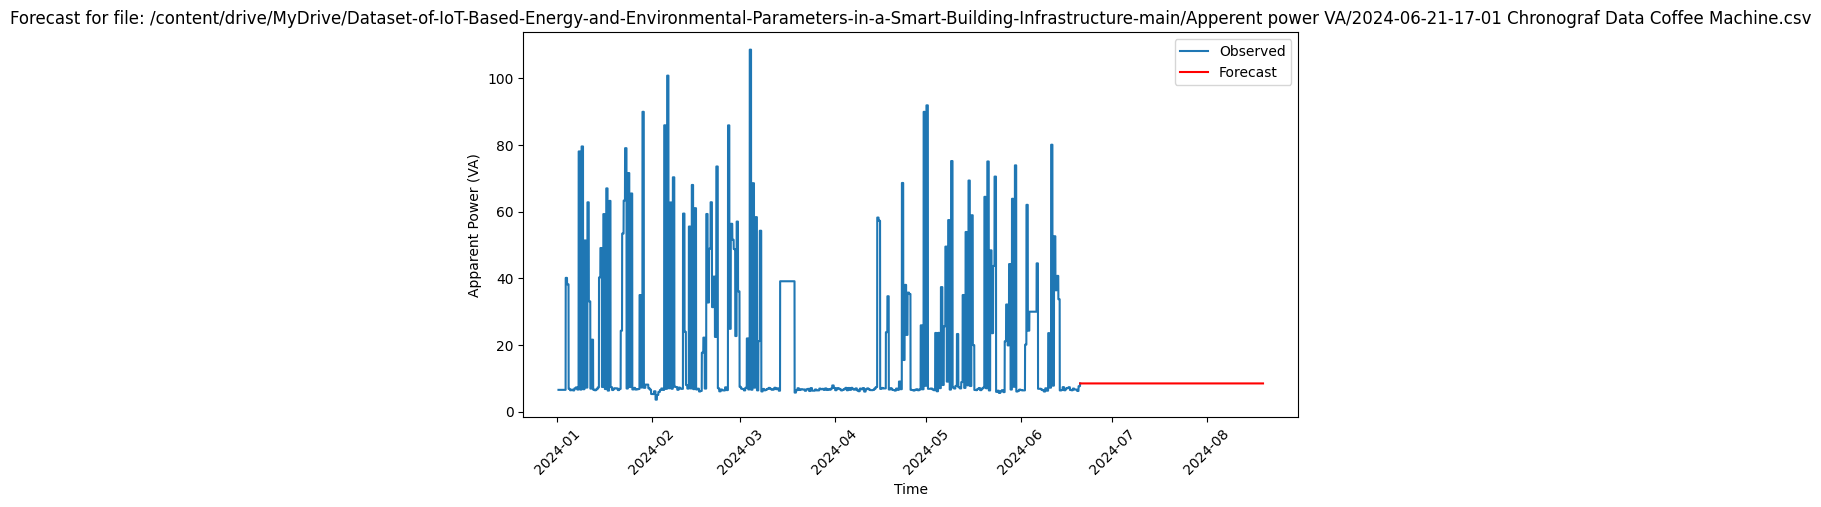

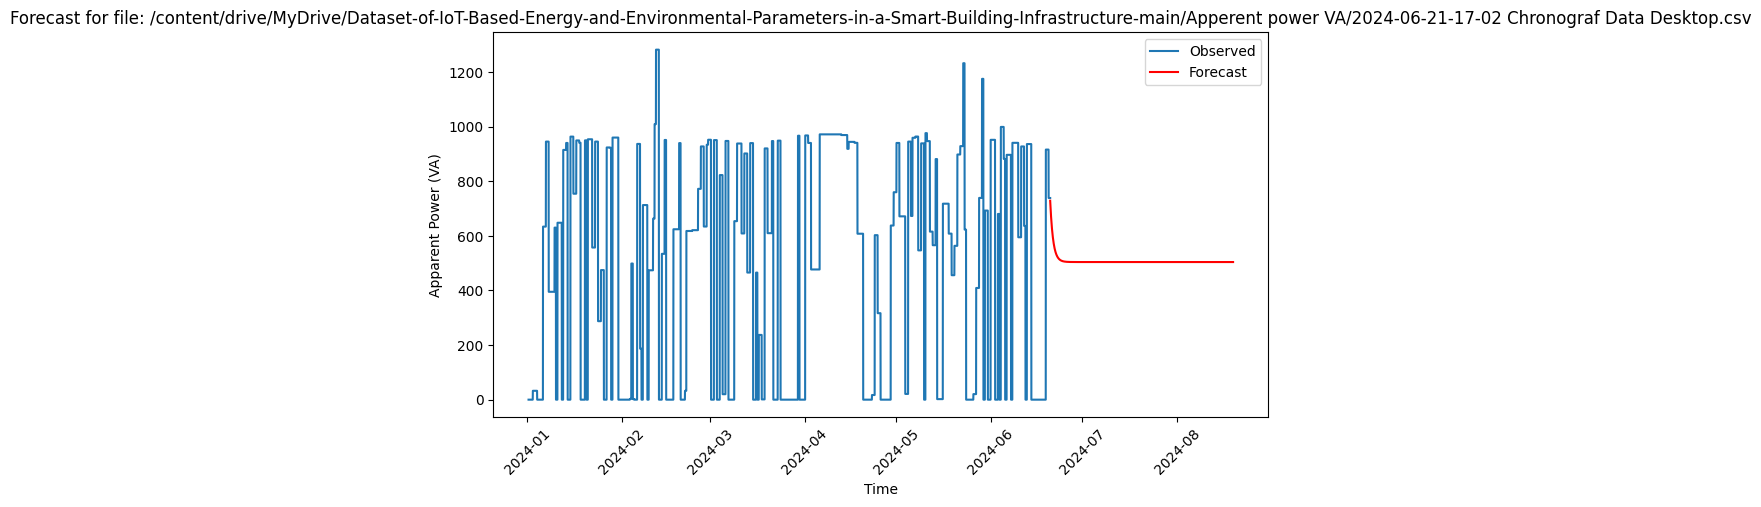

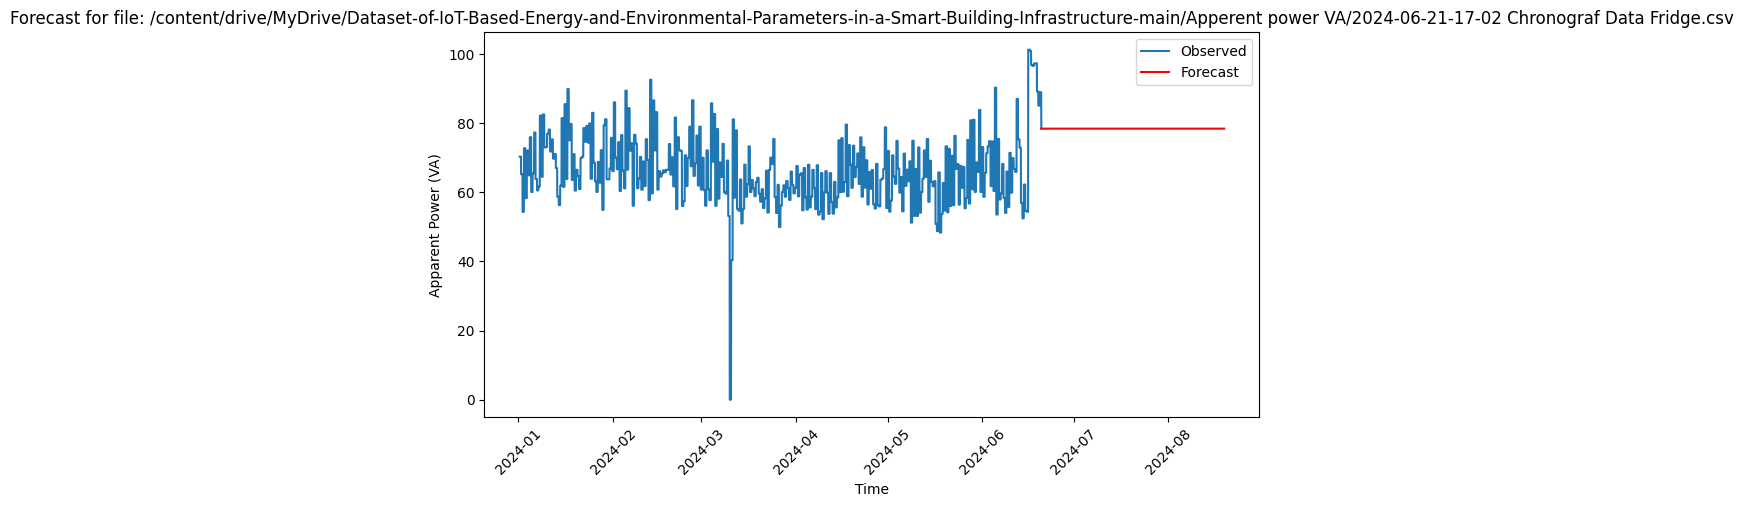

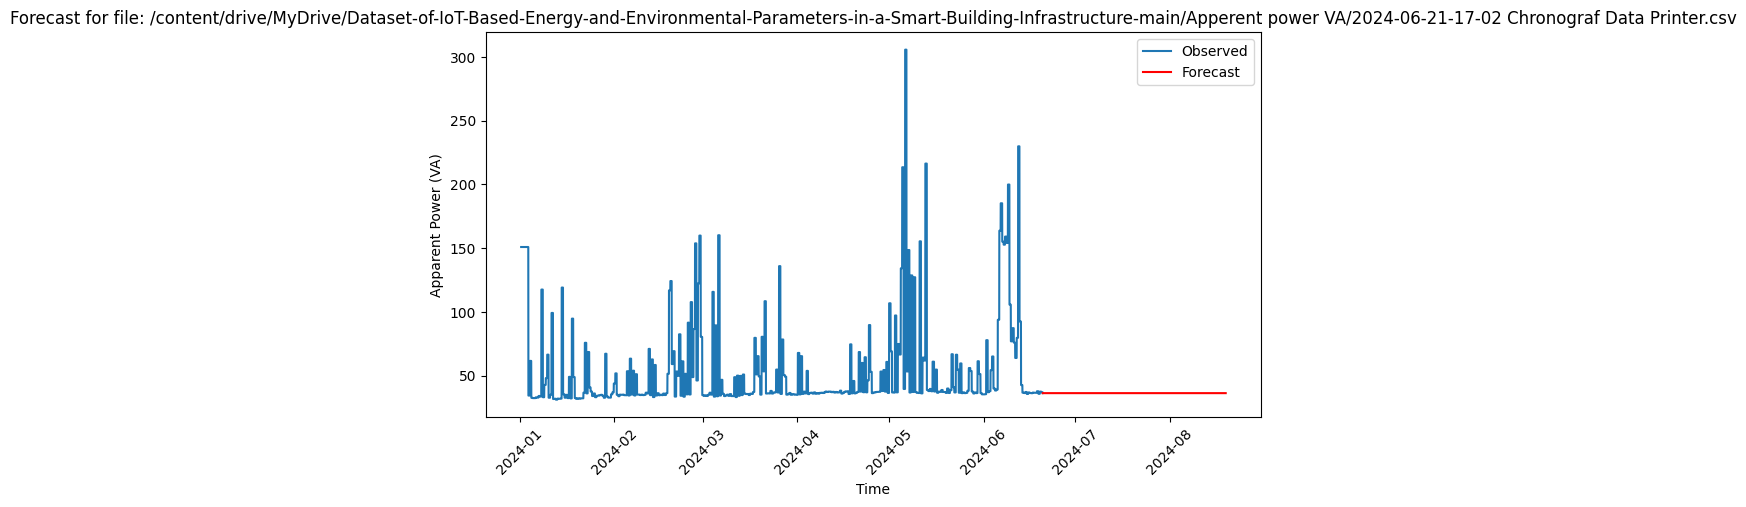

Evaluation metrics for 2_months:
                                                file         MAE        RMSE  \
0  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  289.585653  467.055713   
1  /content/drive/MyDrive/Dataset-of-IoT-Based-En...    3.699228    4.221084   
2  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   28.542757   30.574406   
3  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   14.610486   25.293488   
4  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  369.215305  406.695028   
5  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   14.716422   16.434879   
6  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   27.843326   55.903017   

   MAPE  
0   NaN  
1   NaN  
2   NaN  
3   NaN  
4   NaN  
5   NaN  
6   NaN  

Forecasting and evaluating for: 1_year
Error processing file /content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main/Apperent power VA/2024-06-21-17-02 Chronograf Data Water Dispens

In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'

# Define paths for each subfolder with recursive search pattern
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)

print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")

# Function to preprocess, forecast, and evaluate
def preprocess_and_forecast(file_list, forecast_steps):
    forecasts = []
    true_values = []
    last_timestamp = None
    metrics = []

    for file in file_list:
        df = pd.read_csv(file)

        # Parse timestamp column
        if 'time' in df.columns:
            df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
        else:
            print(f"Timestamp column not found in file: {file}")
            continue

        # Set the timestamp as the index and sort the index
        df.set_index('time', inplace=True)
        df.sort_index(inplace=True)

        # Resample data to hourly frequency using lowercase 'h'
        df = df.resample('h').mean()
        df['VA.mean_value'] = df['VA.mean_value'].ffill().bfill()

        # Check if the series has enough data points
        if len(df.dropna()) < 50:
            print(f"Insufficient data in file: {file}")
            continue

        # Check for stationarity using the ADF test
        adf_result = adfuller(df['VA.mean_value'].dropna())
        if adf_result[1] > 0.05:
            df['VA.mean_value'] = df['VA.mean_value'].diff().dropna()

        # Normalize the data
        data_mean = df['VA.mean_value'].mean()
        data_std = df['VA.mean_value'].std()
        df['VA.mean_value'] = (df['VA.mean_value'] - data_mean) / data_std

        # Update the last timestamp
        last_timestamp = df.index[-1]

        try:
            model = auto_arima(df['VA.mean_value'].dropna(), seasonal=False, trace=False, error_action='ignore', suppress_warnings=True)
            order = model.order

            arima_model = ARIMA(df['VA.mean_value'].dropna(), order=order)
            result = arima_model.fit()

            # Forecast the next steps
            forecast = result.forecast(steps=forecast_steps)

            # Inverse transform the forecast
            forecast = (forecast * data_std) + data_mean
            forecasts.append(forecast)

            # Create a new timestamp index for the forecast
            forecast_index = pd.date_range(start=last_timestamp, periods=forecast_steps, freq='h')

            # Collect true values for evaluation (use the last observed data for comparison)
            true_values.append(df['VA.mean_value'][-forecast_steps:] * data_std + data_mean)

            # Calculate evaluation metrics
            mae = mean_absolute_error(true_values[-1], forecast)
            rmse = np.sqrt(mean_squared_error(true_values[-1], forecast))
            mape = np.mean(np.abs((true_values[-1] - forecast) / true_values[-1])) * 100

            metrics.append({'file': file, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape})

            # Plot the forecast
            plt.figure(figsize=(10, 5))
            plt.plot(df.index, df['VA.mean_value'] * data_std + data_mean, label='Observed')
            plt.plot(forecast_index, forecast, label='Forecast', color='red')
            plt.title(f'Forecast for file: {file}')
            plt.xlabel('Time')
            plt.ylabel('Apparent Power (VA)')
            plt.legend()
            plt.xticks(rotation=45)
            plt.show()

        except Exception as e:
            print(f"Error processing file {file}: {e}")
            continue

    return forecasts, true_values, metrics, last_timestamp

# Specify forecast steps for different periods
forecast_periods = {
    "24_hours": 24,
    "1_week": 24 * 7,
    "1_month": 24 * 30,
    "2_months": 24 * 60,
    "1_year": 24 * 365
}

# Run forecasts for each period and evaluate
for period, steps in forecast_periods.items():
    print(f"\nForecasting and evaluating for: {period}")
    forecasts, true_values, metrics, last_timestamp = preprocess_and_forecast(apparent_power_files, forecast_steps=steps)

    # Display evaluation metrics
    metrics_df = pd.DataFrame(metrics)
    print(f"Evaluation metrics for {period}:")
    print(metrics_df)

    # Save evaluation metrics to CSV
    metrics_df.to_csv(f'evaluation_metrics_{period}.csv', index=False)

print("Forecasting, evaluation, and metric saving complete.")


GRU

Found 7 Apparent Power CSV files.

Running GRU forecasting...


<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 28.79207921]
 [ 28.79207921]
 [ 28.79207921]
 ...
 [358.42857143]
 [358.42857143]
 [  2.5       ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 29s 194ms/step - loss: 22.8653
Epoch 2/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 18.4588
Epoch 3/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - loss: 17.9282
Epoch 4/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - loss: 16.6108
Epoch 5/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 16.0336
Epoch 6/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 17.5867
Epoch 7/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 186ms/step - loss: 17.7550
Epoch 8/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 186ms/step - loss: 14.9476
Epoch 9/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 11.7154
Epoch 10/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - loss: 11.4563
Epoch 11/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 42s 200ms/step - loss: 11.5269
Epoch 12/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 11.0856
Epoch 13/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - loss: 12.3148
Epoch 14/20
120/120 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 8.9594
Ep

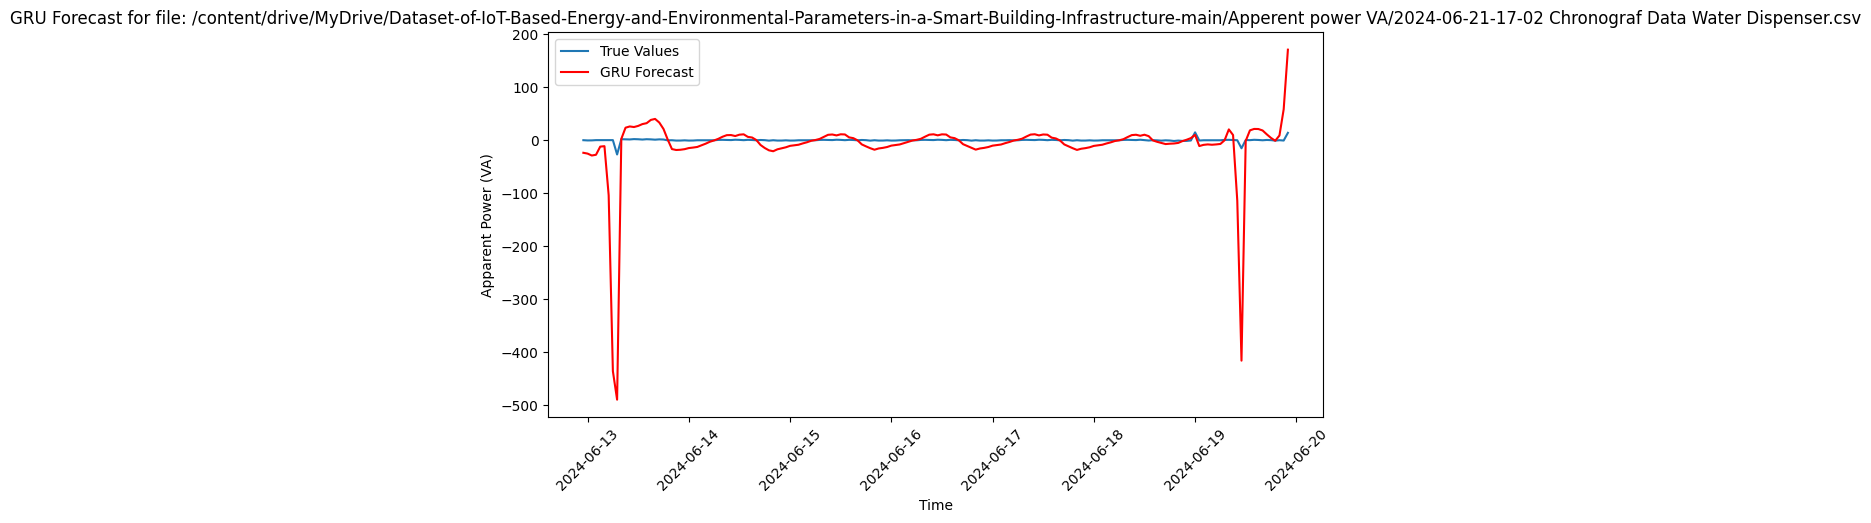

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[10.41176471]
 [10.41176471]
 [10.41176471]
 ...
 [12.01408451]
 [12.01408451]
 [12.5       ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


119/119 ━━━━━━━━━━━━━━━━━━━━ 27s 200ms/step - loss: 52.2083
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 187ms/step - loss: 50.3624
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - loss: 62.5353
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 186ms/step - loss: 48.9106
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 186ms/step - loss: 44.5056
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - loss: 38.1374
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 40s 192ms/step - loss: 50.5262
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - loss: 39.8757
Epoch 9/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 46.0114
Epoch 10/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 190ms/step - loss: 39.4462
Epoch 11/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 36.9063
Epoch 12/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - loss: 33.2188
Epoch 13/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 34.4757
Epoch 14/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 22s 184ms/step - loss: 38.2596
Epoch 15/20


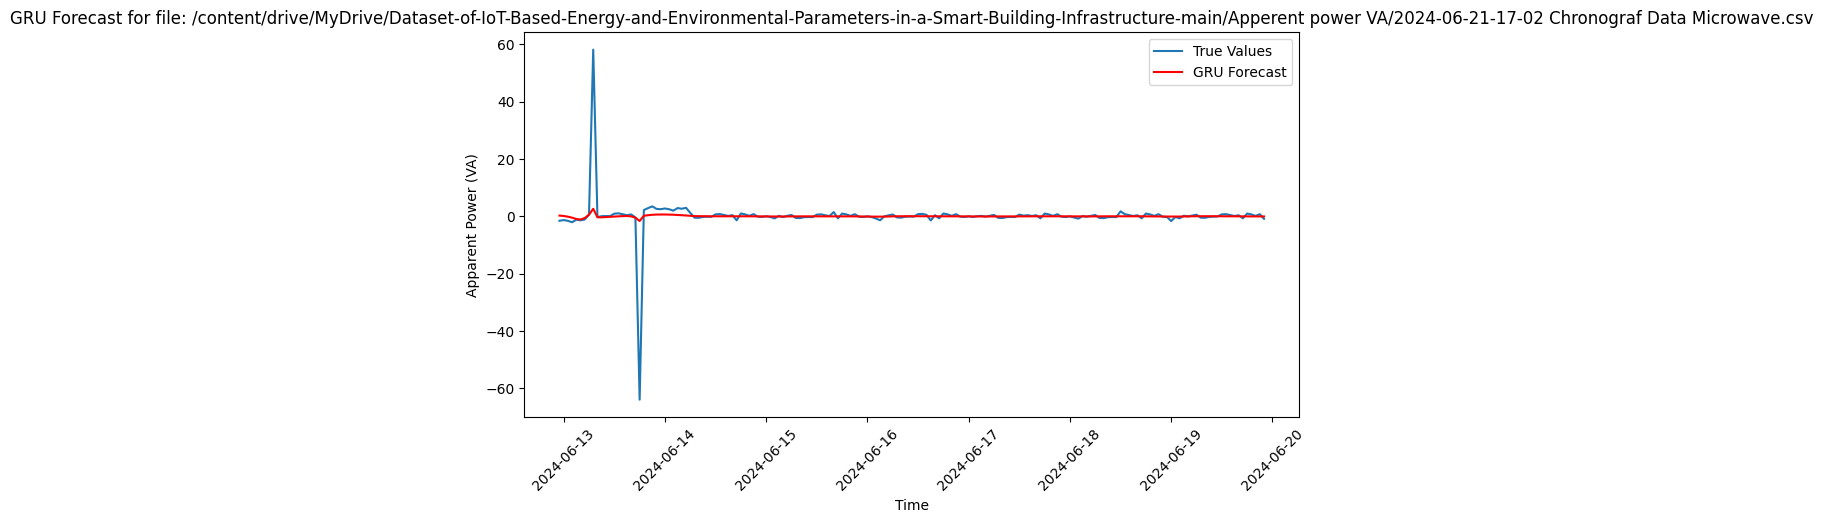

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[ 0.        ]
 [ 0.        ]
 [ 0.        ]
 ...
 [35.27678571]
 [35.27678571]
 [61.        ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


122/122 ━━━━━━━━━━━━━━━━━━━━ 27s 185ms/step - loss: 13.5420
Epoch 2/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 199ms/step - loss: 12.4723
Epoch 3/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 185ms/step - loss: 11.9365
Epoch 4/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - loss: 12.9137
Epoch 5/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - loss: 12.0118
Epoch 6/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 185ms/step - loss: 10.3489
Epoch 7/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - loss: 9.7385
Epoch 8/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 9.4852
Epoch 9/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 9.1696
Epoch 10/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 9.7049
Epoch 11/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 9.5893
Epoch 12/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 9.0897
Epoch 13/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 8.5535
Epoch 14/20
122/122 ━━━━━━━━━━━━━━━━━━━━ 24s 194ms/step - loss: 8.2196
Epoch 15/20
122/122 

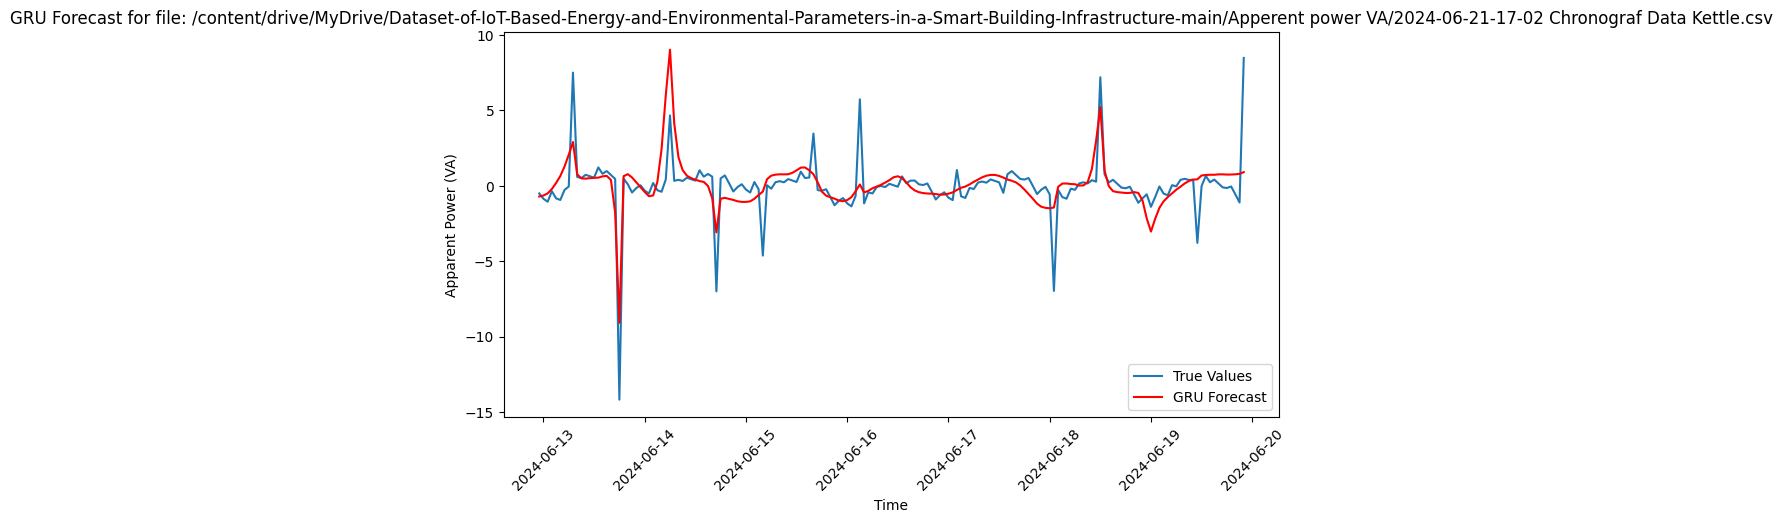

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[6.51851852]
 [6.51851852]
 [6.51851852]
 ...
 [7.61946903]
 [7.61946903]
 [8.44444444]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 27s 197ms/step - loss: 42.1776
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - loss: 31.1791
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 30.0145
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 30.6897
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 196ms/step - loss: 30.4282
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - loss: 25.7238
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 40s 189ms/step - loss: 24.9183
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 26.0728
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 23.1395
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 197ms/step - loss: 24.2850
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 200ms/step - loss: 17.0785
Epoch 12/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 23.8357
Epoch 13/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 20.3578
Epoch 14/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 18.1466
Epoch 15/20


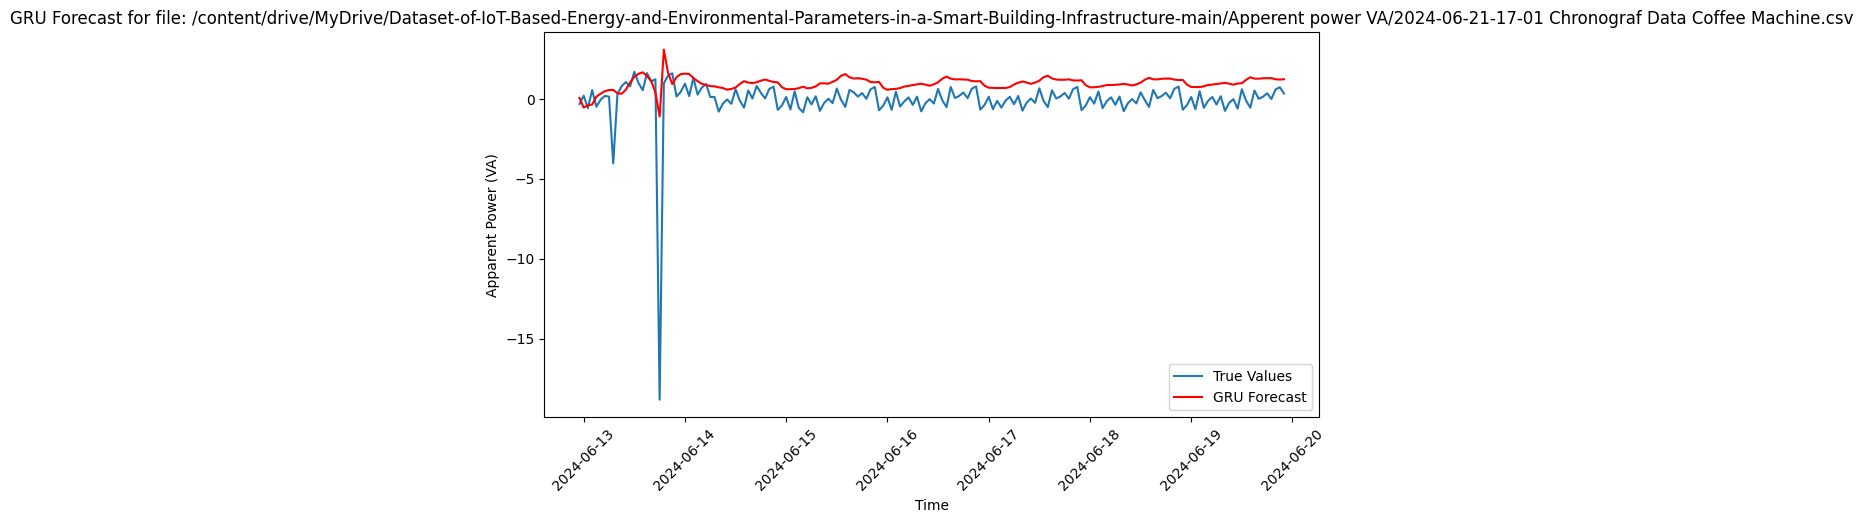

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[  0. ]
 [  0. ]
 [  0. ]
 ...
 [738.8]
 [738.8]
 [738.8]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


123/123 ━━━━━━━━━━━━━━━━━━━━ 30s 211ms/step - loss: 18.6205
Epoch 2/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - loss: 17.4636
Epoch 3/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 40s 198ms/step - loss: 14.5549
Epoch 4/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 17.1035
Epoch 5/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 15.6321
Epoch 6/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 15.0165
Epoch 7/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 198ms/step - loss: 15.5147
Epoch 8/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - loss: 17.3616
Epoch 9/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - loss: 13.1449
Epoch 10/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 209ms/step - loss: 12.4579
Epoch 11/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 41s 210ms/step - loss: 10.9879
Epoch 12/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 203ms/step - loss: 11.7993
Epoch 13/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 40s 199ms/step - loss: 11.4533
Epoch 14/20
123/123 ━━━━━━━━━━━━━━━━━━━━ 25s 206ms/step - loss: 11.8026
Epoch 15/20


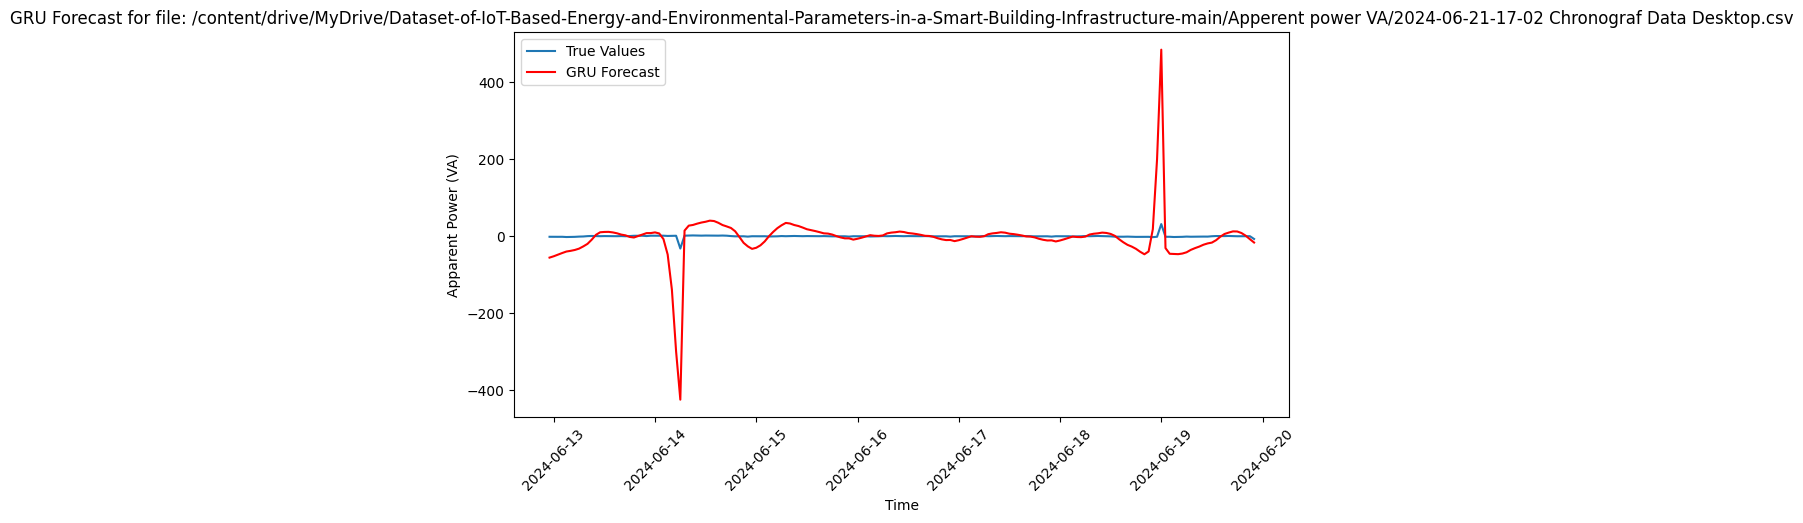

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[70.32098765]
 [70.32098765]
 [70.32098765]
 ...
 [88.93243243]
 [88.93243243]
 [78.4       ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 27s 188ms/step - loss: 31.7289
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 23.7227
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 25.1030
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 19.1435
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 187ms/step - loss: 17.7777
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - loss: 18.7991
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 15.0391
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 201ms/step - loss: 16.1633
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 14.6144
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 40s 190ms/step - loss: 14.7869
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 195ms/step - loss: 12.9991
Epoch 12/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 201ms/step - loss: 13.0444
Epoch 13/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 14.8359
Epoch 14/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 186ms/step - loss: 10.3636
Epoch 15/20


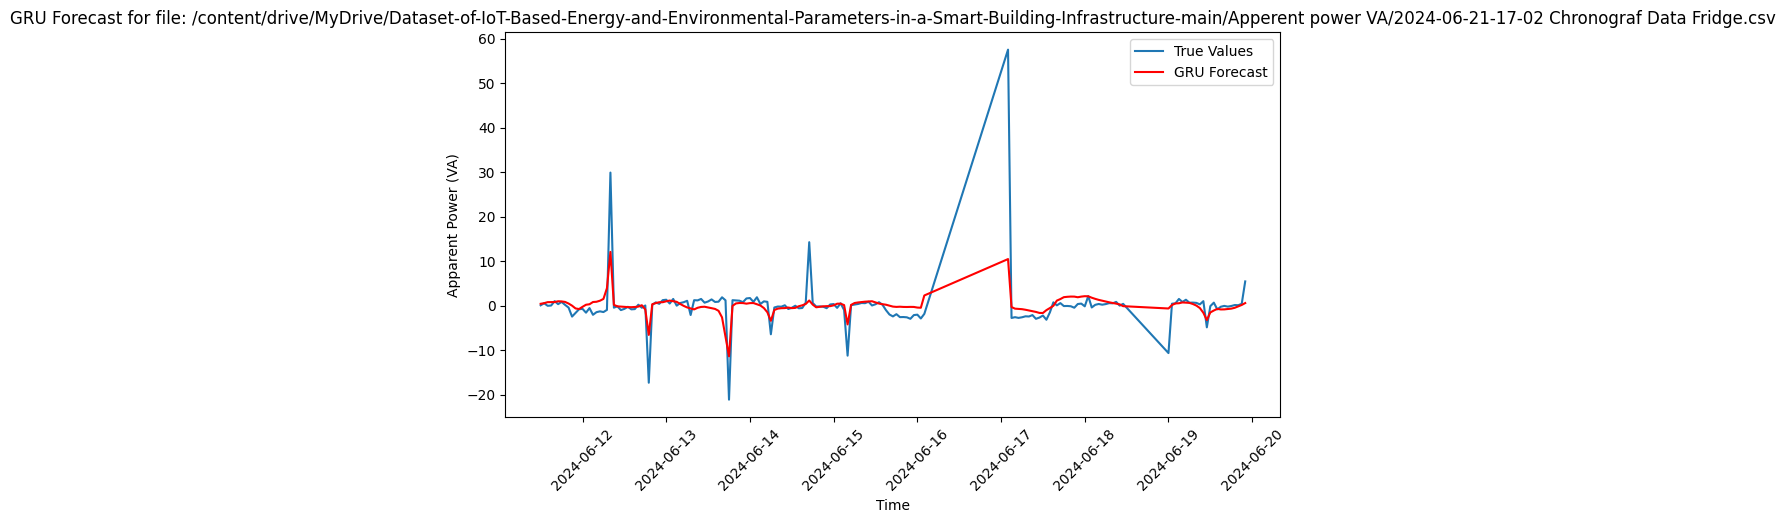

<ipython-input-9-e183acbff37c>:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[[150.9       ]
 [150.9       ]
 [150.9       ]
 ...
 [ 36.88607595]
 [ 36.88607595]
 [ 36.25      ]]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


121/121 ━━━━━━━━━━━━━━━━━━━━ 28s 201ms/step - loss: 14.4299
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 201ms/step - loss: 12.8308
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 40s 194ms/step - loss: 16.1904
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 193ms/step - loss: 11.9567
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 195ms/step - loss: 13.1814
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 42s 201ms/step - loss: 13.1121
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 23s 187ms/step - loss: 11.9469
Epoch 8/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 14.9593
Epoch 9/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 191ms/step - loss: 13.4872
Epoch 10/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 189ms/step - loss: 14.5028
Epoch 11/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 188ms/step - loss: 11.8237
Epoch 12/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 24s 200ms/step - loss: 15.3964
Epoch 13/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 12.0117
Epoch 14/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 41s 199ms/step - loss: 11.0671
Epoch 15/20


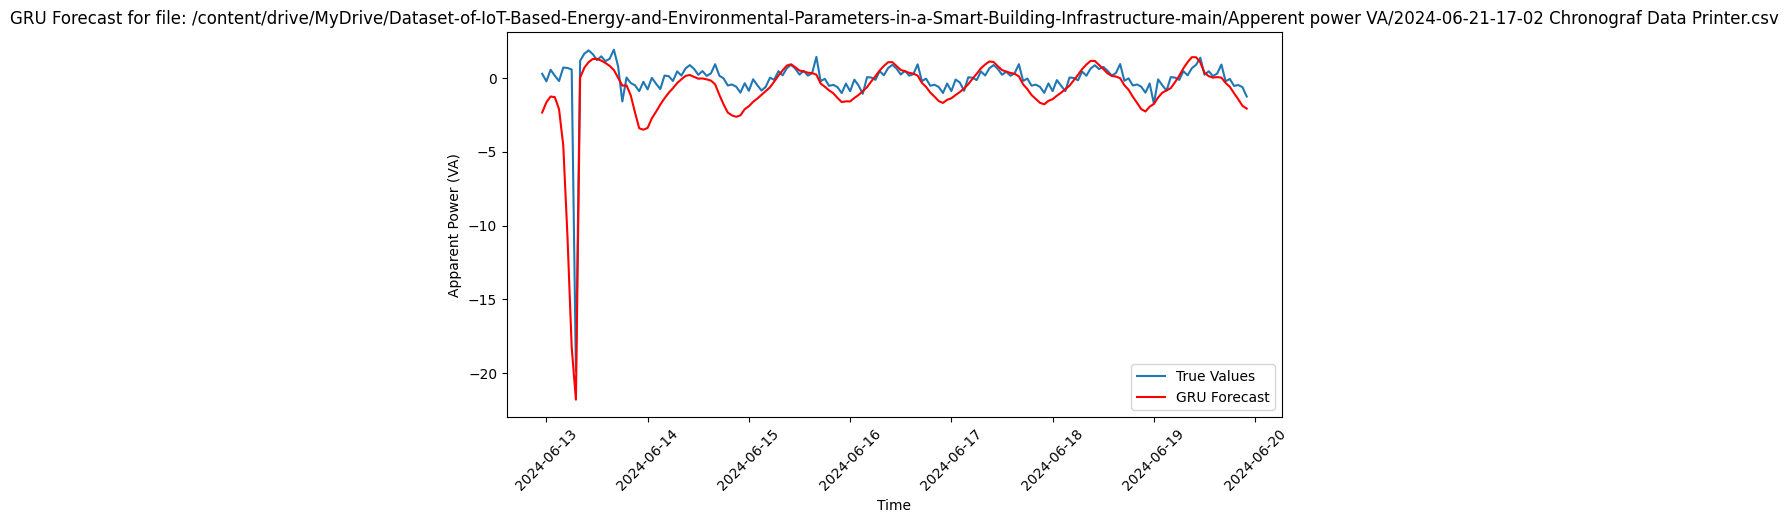

Evaluation metrics for GRU model:
                                                file        MAE       RMSE  \
0  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  19.951688  61.838598   
1  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   1.288693   6.491877   
2  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   0.897606   1.521709   
3  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   1.057246   1.757122   
4  /content/drive/MyDrive/Dataset-of-IoT-Based-En...  23.200950  58.555672   
5  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   1.756076   4.542493   
6  /content/drive/MyDrive/Dataset-of-IoT-Based-En...   0.912984   1.983036   

           MAPE  
0  1.234109e+04  
1  2.138135e+02  
2  6.754774e+02  
3  1.084829e+03  
4  6.418482e+10  
5  4.829487e+02  
6  1.974398e+03  
GRU forecasting, evaluation, and carbon footprint estimation complete.


In [ ]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.impute import KNNImputer
from statsmodels.tsa.seasonal import seasonal_decompose
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define the directory path
dataset_path = '/content/drive/MyDrive/Dataset-of-IoT-Based-Energy-and-Environmental-Parameters-in-a-Smart-Building-Infrastructure-main'
apparent_power_files = glob.glob(dataset_path + '/Apperent power VA/**/*.csv', recursive=True)

print(f"Found {len(apparent_power_files)} Apparent Power CSV files.")

# Enhanced data preprocessing function
def enhanced_preprocessing(df):
    # Step 1: Outlier Detection and Removal
    df['z_score'] = zscore(df['VA.mean_value'].fillna(0))
    df = df[(df['z_score'] > -3) & (df['z_score'] < 3)]
    df = df.loc[:, df.columns != 'z_score']

    # Step 2: Advanced Missing Value Imputation (KNN Imputer)
    imputer = KNNImputer(n_neighbors=5)
    df.loc[:, 'VA.mean_value'] = imputer.fit_transform(df[['VA.mean_value']])

    # Step 3: Seasonal Decomposition
    decomposition = seasonal_decompose(df['VA.mean_value'], model='additive', period=24)
    df.loc[:, 'trend'] = decomposition.trend
    df.loc[:, 'seasonal'] = decomposition.seasonal
    df.loc[:, 'residual'] = decomposition.resid
    df.loc[:, 'VA.mean_value'] = df['residual'].fillna(df['trend'])

    # Step 4: Differencing for Stationarity
    df.loc[:, 'VA.mean_value'] = df['VA.mean_value'].diff().dropna()

    # Step 5: Robust Normalization
    scaler = RobustScaler()
    df.loc[:, 'VA.mean_value'] = scaler.fit_transform(df[['VA.mean_value']])

    # Step 6: Data Augmentation
    noise = np.random.normal(0, 0.01, df['VA.mean_value'].shape)
    df.loc[:, 'VA.mean_value_augmented'] = df['VA.mean_value'] + noise

    # Drop any remaining NaN values
    df.dropna(subset=['VA.mean_value_augmented'], inplace=True)

    return df, scaler

# Function to prepare data for GRU model
def prepare_data_for_gru(df, window_size):
    X, y = [], []
    for i in range(window_size, len(df)):
        X.append(df['VA.mean_value_augmented'].iloc[i-window_size:i].values)
        y.append(df['VA.mean_value_augmented'].iloc[i])
    X = np.array(X)
    y = np.array(y)
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Reshape for GRU input
    return X, y

# GRU model definition
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(units=50, return_sequences=True, input_shape=input_shape))
    model.add(GRU(units=50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function for GRU forecasting
def gru_forecasting(file_list, window_size, forecast_steps):
    forecasts = []
    true_values = []
    metrics = []

    for file in file_list:
        df = pd.read_csv(file)

        if 'time' in df.columns:
            df['time'] = pd.to_datetime(df['time'], errors='coerce', utc=True)
        else:
            print(f"Timestamp column not found in file: {file}")
            continue

        df.set_index('time', inplace=True)
        df.sort_index(inplace=True)
        df = df.resample('h').mean()
        df.loc[:, 'VA.mean_value'] = df['VA.mean_value'].ffill().bfill()

        if len(df.dropna()) < 50:
            print(f"Insufficient data in file: {file}")
            continue

        # Enhanced preprocessing
        df, scaler = enhanced_preprocessing(df)
        X, y = prepare_data_for_gru(df, window_size)

        # Build and train GRU model
        model = build_gru_model(input_shape=(X.shape[1], 1))
        model.fit(X, y, epochs=20, batch_size=32)

        # Make predictions
        predictions = model.predict(X)
        predictions = scaler.inverse_transform(predictions)

        # Forecasting
        forecast = predictions[-forecast_steps:].flatten()
        true_values.append(df['VA.mean_value'][-forecast_steps:].values)

        # Evaluation metrics
        mae = mean_absolute_error(true_values[-1], forecast)
        rmse = np.sqrt(mean_squared_error(true_values[-1], forecast))
        mape = np.mean(np.abs((true_values[-1] - forecast) / (true_values[-1] + 1e-10))) * 100
        metrics.append({'file': file, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape})

        # Plot the results
        plt.figure(figsize=(10, 5))
        plt.plot(df.index[-forecast_steps:], true_values[-1], label='True Values')
        plt.plot(df.index[-forecast_steps:], forecast, label='GRU Forecast', color='red')
        plt.title(f'GRU Forecast for file: {file}')
        plt.xlabel('Time')
        plt.ylabel('Apparent Power (VA)')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

    return forecasts, metrics

# Carbon Footprint Estimation
def estimate_carbon_footprint(forecast, emission_factor, revenue_per_kwh):
    energy_usage = np.sum(forecast) / 1000  # Convert VA to kWh
    carbon_footprint = energy_usage * emission_factor
    pollution_per_dollar = carbon_footprint / (energy_usage * revenue_per_kwh)
    return carbon_footprint, pollution_per_dollar

# Run GRU forecasting for a 1-week period
window_size = 24 * 7  # One week of data as input
forecast_steps = 24 * 7  # One week forecast
emission_factor = 0.5  # kg CO₂ per kWh
revenue_per_kwh = 10  # Revenue in dollars per kWh

print("\nRunning GRU forecasting...")
forecasts, metrics = gru_forecasting(apparent_power_files, window_size, forecast_steps)

# Display evaluation metrics
metrics_df = pd.DataFrame(metrics)
print("Evaluation metrics for GRU model:")
print(metrics_df)

# Save metrics to CSV
metrics_df.to_csv('gru_evaluation_metrics.csv', index=False)

# Carbon Footprint Estimation
for forecast in forecasts:
    carbon_footprint, pollution_per_dollar = estimate_carbon_footprint(forecast, emission_factor, revenue_per_kwh)
    print(f"Estimated Carbon Footprint: {carbon_footprint:.2f} kg CO₂")
    print(f"Pollution per Dollar: {pollution_per_dollar:.4f} kg CO₂ per $1")

print("GRU forecasting, evaluation, and carbon footprint estimation complete.")